In [1]:
interface_training = []
solution_training = []
target_training = []

In [2]:
import torch
import csv

def csv_to_list(csv_reader_object, list_object):
    for row in csv_reader_object:
        full_row = []
        for i in range(4):
            col = row[i].replace('(', '')
            col = col.replace(')', '')
            col = col.replace(',', ' ')
            col = col.split()
            full_row += [float(col[j]) for j in range(2)]
        list_object += [full_row]
        
if torch.is_tensor(interface_training):
    interface_training = interface_training.tolist()
    
if torch.is_tensor(solution_training):
    solution_training = solution_training.tolist()
    
if torch.is_tensor(target_training):
    target_training = target_training.tolist()

        
with open('training_data/interface_1_0_1_training.csv') as csvdatei4:
    csv_reader_object4 = csv.reader(csvdatei4, delimiter=';')
    csv_to_list(csv_reader_object4, interface_training)
        
        
with open('training_data/solution_1_1_training.csv') as csvdatei5:
    csv_reader_object5 = csv.reader(csvdatei5, delimiter=';')
    csv_to_list(csv_reader_object5, solution_training)
        
        
with open('training_data/interface_0_1_3_training.csv') as csvdatei6:
    csv_reader_object6 = csv.reader(csvdatei6, delimiter=';')
    csv_to_list(csv_reader_object6, target_training)
        
interface_training = torch.Tensor(interface_training)
#print(interface)

solution_training = torch.Tensor(solution_training)
#print(solution)

inp_training = torch.cat((interface_training, solution_training), 1)
#inp = solution
print(inp_training.size())

target_training = torch.Tensor(target_training)
#target += interface
print(target_training.size())
#print(inp)

torch.Size([320, 16])
torch.Size([320, 8])


In [3]:
interface_test = []
solution_test = []
target_test = []

with open('training_data/interface_1_0_1_test.csv') as csvdatei4:
    csv_reader_object4 = csv.reader(csvdatei4, delimiter=';')
    csv_to_list(csv_reader_object4, interface_test)
        
        
with open('training_data/solution_1_1_test.csv') as csvdatei5:
    csv_reader_object5 = csv.reader(csvdatei5, delimiter=';')
    csv_to_list(csv_reader_object5, solution_test)
        
        
with open('training_data/interface_0_1_3_test.csv') as csvdatei6:
    csv_reader_object6 = csv.reader(csvdatei6, delimiter=';')
    csv_to_list(csv_reader_object6, target_test)
        
interface_test = torch.Tensor(interface_test)
#print(interface_test)

solution_test = torch.Tensor(solution_test)
#print(solution_test)

inp_test = torch.cat((interface_test, solution_test), 1)
#inp_test = solution_test
print(inp_test.size())

target_test = torch.Tensor(target_test)
#target_test += interface_test
print(target_test.size())
#print(inp_test)

torch.Size([64, 16])
torch.Size([64, 8])


In [4]:
import torch.nn as nn
import torch.nn.functional as F

class Maxwell(nn.Module): 
    def __init__(self): 
        super(Maxwell, self).__init__()
        self.lin1 = nn.Linear(16, 500) 
        self.lin2 = nn.Linear(500, 8) 
        
    def forward(self, x): 
        x = torch.sigmoid(self.lin1(x)) 
        #x = F.relu(self.lin1(x))
        x = self.lin2(x) 
        return x
            
net = Maxwell() 
print(net)

Maxwell(
  (lin1): Linear(in_features=16, out_features=500, bias=True)
  (lin2): Linear(in_features=500, out_features=8, bias=True)
)


In [5]:
import torch.optim as optim
import time

start_time = time.time()

tol = 3e-3
max_iter = 50000
iterations = 0 
loss_test = tol + 1

optimizer = optim.Adam(net.parameters(), lr=1e-5) 
criterion = nn.MSELoss()

while(iterations < max_iter and loss_test > tol):
    
    out = net(inp_training)

    optimizer.zero_grad()
    loss = criterion(out, target_training) 
    loss_test = criterion(net(inp_test), target_test)
    print("Loss: %.5f" % loss, "Test-Loss: %.5f" % loss_test, "Iterations: %.0f" % (iterations+1))

    loss.backward() 
    optimizer.step() 
    iterations += 1

print("Final Loss: %.5f" % loss_test) 

print("Number of iterations: %.0f" % iterations)

time_taken = time.time() - start_time
print("Run-Time: %.4f s" % time_taken)

Loss: 3.19953 Test-Loss: 6.14365 Iterations: 1
Loss: 3.19457 Test-Loss: 6.13503 Iterations: 2
Loss: 3.18962 Test-Loss: 6.12641 Iterations: 3
Loss: 3.18468 Test-Loss: 6.11781 Iterations: 4
Loss: 3.17976 Test-Loss: 6.10922 Iterations: 5
Loss: 3.17486 Test-Loss: 6.10065 Iterations: 6
Loss: 3.16997 Test-Loss: 6.09209 Iterations: 7
Loss: 3.16509 Test-Loss: 6.08355 Iterations: 8
Loss: 3.16022 Test-Loss: 6.07503 Iterations: 9
Loss: 3.15537 Test-Loss: 6.06652 Iterations: 10
Loss: 3.15054 Test-Loss: 6.05803 Iterations: 11
Loss: 3.14572 Test-Loss: 6.04956 Iterations: 12
Loss: 3.14091 Test-Loss: 6.04111 Iterations: 13
Loss: 3.13612 Test-Loss: 6.03267 Iterations: 14
Loss: 3.13135 Test-Loss: 6.02426 Iterations: 15
Loss: 3.12659 Test-Loss: 6.01586 Iterations: 16
Loss: 3.12185 Test-Loss: 6.00748 Iterations: 17
Loss: 3.11712 Test-Loss: 5.99913 Iterations: 18
Loss: 3.11241 Test-Loss: 5.99079 Iterations: 19
Loss: 3.10771 Test-Loss: 5.98247 Iterations: 20
Loss: 3.10304 Test-Loss: 5.97417 Iterations: 21
L

Loss: 1.35701 Test-Loss: 2.95285 Iterations: 1485
Loss: 1.35652 Test-Loss: 2.95246 Iterations: 1486
Loss: 1.35602 Test-Loss: 2.95206 Iterations: 1487
Loss: 1.35552 Test-Loss: 2.95167 Iterations: 1488
Loss: 1.35502 Test-Loss: 2.95127 Iterations: 1489
Loss: 1.35452 Test-Loss: 2.95088 Iterations: 1490
Loss: 1.35403 Test-Loss: 2.95048 Iterations: 1491
Loss: 1.35353 Test-Loss: 2.95009 Iterations: 1492
Loss: 1.35303 Test-Loss: 2.94970 Iterations: 1493
Loss: 1.35253 Test-Loss: 2.94930 Iterations: 1494
Loss: 1.35204 Test-Loss: 2.94891 Iterations: 1495
Loss: 1.35154 Test-Loss: 2.94851 Iterations: 1496
Loss: 1.35104 Test-Loss: 2.94812 Iterations: 1497
Loss: 1.35054 Test-Loss: 2.94773 Iterations: 1498
Loss: 1.35005 Test-Loss: 2.94734 Iterations: 1499
Loss: 1.34955 Test-Loss: 2.94694 Iterations: 1500
Loss: 1.34905 Test-Loss: 2.94655 Iterations: 1501
Loss: 1.34855 Test-Loss: 2.94616 Iterations: 1502
Loss: 1.34806 Test-Loss: 2.94576 Iterations: 1503
Loss: 1.34756 Test-Loss: 2.94537 Iterations: 1504


Loss: 1.22526 Test-Loss: 2.85177 Iterations: 1750
Loss: 1.22476 Test-Loss: 2.85139 Iterations: 1751
Loss: 1.22427 Test-Loss: 2.85102 Iterations: 1752
Loss: 1.22377 Test-Loss: 2.85064 Iterations: 1753
Loss: 1.22327 Test-Loss: 2.85027 Iterations: 1754
Loss: 1.22278 Test-Loss: 2.84989 Iterations: 1755
Loss: 1.22228 Test-Loss: 2.84952 Iterations: 1756
Loss: 1.22179 Test-Loss: 2.84914 Iterations: 1757
Loss: 1.22129 Test-Loss: 2.84877 Iterations: 1758
Loss: 1.22080 Test-Loss: 2.84839 Iterations: 1759
Loss: 1.22030 Test-Loss: 2.84802 Iterations: 1760
Loss: 1.21981 Test-Loss: 2.84764 Iterations: 1761
Loss: 1.21931 Test-Loss: 2.84727 Iterations: 1762
Loss: 1.21882 Test-Loss: 2.84689 Iterations: 1763
Loss: 1.21832 Test-Loss: 2.84652 Iterations: 1764
Loss: 1.21783 Test-Loss: 2.84614 Iterations: 1765
Loss: 1.21733 Test-Loss: 2.84577 Iterations: 1766
Loss: 1.21684 Test-Loss: 2.84539 Iterations: 1767
Loss: 1.21634 Test-Loss: 2.84502 Iterations: 1768
Loss: 1.21585 Test-Loss: 2.84465 Iterations: 1769


Loss: 1.09617 Test-Loss: 2.75266 Iterations: 2013
Loss: 1.09569 Test-Loss: 2.75228 Iterations: 2014
Loss: 1.09521 Test-Loss: 2.75190 Iterations: 2015
Loss: 1.09472 Test-Loss: 2.75152 Iterations: 2016
Loss: 1.09424 Test-Loss: 2.75114 Iterations: 2017
Loss: 1.09375 Test-Loss: 2.75076 Iterations: 2018
Loss: 1.09327 Test-Loss: 2.75037 Iterations: 2019
Loss: 1.09279 Test-Loss: 2.74999 Iterations: 2020
Loss: 1.09230 Test-Loss: 2.74961 Iterations: 2021
Loss: 1.09182 Test-Loss: 2.74923 Iterations: 2022
Loss: 1.09134 Test-Loss: 2.74885 Iterations: 2023
Loss: 1.09085 Test-Loss: 2.74847 Iterations: 2024
Loss: 1.09037 Test-Loss: 2.74809 Iterations: 2025
Loss: 1.08988 Test-Loss: 2.74771 Iterations: 2026
Loss: 1.08940 Test-Loss: 2.74733 Iterations: 2027
Loss: 1.08892 Test-Loss: 2.74694 Iterations: 2028
Loss: 1.08843 Test-Loss: 2.74656 Iterations: 2029
Loss: 1.08795 Test-Loss: 2.74618 Iterations: 2030
Loss: 1.08747 Test-Loss: 2.74580 Iterations: 2031
Loss: 1.08698 Test-Loss: 2.74542 Iterations: 2032


Loss: 0.97283 Test-Loss: 2.65216 Iterations: 2273
Loss: 0.97236 Test-Loss: 2.65177 Iterations: 2274
Loss: 0.97190 Test-Loss: 2.65138 Iterations: 2275
Loss: 0.97144 Test-Loss: 2.65099 Iterations: 2276
Loss: 0.97098 Test-Loss: 2.65059 Iterations: 2277
Loss: 0.97051 Test-Loss: 2.65020 Iterations: 2278
Loss: 0.97005 Test-Loss: 2.64981 Iterations: 2279
Loss: 0.96959 Test-Loss: 2.64941 Iterations: 2280
Loss: 0.96913 Test-Loss: 2.64902 Iterations: 2281
Loss: 0.96867 Test-Loss: 2.64863 Iterations: 2282
Loss: 0.96820 Test-Loss: 2.64823 Iterations: 2283
Loss: 0.96774 Test-Loss: 2.64784 Iterations: 2284
Loss: 0.96728 Test-Loss: 2.64745 Iterations: 2285
Loss: 0.96682 Test-Loss: 2.64706 Iterations: 2286
Loss: 0.96636 Test-Loss: 2.64666 Iterations: 2287
Loss: 0.96590 Test-Loss: 2.64627 Iterations: 2288
Loss: 0.96544 Test-Loss: 2.64588 Iterations: 2289
Loss: 0.96497 Test-Loss: 2.64548 Iterations: 2290
Loss: 0.96451 Test-Loss: 2.64509 Iterations: 2291
Loss: 0.96405 Test-Loss: 2.64469 Iterations: 2292


Loss: 0.85079 Test-Loss: 2.54311 Iterations: 2546
Loss: 0.85036 Test-Loss: 2.54271 Iterations: 2547
Loss: 0.84993 Test-Loss: 2.54230 Iterations: 2548
Loss: 0.84950 Test-Loss: 2.54190 Iterations: 2549
Loss: 0.84907 Test-Loss: 2.54149 Iterations: 2550
Loss: 0.84864 Test-Loss: 2.54108 Iterations: 2551
Loss: 0.84821 Test-Loss: 2.54068 Iterations: 2552
Loss: 0.84778 Test-Loss: 2.54027 Iterations: 2553
Loss: 0.84736 Test-Loss: 2.53986 Iterations: 2554
Loss: 0.84693 Test-Loss: 2.53946 Iterations: 2555
Loss: 0.84650 Test-Loss: 2.53905 Iterations: 2556
Loss: 0.84607 Test-Loss: 2.53864 Iterations: 2557
Loss: 0.84564 Test-Loss: 2.53823 Iterations: 2558
Loss: 0.84522 Test-Loss: 2.53783 Iterations: 2559
Loss: 0.84479 Test-Loss: 2.53742 Iterations: 2560
Loss: 0.84436 Test-Loss: 2.53701 Iterations: 2561
Loss: 0.84393 Test-Loss: 2.53661 Iterations: 2562
Loss: 0.84351 Test-Loss: 2.53620 Iterations: 2563
Loss: 0.84308 Test-Loss: 2.53579 Iterations: 2564
Loss: 0.84265 Test-Loss: 2.53538 Iterations: 2565


Loss: 0.73988 Test-Loss: 2.43104 Iterations: 2817
Loss: 0.73949 Test-Loss: 2.43062 Iterations: 2818
Loss: 0.73910 Test-Loss: 2.43020 Iterations: 2819
Loss: 0.73872 Test-Loss: 2.42978 Iterations: 2820
Loss: 0.73833 Test-Loss: 2.42936 Iterations: 2821
Loss: 0.73794 Test-Loss: 2.42893 Iterations: 2822
Loss: 0.73756 Test-Loss: 2.42851 Iterations: 2823
Loss: 0.73717 Test-Loss: 2.42809 Iterations: 2824
Loss: 0.73678 Test-Loss: 2.42767 Iterations: 2825
Loss: 0.73640 Test-Loss: 2.42725 Iterations: 2826
Loss: 0.73601 Test-Loss: 2.42683 Iterations: 2827
Loss: 0.73562 Test-Loss: 2.42640 Iterations: 2828
Loss: 0.73524 Test-Loss: 2.42598 Iterations: 2829
Loss: 0.73485 Test-Loss: 2.42556 Iterations: 2830
Loss: 0.73447 Test-Loss: 2.42514 Iterations: 2831
Loss: 0.73408 Test-Loss: 2.42472 Iterations: 2832
Loss: 0.73370 Test-Loss: 2.42430 Iterations: 2833
Loss: 0.73331 Test-Loss: 2.42387 Iterations: 2834
Loss: 0.73293 Test-Loss: 2.42345 Iterations: 2835
Loss: 0.73254 Test-Loss: 2.42303 Iterations: 2836


Loss: 0.64972 Test-Loss: 2.32561 Iterations: 3063
Loss: 0.64938 Test-Loss: 2.32517 Iterations: 3064
Loss: 0.64903 Test-Loss: 2.32473 Iterations: 3065
Loss: 0.64869 Test-Loss: 2.32430 Iterations: 3066
Loss: 0.64834 Test-Loss: 2.32386 Iterations: 3067
Loss: 0.64800 Test-Loss: 2.32342 Iterations: 3068
Loss: 0.64765 Test-Loss: 2.32299 Iterations: 3069
Loss: 0.64731 Test-Loss: 2.32255 Iterations: 3070
Loss: 0.64697 Test-Loss: 2.32211 Iterations: 3071
Loss: 0.64662 Test-Loss: 2.32168 Iterations: 3072
Loss: 0.64628 Test-Loss: 2.32124 Iterations: 3073
Loss: 0.64594 Test-Loss: 2.32080 Iterations: 3074
Loss: 0.64560 Test-Loss: 2.32036 Iterations: 3075
Loss: 0.64525 Test-Loss: 2.31993 Iterations: 3076
Loss: 0.64491 Test-Loss: 2.31949 Iterations: 3077
Loss: 0.64457 Test-Loss: 2.31905 Iterations: 3078
Loss: 0.64423 Test-Loss: 2.31861 Iterations: 3079
Loss: 0.64388 Test-Loss: 2.31818 Iterations: 3080
Loss: 0.64354 Test-Loss: 2.31774 Iterations: 3081
Loss: 0.64320 Test-Loss: 2.31730 Iterations: 3082


Loss: 0.56410 Test-Loss: 2.20641 Iterations: 3330
Loss: 0.56380 Test-Loss: 2.20596 Iterations: 3331
Loss: 0.56350 Test-Loss: 2.20550 Iterations: 3332
Loss: 0.56321 Test-Loss: 2.20504 Iterations: 3333
Loss: 0.56291 Test-Loss: 2.20458 Iterations: 3334
Loss: 0.56262 Test-Loss: 2.20413 Iterations: 3335
Loss: 0.56232 Test-Loss: 2.20367 Iterations: 3336
Loss: 0.56202 Test-Loss: 2.20321 Iterations: 3337
Loss: 0.56173 Test-Loss: 2.20275 Iterations: 3338
Loss: 0.56143 Test-Loss: 2.20230 Iterations: 3339
Loss: 0.56114 Test-Loss: 2.20184 Iterations: 3340
Loss: 0.56084 Test-Loss: 2.20138 Iterations: 3341
Loss: 0.56055 Test-Loss: 2.20092 Iterations: 3342
Loss: 0.56026 Test-Loss: 2.20046 Iterations: 3343
Loss: 0.55996 Test-Loss: 2.20001 Iterations: 3344
Loss: 0.55967 Test-Loss: 2.19955 Iterations: 3345
Loss: 0.55937 Test-Loss: 2.19909 Iterations: 3346
Loss: 0.55908 Test-Loss: 2.19863 Iterations: 3347
Loss: 0.55879 Test-Loss: 2.19817 Iterations: 3348
Loss: 0.55849 Test-Loss: 2.19771 Iterations: 3349


Loss: 0.49484 Test-Loss: 2.08842 Iterations: 3582
Loss: 0.49459 Test-Loss: 2.08794 Iterations: 3583
Loss: 0.49433 Test-Loss: 2.08746 Iterations: 3584
Loss: 0.49408 Test-Loss: 2.08698 Iterations: 3585
Loss: 0.49383 Test-Loss: 2.08650 Iterations: 3586
Loss: 0.49357 Test-Loss: 2.08602 Iterations: 3587
Loss: 0.49332 Test-Loss: 2.08554 Iterations: 3588
Loss: 0.49307 Test-Loss: 2.08506 Iterations: 3589
Loss: 0.49282 Test-Loss: 2.08458 Iterations: 3590
Loss: 0.49256 Test-Loss: 2.08410 Iterations: 3591
Loss: 0.49231 Test-Loss: 2.08362 Iterations: 3592
Loss: 0.49206 Test-Loss: 2.08314 Iterations: 3593
Loss: 0.49181 Test-Loss: 2.08266 Iterations: 3594
Loss: 0.49156 Test-Loss: 2.08218 Iterations: 3595
Loss: 0.49130 Test-Loss: 2.08169 Iterations: 3596
Loss: 0.49105 Test-Loss: 2.08121 Iterations: 3597
Loss: 0.49080 Test-Loss: 2.08073 Iterations: 3598
Loss: 0.49055 Test-Loss: 2.08025 Iterations: 3599
Loss: 0.49030 Test-Loss: 2.07977 Iterations: 3600
Loss: 0.49005 Test-Loss: 2.07929 Iterations: 3601


Loss: 0.43472 Test-Loss: 1.96183 Iterations: 3839
Loss: 0.43450 Test-Loss: 1.96133 Iterations: 3840
Loss: 0.43429 Test-Loss: 1.96082 Iterations: 3841
Loss: 0.43407 Test-Loss: 1.96032 Iterations: 3842
Loss: 0.43386 Test-Loss: 1.95981 Iterations: 3843
Loss: 0.43364 Test-Loss: 1.95930 Iterations: 3844
Loss: 0.43343 Test-Loss: 1.95880 Iterations: 3845
Loss: 0.43321 Test-Loss: 1.95829 Iterations: 3846
Loss: 0.43300 Test-Loss: 1.95779 Iterations: 3847
Loss: 0.43279 Test-Loss: 1.95728 Iterations: 3848
Loss: 0.43257 Test-Loss: 1.95677 Iterations: 3849
Loss: 0.43236 Test-Loss: 1.95627 Iterations: 3850
Loss: 0.43214 Test-Loss: 1.95576 Iterations: 3851
Loss: 0.43193 Test-Loss: 1.95525 Iterations: 3852
Loss: 0.43172 Test-Loss: 1.95475 Iterations: 3853
Loss: 0.43150 Test-Loss: 1.95424 Iterations: 3854
Loss: 0.43129 Test-Loss: 1.95373 Iterations: 3855
Loss: 0.43108 Test-Loss: 1.95323 Iterations: 3856
Loss: 0.43086 Test-Loss: 1.95272 Iterations: 3857
Loss: 0.43065 Test-Loss: 1.95221 Iterations: 3858


Loss: 0.38295 Test-Loss: 1.82716 Iterations: 4099
Loss: 0.38277 Test-Loss: 1.82663 Iterations: 4100
Loss: 0.38259 Test-Loss: 1.82610 Iterations: 4101
Loss: 0.38240 Test-Loss: 1.82557 Iterations: 4102
Loss: 0.38222 Test-Loss: 1.82504 Iterations: 4103
Loss: 0.38203 Test-Loss: 1.82451 Iterations: 4104
Loss: 0.38185 Test-Loss: 1.82398 Iterations: 4105
Loss: 0.38167 Test-Loss: 1.82345 Iterations: 4106
Loss: 0.38148 Test-Loss: 1.82291 Iterations: 4107
Loss: 0.38130 Test-Loss: 1.82238 Iterations: 4108
Loss: 0.38112 Test-Loss: 1.82185 Iterations: 4109
Loss: 0.38093 Test-Loss: 1.82132 Iterations: 4110
Loss: 0.38075 Test-Loss: 1.82079 Iterations: 4111
Loss: 0.38057 Test-Loss: 1.82026 Iterations: 4112
Loss: 0.38038 Test-Loss: 1.81973 Iterations: 4113
Loss: 0.38020 Test-Loss: 1.81920 Iterations: 4114
Loss: 0.38002 Test-Loss: 1.81866 Iterations: 4115
Loss: 0.37984 Test-Loss: 1.81813 Iterations: 4116
Loss: 0.37965 Test-Loss: 1.81760 Iterations: 4117
Loss: 0.37947 Test-Loss: 1.81707 Iterations: 4118


Loss: 0.33585 Test-Loss: 1.67810 Iterations: 4374
Loss: 0.33569 Test-Loss: 1.67754 Iterations: 4375
Loss: 0.33553 Test-Loss: 1.67699 Iterations: 4376
Loss: 0.33537 Test-Loss: 1.67644 Iterations: 4377
Loss: 0.33521 Test-Loss: 1.67588 Iterations: 4378
Loss: 0.33505 Test-Loss: 1.67533 Iterations: 4379
Loss: 0.33489 Test-Loss: 1.67478 Iterations: 4380
Loss: 0.33473 Test-Loss: 1.67422 Iterations: 4381
Loss: 0.33457 Test-Loss: 1.67367 Iterations: 4382
Loss: 0.33441 Test-Loss: 1.67312 Iterations: 4383
Loss: 0.33425 Test-Loss: 1.67256 Iterations: 4384
Loss: 0.33409 Test-Loss: 1.67201 Iterations: 4385
Loss: 0.33393 Test-Loss: 1.67146 Iterations: 4386
Loss: 0.33378 Test-Loss: 1.67090 Iterations: 4387
Loss: 0.33362 Test-Loss: 1.67035 Iterations: 4388
Loss: 0.33346 Test-Loss: 1.66979 Iterations: 4389
Loss: 0.33330 Test-Loss: 1.66924 Iterations: 4390
Loss: 0.33314 Test-Loss: 1.66869 Iterations: 4391
Loss: 0.33298 Test-Loss: 1.66813 Iterations: 4392
Loss: 0.33282 Test-Loss: 1.66758 Iterations: 4393


Loss: 0.29623 Test-Loss: 1.53108 Iterations: 4636
Loss: 0.29608 Test-Loss: 1.53051 Iterations: 4637
Loss: 0.29594 Test-Loss: 1.52994 Iterations: 4638
Loss: 0.29580 Test-Loss: 1.52937 Iterations: 4639
Loss: 0.29565 Test-Loss: 1.52881 Iterations: 4640
Loss: 0.29551 Test-Loss: 1.52824 Iterations: 4641
Loss: 0.29537 Test-Loss: 1.52767 Iterations: 4642
Loss: 0.29522 Test-Loss: 1.52710 Iterations: 4643
Loss: 0.29508 Test-Loss: 1.52653 Iterations: 4644
Loss: 0.29494 Test-Loss: 1.52596 Iterations: 4645
Loss: 0.29479 Test-Loss: 1.52540 Iterations: 4646
Loss: 0.29465 Test-Loss: 1.52483 Iterations: 4647
Loss: 0.29451 Test-Loss: 1.52426 Iterations: 4648
Loss: 0.29437 Test-Loss: 1.52369 Iterations: 4649
Loss: 0.29422 Test-Loss: 1.52312 Iterations: 4650
Loss: 0.29408 Test-Loss: 1.52255 Iterations: 4651
Loss: 0.29394 Test-Loss: 1.52198 Iterations: 4652
Loss: 0.29379 Test-Loss: 1.52141 Iterations: 4653
Loss: 0.29365 Test-Loss: 1.52085 Iterations: 4654
Loss: 0.29351 Test-Loss: 1.52028 Iterations: 4655


Loss: 0.25991 Test-Loss: 1.37999 Iterations: 4900
Loss: 0.25978 Test-Loss: 1.37941 Iterations: 4901
Loss: 0.25965 Test-Loss: 1.37884 Iterations: 4902
Loss: 0.25952 Test-Loss: 1.37826 Iterations: 4903
Loss: 0.25939 Test-Loss: 1.37769 Iterations: 4904
Loss: 0.25925 Test-Loss: 1.37711 Iterations: 4905
Loss: 0.25912 Test-Loss: 1.37654 Iterations: 4906
Loss: 0.25899 Test-Loss: 1.37596 Iterations: 4907
Loss: 0.25886 Test-Loss: 1.37539 Iterations: 4908
Loss: 0.25873 Test-Loss: 1.37481 Iterations: 4909
Loss: 0.25860 Test-Loss: 1.37424 Iterations: 4910
Loss: 0.25846 Test-Loss: 1.37366 Iterations: 4911
Loss: 0.25833 Test-Loss: 1.37309 Iterations: 4912
Loss: 0.25820 Test-Loss: 1.37251 Iterations: 4913
Loss: 0.25807 Test-Loss: 1.37194 Iterations: 4914
Loss: 0.25794 Test-Loss: 1.37136 Iterations: 4915
Loss: 0.25781 Test-Loss: 1.37079 Iterations: 4916
Loss: 0.25767 Test-Loss: 1.37021 Iterations: 4917
Loss: 0.25754 Test-Loss: 1.36964 Iterations: 4918
Loss: 0.25741 Test-Loss: 1.36906 Iterations: 4919


Loss: 0.22858 Test-Loss: 1.23923 Iterations: 5145
Loss: 0.22846 Test-Loss: 1.23866 Iterations: 5146
Loss: 0.22834 Test-Loss: 1.23808 Iterations: 5147
Loss: 0.22821 Test-Loss: 1.23751 Iterations: 5148
Loss: 0.22809 Test-Loss: 1.23694 Iterations: 5149
Loss: 0.22796 Test-Loss: 1.23637 Iterations: 5150
Loss: 0.22784 Test-Loss: 1.23579 Iterations: 5151
Loss: 0.22772 Test-Loss: 1.23522 Iterations: 5152
Loss: 0.22759 Test-Loss: 1.23465 Iterations: 5153
Loss: 0.22747 Test-Loss: 1.23408 Iterations: 5154
Loss: 0.22735 Test-Loss: 1.23350 Iterations: 5155
Loss: 0.22722 Test-Loss: 1.23293 Iterations: 5156
Loss: 0.22710 Test-Loss: 1.23236 Iterations: 5157
Loss: 0.22697 Test-Loss: 1.23179 Iterations: 5158
Loss: 0.22685 Test-Loss: 1.23122 Iterations: 5159
Loss: 0.22673 Test-Loss: 1.23064 Iterations: 5160
Loss: 0.22660 Test-Loss: 1.23007 Iterations: 5161
Loss: 0.22648 Test-Loss: 1.22950 Iterations: 5162
Loss: 0.22636 Test-Loss: 1.22893 Iterations: 5163
Loss: 0.22623 Test-Loss: 1.22836 Iterations: 5164


Loss: 0.19716 Test-Loss: 1.09062 Iterations: 5407
Loss: 0.19704 Test-Loss: 1.09006 Iterations: 5408
Loss: 0.19693 Test-Loss: 1.08950 Iterations: 5409
Loss: 0.19681 Test-Loss: 1.08894 Iterations: 5410
Loss: 0.19669 Test-Loss: 1.08838 Iterations: 5411
Loss: 0.19658 Test-Loss: 1.08782 Iterations: 5412
Loss: 0.19646 Test-Loss: 1.08726 Iterations: 5413
Loss: 0.19635 Test-Loss: 1.08670 Iterations: 5414
Loss: 0.19623 Test-Loss: 1.08614 Iterations: 5415
Loss: 0.19612 Test-Loss: 1.08558 Iterations: 5416
Loss: 0.19600 Test-Loss: 1.08502 Iterations: 5417
Loss: 0.19588 Test-Loss: 1.08446 Iterations: 5418
Loss: 0.19577 Test-Loss: 1.08390 Iterations: 5419
Loss: 0.19565 Test-Loss: 1.08334 Iterations: 5420
Loss: 0.19554 Test-Loss: 1.08278 Iterations: 5421
Loss: 0.19542 Test-Loss: 1.08222 Iterations: 5422
Loss: 0.19531 Test-Loss: 1.08167 Iterations: 5423
Loss: 0.19519 Test-Loss: 1.08111 Iterations: 5424
Loss: 0.19507 Test-Loss: 1.08055 Iterations: 5425
Loss: 0.19496 Test-Loss: 1.07999 Iterations: 5426


Loss: 0.17008 Test-Loss: 0.95792 Iterations: 5648
Loss: 0.16997 Test-Loss: 0.95738 Iterations: 5649
Loss: 0.16987 Test-Loss: 0.95684 Iterations: 5650
Loss: 0.16976 Test-Loss: 0.95631 Iterations: 5651
Loss: 0.16965 Test-Loss: 0.95577 Iterations: 5652
Loss: 0.16954 Test-Loss: 0.95523 Iterations: 5653
Loss: 0.16943 Test-Loss: 0.95469 Iterations: 5654
Loss: 0.16932 Test-Loss: 0.95415 Iterations: 5655
Loss: 0.16922 Test-Loss: 0.95361 Iterations: 5656
Loss: 0.16911 Test-Loss: 0.95307 Iterations: 5657
Loss: 0.16900 Test-Loss: 0.95253 Iterations: 5658
Loss: 0.16889 Test-Loss: 0.95199 Iterations: 5659
Loss: 0.16878 Test-Loss: 0.95145 Iterations: 5660
Loss: 0.16867 Test-Loss: 0.95092 Iterations: 5661
Loss: 0.16857 Test-Loss: 0.95038 Iterations: 5662
Loss: 0.16846 Test-Loss: 0.94984 Iterations: 5663
Loss: 0.16835 Test-Loss: 0.94930 Iterations: 5664
Loss: 0.16824 Test-Loss: 0.94876 Iterations: 5665
Loss: 0.16813 Test-Loss: 0.94823 Iterations: 5666
Loss: 0.16803 Test-Loss: 0.94769 Iterations: 5667


Loss: 0.14579 Test-Loss: 0.83574 Iterations: 5880
Loss: 0.14569 Test-Loss: 0.83523 Iterations: 5881
Loss: 0.14559 Test-Loss: 0.83471 Iterations: 5882
Loss: 0.14549 Test-Loss: 0.83420 Iterations: 5883
Loss: 0.14538 Test-Loss: 0.83369 Iterations: 5884
Loss: 0.14528 Test-Loss: 0.83318 Iterations: 5885
Loss: 0.14518 Test-Loss: 0.83267 Iterations: 5886
Loss: 0.14508 Test-Loss: 0.83216 Iterations: 5887
Loss: 0.14498 Test-Loss: 0.83164 Iterations: 5888
Loss: 0.14488 Test-Loss: 0.83113 Iterations: 5889
Loss: 0.14478 Test-Loss: 0.83062 Iterations: 5890
Loss: 0.14468 Test-Loss: 0.83011 Iterations: 5891
Loss: 0.14458 Test-Loss: 0.82960 Iterations: 5892
Loss: 0.14448 Test-Loss: 0.82909 Iterations: 5893
Loss: 0.14438 Test-Loss: 0.82858 Iterations: 5894
Loss: 0.14428 Test-Loss: 0.82807 Iterations: 5895
Loss: 0.14418 Test-Loss: 0.82756 Iterations: 5896
Loss: 0.14408 Test-Loss: 0.82705 Iterations: 5897
Loss: 0.14398 Test-Loss: 0.82654 Iterations: 5898
Loss: 0.14388 Test-Loss: 0.82603 Iterations: 5899


Loss: 0.12891 Test-Loss: 0.74916 Iterations: 6053
Loss: 0.12881 Test-Loss: 0.74867 Iterations: 6054
Loss: 0.12872 Test-Loss: 0.74818 Iterations: 6055
Loss: 0.12862 Test-Loss: 0.74770 Iterations: 6056
Loss: 0.12853 Test-Loss: 0.74721 Iterations: 6057
Loss: 0.12844 Test-Loss: 0.74672 Iterations: 6058
Loss: 0.12834 Test-Loss: 0.74624 Iterations: 6059
Loss: 0.12825 Test-Loss: 0.74575 Iterations: 6060
Loss: 0.12815 Test-Loss: 0.74526 Iterations: 6061
Loss: 0.12806 Test-Loss: 0.74478 Iterations: 6062
Loss: 0.12797 Test-Loss: 0.74429 Iterations: 6063
Loss: 0.12787 Test-Loss: 0.74380 Iterations: 6064
Loss: 0.12778 Test-Loss: 0.74332 Iterations: 6065
Loss: 0.12768 Test-Loss: 0.74283 Iterations: 6066
Loss: 0.12759 Test-Loss: 0.74234 Iterations: 6067
Loss: 0.12750 Test-Loss: 0.74186 Iterations: 6068
Loss: 0.12740 Test-Loss: 0.74137 Iterations: 6069
Loss: 0.12731 Test-Loss: 0.74089 Iterations: 6070
Loss: 0.12722 Test-Loss: 0.74040 Iterations: 6071
Loss: 0.12712 Test-Loss: 0.73992 Iterations: 6072


Loss: 0.10928 Test-Loss: 0.64658 Iterations: 6271
Loss: 0.10919 Test-Loss: 0.64613 Iterations: 6272
Loss: 0.10911 Test-Loss: 0.64567 Iterations: 6273
Loss: 0.10902 Test-Loss: 0.64522 Iterations: 6274
Loss: 0.10893 Test-Loss: 0.64477 Iterations: 6275
Loss: 0.10885 Test-Loss: 0.64432 Iterations: 6276
Loss: 0.10876 Test-Loss: 0.64387 Iterations: 6277
Loss: 0.10868 Test-Loss: 0.64342 Iterations: 6278
Loss: 0.10859 Test-Loss: 0.64296 Iterations: 6279
Loss: 0.10851 Test-Loss: 0.64251 Iterations: 6280
Loss: 0.10842 Test-Loss: 0.64206 Iterations: 6281
Loss: 0.10834 Test-Loss: 0.64161 Iterations: 6282
Loss: 0.10825 Test-Loss: 0.64116 Iterations: 6283
Loss: 0.10817 Test-Loss: 0.64071 Iterations: 6284
Loss: 0.10808 Test-Loss: 0.64026 Iterations: 6285
Loss: 0.10800 Test-Loss: 0.63981 Iterations: 6286
Loss: 0.10791 Test-Loss: 0.63936 Iterations: 6287
Loss: 0.10783 Test-Loss: 0.63891 Iterations: 6288
Loss: 0.10774 Test-Loss: 0.63846 Iterations: 6289
Loss: 0.10766 Test-Loss: 0.63801 Iterations: 6290


Loss: 0.08762 Test-Loss: 0.53052 Iterations: 6542
Loss: 0.08755 Test-Loss: 0.53012 Iterations: 6543
Loss: 0.08747 Test-Loss: 0.52971 Iterations: 6544
Loss: 0.08740 Test-Loss: 0.52931 Iterations: 6545
Loss: 0.08733 Test-Loss: 0.52891 Iterations: 6546
Loss: 0.08725 Test-Loss: 0.52851 Iterations: 6547
Loss: 0.08718 Test-Loss: 0.52810 Iterations: 6548
Loss: 0.08710 Test-Loss: 0.52770 Iterations: 6549
Loss: 0.08703 Test-Loss: 0.52730 Iterations: 6550
Loss: 0.08696 Test-Loss: 0.52690 Iterations: 6551
Loss: 0.08688 Test-Loss: 0.52650 Iterations: 6552
Loss: 0.08681 Test-Loss: 0.52610 Iterations: 6553
Loss: 0.08674 Test-Loss: 0.52569 Iterations: 6554
Loss: 0.08666 Test-Loss: 0.52529 Iterations: 6555
Loss: 0.08659 Test-Loss: 0.52489 Iterations: 6556
Loss: 0.08652 Test-Loss: 0.52449 Iterations: 6557
Loss: 0.08644 Test-Loss: 0.52409 Iterations: 6558
Loss: 0.08637 Test-Loss: 0.52369 Iterations: 6559
Loss: 0.08630 Test-Loss: 0.52329 Iterations: 6560
Loss: 0.08622 Test-Loss: 0.52289 Iterations: 6561


Loss: 0.06925 Test-Loss: 0.42871 Iterations: 6812
Loss: 0.06918 Test-Loss: 0.42836 Iterations: 6813
Loss: 0.06912 Test-Loss: 0.42801 Iterations: 6814
Loss: 0.06906 Test-Loss: 0.42766 Iterations: 6815
Loss: 0.06900 Test-Loss: 0.42731 Iterations: 6816
Loss: 0.06894 Test-Loss: 0.42696 Iterations: 6817
Loss: 0.06887 Test-Loss: 0.42661 Iterations: 6818
Loss: 0.06881 Test-Loss: 0.42626 Iterations: 6819
Loss: 0.06875 Test-Loss: 0.42591 Iterations: 6820
Loss: 0.06869 Test-Loss: 0.42556 Iterations: 6821
Loss: 0.06863 Test-Loss: 0.42521 Iterations: 6822
Loss: 0.06857 Test-Loss: 0.42486 Iterations: 6823
Loss: 0.06851 Test-Loss: 0.42452 Iterations: 6824
Loss: 0.06844 Test-Loss: 0.42417 Iterations: 6825
Loss: 0.06838 Test-Loss: 0.42382 Iterations: 6826
Loss: 0.06832 Test-Loss: 0.42347 Iterations: 6827
Loss: 0.06826 Test-Loss: 0.42312 Iterations: 6828
Loss: 0.06820 Test-Loss: 0.42278 Iterations: 6829
Loss: 0.06814 Test-Loss: 0.42243 Iterations: 6830
Loss: 0.06808 Test-Loss: 0.42208 Iterations: 6831


Loss: 0.05447 Test-Loss: 0.34341 Iterations: 7075
Loss: 0.05442 Test-Loss: 0.34312 Iterations: 7076
Loss: 0.05437 Test-Loss: 0.34282 Iterations: 7077
Loss: 0.05432 Test-Loss: 0.34252 Iterations: 7078
Loss: 0.05427 Test-Loss: 0.34222 Iterations: 7079
Loss: 0.05422 Test-Loss: 0.34193 Iterations: 7080
Loss: 0.05417 Test-Loss: 0.34163 Iterations: 7081
Loss: 0.05412 Test-Loss: 0.34133 Iterations: 7082
Loss: 0.05407 Test-Loss: 0.34104 Iterations: 7083
Loss: 0.05402 Test-Loss: 0.34074 Iterations: 7084
Loss: 0.05397 Test-Loss: 0.34044 Iterations: 7085
Loss: 0.05392 Test-Loss: 0.34015 Iterations: 7086
Loss: 0.05387 Test-Loss: 0.33985 Iterations: 7087
Loss: 0.05382 Test-Loss: 0.33956 Iterations: 7088
Loss: 0.05377 Test-Loss: 0.33926 Iterations: 7089
Loss: 0.05372 Test-Loss: 0.33897 Iterations: 7090
Loss: 0.05367 Test-Loss: 0.33867 Iterations: 7091
Loss: 0.05362 Test-Loss: 0.33838 Iterations: 7092
Loss: 0.05357 Test-Loss: 0.33808 Iterations: 7093
Loss: 0.05352 Test-Loss: 0.33779 Iterations: 7094


Loss: 0.04219 Test-Loss: 0.26862 Iterations: 7351
Loss: 0.04215 Test-Loss: 0.26838 Iterations: 7352
Loss: 0.04211 Test-Loss: 0.26813 Iterations: 7353
Loss: 0.04207 Test-Loss: 0.26789 Iterations: 7354
Loss: 0.04203 Test-Loss: 0.26765 Iterations: 7355
Loss: 0.04199 Test-Loss: 0.26740 Iterations: 7356
Loss: 0.04195 Test-Loss: 0.26716 Iterations: 7357
Loss: 0.04192 Test-Loss: 0.26692 Iterations: 7358
Loss: 0.04188 Test-Loss: 0.26667 Iterations: 7359
Loss: 0.04184 Test-Loss: 0.26643 Iterations: 7360
Loss: 0.04180 Test-Loss: 0.26619 Iterations: 7361
Loss: 0.04176 Test-Loss: 0.26595 Iterations: 7362
Loss: 0.04172 Test-Loss: 0.26570 Iterations: 7363
Loss: 0.04168 Test-Loss: 0.26546 Iterations: 7364
Loss: 0.04165 Test-Loss: 0.26522 Iterations: 7365
Loss: 0.04161 Test-Loss: 0.26498 Iterations: 7366
Loss: 0.04157 Test-Loss: 0.26474 Iterations: 7367
Loss: 0.04153 Test-Loss: 0.26450 Iterations: 7368
Loss: 0.04149 Test-Loss: 0.26426 Iterations: 7369
Loss: 0.04146 Test-Loss: 0.26402 Iterations: 7370


Loss: 0.03315 Test-Loss: 0.20960 Iterations: 7620
Loss: 0.03312 Test-Loss: 0.20941 Iterations: 7621
Loss: 0.03309 Test-Loss: 0.20921 Iterations: 7622
Loss: 0.03306 Test-Loss: 0.20902 Iterations: 7623
Loss: 0.03303 Test-Loss: 0.20882 Iterations: 7624
Loss: 0.03300 Test-Loss: 0.20863 Iterations: 7625
Loss: 0.03298 Test-Loss: 0.20843 Iterations: 7626
Loss: 0.03295 Test-Loss: 0.20824 Iterations: 7627
Loss: 0.03292 Test-Loss: 0.20804 Iterations: 7628
Loss: 0.03289 Test-Loss: 0.20785 Iterations: 7629
Loss: 0.03286 Test-Loss: 0.20766 Iterations: 7630
Loss: 0.03283 Test-Loss: 0.20746 Iterations: 7631
Loss: 0.03281 Test-Loss: 0.20727 Iterations: 7632
Loss: 0.03278 Test-Loss: 0.20708 Iterations: 7633
Loss: 0.03275 Test-Loss: 0.20688 Iterations: 7634
Loss: 0.03272 Test-Loss: 0.20669 Iterations: 7635
Loss: 0.03269 Test-Loss: 0.20650 Iterations: 7636
Loss: 0.03266 Test-Loss: 0.20631 Iterations: 7637
Loss: 0.03264 Test-Loss: 0.20611 Iterations: 7638
Loss: 0.03261 Test-Loss: 0.20592 Iterations: 7639


Loss: 0.02680 Test-Loss: 0.16434 Iterations: 7881
Loss: 0.02678 Test-Loss: 0.16419 Iterations: 7882
Loss: 0.02676 Test-Loss: 0.16404 Iterations: 7883
Loss: 0.02674 Test-Loss: 0.16389 Iterations: 7884
Loss: 0.02672 Test-Loss: 0.16374 Iterations: 7885
Loss: 0.02670 Test-Loss: 0.16358 Iterations: 7886
Loss: 0.02668 Test-Loss: 0.16343 Iterations: 7887
Loss: 0.02666 Test-Loss: 0.16328 Iterations: 7888
Loss: 0.02664 Test-Loss: 0.16313 Iterations: 7889
Loss: 0.02662 Test-Loss: 0.16298 Iterations: 7890
Loss: 0.02660 Test-Loss: 0.16283 Iterations: 7891
Loss: 0.02658 Test-Loss: 0.16268 Iterations: 7892
Loss: 0.02656 Test-Loss: 0.16253 Iterations: 7893
Loss: 0.02654 Test-Loss: 0.16238 Iterations: 7894
Loss: 0.02652 Test-Loss: 0.16223 Iterations: 7895
Loss: 0.02650 Test-Loss: 0.16208 Iterations: 7896
Loss: 0.02648 Test-Loss: 0.16193 Iterations: 7897
Loss: 0.02646 Test-Loss: 0.16178 Iterations: 7898
Loss: 0.02644 Test-Loss: 0.16163 Iterations: 7899
Loss: 0.02642 Test-Loss: 0.16148 Iterations: 7900


Loss: 0.02231 Test-Loss: 0.12849 Iterations: 8151
Loss: 0.02230 Test-Loss: 0.12837 Iterations: 8152
Loss: 0.02229 Test-Loss: 0.12826 Iterations: 8153
Loss: 0.02227 Test-Loss: 0.12815 Iterations: 8154
Loss: 0.02226 Test-Loss: 0.12803 Iterations: 8155
Loss: 0.02225 Test-Loss: 0.12792 Iterations: 8156
Loss: 0.02223 Test-Loss: 0.12781 Iterations: 8157
Loss: 0.02222 Test-Loss: 0.12769 Iterations: 8158
Loss: 0.02221 Test-Loss: 0.12758 Iterations: 8159
Loss: 0.02219 Test-Loss: 0.12747 Iterations: 8160
Loss: 0.02218 Test-Loss: 0.12735 Iterations: 8161
Loss: 0.02217 Test-Loss: 0.12724 Iterations: 8162
Loss: 0.02215 Test-Loss: 0.12713 Iterations: 8163
Loss: 0.02214 Test-Loss: 0.12701 Iterations: 8164
Loss: 0.02213 Test-Loss: 0.12690 Iterations: 8165
Loss: 0.02212 Test-Loss: 0.12679 Iterations: 8166
Loss: 0.02210 Test-Loss: 0.12668 Iterations: 8167
Loss: 0.02209 Test-Loss: 0.12657 Iterations: 8168
Loss: 0.02208 Test-Loss: 0.12645 Iterations: 8169
Loss: 0.02206 Test-Loss: 0.12634 Iterations: 8170


Loss: 0.01954 Test-Loss: 0.10297 Iterations: 8410
Loss: 0.01953 Test-Loss: 0.10288 Iterations: 8411
Loss: 0.01953 Test-Loss: 0.10280 Iterations: 8412
Loss: 0.01952 Test-Loss: 0.10271 Iterations: 8413
Loss: 0.01951 Test-Loss: 0.10263 Iterations: 8414
Loss: 0.01950 Test-Loss: 0.10255 Iterations: 8415
Loss: 0.01949 Test-Loss: 0.10246 Iterations: 8416
Loss: 0.01948 Test-Loss: 0.10238 Iterations: 8417
Loss: 0.01948 Test-Loss: 0.10230 Iterations: 8418
Loss: 0.01947 Test-Loss: 0.10221 Iterations: 8419
Loss: 0.01946 Test-Loss: 0.10213 Iterations: 8420
Loss: 0.01945 Test-Loss: 0.10205 Iterations: 8421
Loss: 0.01944 Test-Loss: 0.10197 Iterations: 8422
Loss: 0.01944 Test-Loss: 0.10188 Iterations: 8423
Loss: 0.01943 Test-Loss: 0.10180 Iterations: 8424
Loss: 0.01942 Test-Loss: 0.10172 Iterations: 8425
Loss: 0.01941 Test-Loss: 0.10164 Iterations: 8426
Loss: 0.01940 Test-Loss: 0.10155 Iterations: 8427
Loss: 0.01939 Test-Loss: 0.10147 Iterations: 8428
Loss: 0.01939 Test-Loss: 0.10139 Iterations: 8429


Loss: 0.01777 Test-Loss: 0.08358 Iterations: 8685
Loss: 0.01777 Test-Loss: 0.08352 Iterations: 8686
Loss: 0.01776 Test-Loss: 0.08346 Iterations: 8687
Loss: 0.01776 Test-Loss: 0.08340 Iterations: 8688
Loss: 0.01775 Test-Loss: 0.08334 Iterations: 8689
Loss: 0.01775 Test-Loss: 0.08328 Iterations: 8690
Loss: 0.01775 Test-Loss: 0.08323 Iterations: 8691
Loss: 0.01774 Test-Loss: 0.08317 Iterations: 8692
Loss: 0.01774 Test-Loss: 0.08311 Iterations: 8693
Loss: 0.01773 Test-Loss: 0.08305 Iterations: 8694
Loss: 0.01773 Test-Loss: 0.08300 Iterations: 8695
Loss: 0.01772 Test-Loss: 0.08294 Iterations: 8696
Loss: 0.01772 Test-Loss: 0.08288 Iterations: 8697
Loss: 0.01771 Test-Loss: 0.08282 Iterations: 8698
Loss: 0.01771 Test-Loss: 0.08277 Iterations: 8699
Loss: 0.01770 Test-Loss: 0.08271 Iterations: 8700
Loss: 0.01770 Test-Loss: 0.08265 Iterations: 8701
Loss: 0.01769 Test-Loss: 0.08260 Iterations: 8702
Loss: 0.01769 Test-Loss: 0.08254 Iterations: 8703
Loss: 0.01768 Test-Loss: 0.08248 Iterations: 8704


Loss: 0.01678 Test-Loss: 0.07016 Iterations: 8965
Loss: 0.01677 Test-Loss: 0.07013 Iterations: 8966
Loss: 0.01677 Test-Loss: 0.07009 Iterations: 8967
Loss: 0.01677 Test-Loss: 0.07005 Iterations: 8968
Loss: 0.01676 Test-Loss: 0.07001 Iterations: 8969
Loss: 0.01676 Test-Loss: 0.06997 Iterations: 8970
Loss: 0.01676 Test-Loss: 0.06993 Iterations: 8971
Loss: 0.01676 Test-Loss: 0.06990 Iterations: 8972
Loss: 0.01675 Test-Loss: 0.06986 Iterations: 8973
Loss: 0.01675 Test-Loss: 0.06982 Iterations: 8974
Loss: 0.01675 Test-Loss: 0.06978 Iterations: 8975
Loss: 0.01675 Test-Loss: 0.06974 Iterations: 8976
Loss: 0.01674 Test-Loss: 0.06971 Iterations: 8977
Loss: 0.01674 Test-Loss: 0.06967 Iterations: 8978
Loss: 0.01674 Test-Loss: 0.06963 Iterations: 8979
Loss: 0.01674 Test-Loss: 0.06959 Iterations: 8980
Loss: 0.01673 Test-Loss: 0.06956 Iterations: 8981
Loss: 0.01673 Test-Loss: 0.06952 Iterations: 8982
Loss: 0.01673 Test-Loss: 0.06948 Iterations: 8983
Loss: 0.01673 Test-Loss: 0.06944 Iterations: 8984


Loss: 0.01632 Test-Loss: 0.06277 Iterations: 9194
Loss: 0.01631 Test-Loss: 0.06274 Iterations: 9195
Loss: 0.01631 Test-Loss: 0.06272 Iterations: 9196
Loss: 0.01631 Test-Loss: 0.06269 Iterations: 9197
Loss: 0.01631 Test-Loss: 0.06267 Iterations: 9198
Loss: 0.01631 Test-Loss: 0.06264 Iterations: 9199
Loss: 0.01631 Test-Loss: 0.06261 Iterations: 9200
Loss: 0.01630 Test-Loss: 0.06259 Iterations: 9201
Loss: 0.01630 Test-Loss: 0.06256 Iterations: 9202
Loss: 0.01630 Test-Loss: 0.06253 Iterations: 9203
Loss: 0.01630 Test-Loss: 0.06251 Iterations: 9204
Loss: 0.01630 Test-Loss: 0.06248 Iterations: 9205
Loss: 0.01630 Test-Loss: 0.06246 Iterations: 9206
Loss: 0.01630 Test-Loss: 0.06243 Iterations: 9207
Loss: 0.01629 Test-Loss: 0.06240 Iterations: 9208
Loss: 0.01629 Test-Loss: 0.06238 Iterations: 9209
Loss: 0.01629 Test-Loss: 0.06235 Iterations: 9210
Loss: 0.01629 Test-Loss: 0.06233 Iterations: 9211
Loss: 0.01629 Test-Loss: 0.06230 Iterations: 9212
Loss: 0.01629 Test-Loss: 0.06227 Iterations: 9213


Loss: 0.01604 Test-Loss: 0.05800 Iterations: 9409
Loss: 0.01604 Test-Loss: 0.05798 Iterations: 9410
Loss: 0.01604 Test-Loss: 0.05797 Iterations: 9411
Loss: 0.01604 Test-Loss: 0.05795 Iterations: 9412
Loss: 0.01604 Test-Loss: 0.05793 Iterations: 9413
Loss: 0.01604 Test-Loss: 0.05791 Iterations: 9414
Loss: 0.01604 Test-Loss: 0.05789 Iterations: 9415
Loss: 0.01604 Test-Loss: 0.05788 Iterations: 9416
Loss: 0.01604 Test-Loss: 0.05786 Iterations: 9417
Loss: 0.01604 Test-Loss: 0.05784 Iterations: 9418
Loss: 0.01603 Test-Loss: 0.05782 Iterations: 9419
Loss: 0.01603 Test-Loss: 0.05780 Iterations: 9420
Loss: 0.01603 Test-Loss: 0.05779 Iterations: 9421
Loss: 0.01603 Test-Loss: 0.05777 Iterations: 9422
Loss: 0.01603 Test-Loss: 0.05775 Iterations: 9423
Loss: 0.01603 Test-Loss: 0.05773 Iterations: 9424
Loss: 0.01603 Test-Loss: 0.05772 Iterations: 9425
Loss: 0.01603 Test-Loss: 0.05770 Iterations: 9426
Loss: 0.01603 Test-Loss: 0.05768 Iterations: 9427
Loss: 0.01603 Test-Loss: 0.05766 Iterations: 9428


Loss: 0.01581 Test-Loss: 0.05412 Iterations: 9682
Loss: 0.01581 Test-Loss: 0.05411 Iterations: 9683
Loss: 0.01581 Test-Loss: 0.05410 Iterations: 9684
Loss: 0.01581 Test-Loss: 0.05409 Iterations: 9685
Loss: 0.01581 Test-Loss: 0.05408 Iterations: 9686
Loss: 0.01581 Test-Loss: 0.05407 Iterations: 9687
Loss: 0.01581 Test-Loss: 0.05406 Iterations: 9688
Loss: 0.01581 Test-Loss: 0.05404 Iterations: 9689
Loss: 0.01581 Test-Loss: 0.05403 Iterations: 9690
Loss: 0.01581 Test-Loss: 0.05402 Iterations: 9691
Loss: 0.01581 Test-Loss: 0.05401 Iterations: 9692
Loss: 0.01580 Test-Loss: 0.05400 Iterations: 9693
Loss: 0.01580 Test-Loss: 0.05399 Iterations: 9694
Loss: 0.01580 Test-Loss: 0.05398 Iterations: 9695
Loss: 0.01580 Test-Loss: 0.05397 Iterations: 9696
Loss: 0.01580 Test-Loss: 0.05396 Iterations: 9697
Loss: 0.01580 Test-Loss: 0.05395 Iterations: 9698
Loss: 0.01580 Test-Loss: 0.05394 Iterations: 9699
Loss: 0.01580 Test-Loss: 0.05393 Iterations: 9700
Loss: 0.01580 Test-Loss: 0.05392 Iterations: 9701


Loss: 0.01564 Test-Loss: 0.05192 Iterations: 9946
Loss: 0.01563 Test-Loss: 0.05191 Iterations: 9947
Loss: 0.01563 Test-Loss: 0.05191 Iterations: 9948
Loss: 0.01563 Test-Loss: 0.05190 Iterations: 9949
Loss: 0.01563 Test-Loss: 0.05190 Iterations: 9950
Loss: 0.01563 Test-Loss: 0.05189 Iterations: 9951
Loss: 0.01563 Test-Loss: 0.05188 Iterations: 9952
Loss: 0.01563 Test-Loss: 0.05188 Iterations: 9953
Loss: 0.01563 Test-Loss: 0.05187 Iterations: 9954
Loss: 0.01563 Test-Loss: 0.05186 Iterations: 9955
Loss: 0.01563 Test-Loss: 0.05186 Iterations: 9956
Loss: 0.01563 Test-Loss: 0.05185 Iterations: 9957
Loss: 0.01563 Test-Loss: 0.05185 Iterations: 9958
Loss: 0.01563 Test-Loss: 0.05184 Iterations: 9959
Loss: 0.01563 Test-Loss: 0.05183 Iterations: 9960
Loss: 0.01563 Test-Loss: 0.05183 Iterations: 9961
Loss: 0.01562 Test-Loss: 0.05182 Iterations: 9962
Loss: 0.01562 Test-Loss: 0.05182 Iterations: 9963
Loss: 0.01562 Test-Loss: 0.05181 Iterations: 9964
Loss: 0.01562 Test-Loss: 0.05180 Iterations: 9965


Loss: 0.01548 Test-Loss: 0.05072 Iterations: 10191
Loss: 0.01548 Test-Loss: 0.05072 Iterations: 10192
Loss: 0.01548 Test-Loss: 0.05072 Iterations: 10193
Loss: 0.01548 Test-Loss: 0.05071 Iterations: 10194
Loss: 0.01547 Test-Loss: 0.05071 Iterations: 10195
Loss: 0.01547 Test-Loss: 0.05071 Iterations: 10196
Loss: 0.01547 Test-Loss: 0.05070 Iterations: 10197
Loss: 0.01547 Test-Loss: 0.05070 Iterations: 10198
Loss: 0.01547 Test-Loss: 0.05070 Iterations: 10199
Loss: 0.01547 Test-Loss: 0.05069 Iterations: 10200
Loss: 0.01547 Test-Loss: 0.05069 Iterations: 10201
Loss: 0.01547 Test-Loss: 0.05068 Iterations: 10202
Loss: 0.01547 Test-Loss: 0.05068 Iterations: 10203
Loss: 0.01547 Test-Loss: 0.05068 Iterations: 10204
Loss: 0.01547 Test-Loss: 0.05067 Iterations: 10205
Loss: 0.01547 Test-Loss: 0.05067 Iterations: 10206
Loss: 0.01547 Test-Loss: 0.05067 Iterations: 10207
Loss: 0.01547 Test-Loss: 0.05066 Iterations: 10208
Loss: 0.01547 Test-Loss: 0.05066 Iterations: 10209
Loss: 0.01546 Test-Loss: 0.0506

Loss: 0.01530 Test-Loss: 0.04996 Iterations: 10455
Loss: 0.01530 Test-Loss: 0.04996 Iterations: 10456
Loss: 0.01530 Test-Loss: 0.04995 Iterations: 10457
Loss: 0.01530 Test-Loss: 0.04995 Iterations: 10458
Loss: 0.01530 Test-Loss: 0.04995 Iterations: 10459
Loss: 0.01530 Test-Loss: 0.04995 Iterations: 10460
Loss: 0.01529 Test-Loss: 0.04995 Iterations: 10461
Loss: 0.01529 Test-Loss: 0.04994 Iterations: 10462
Loss: 0.01529 Test-Loss: 0.04994 Iterations: 10463
Loss: 0.01529 Test-Loss: 0.04994 Iterations: 10464
Loss: 0.01529 Test-Loss: 0.04994 Iterations: 10465
Loss: 0.01529 Test-Loss: 0.04993 Iterations: 10466
Loss: 0.01529 Test-Loss: 0.04993 Iterations: 10467
Loss: 0.01529 Test-Loss: 0.04993 Iterations: 10468
Loss: 0.01529 Test-Loss: 0.04993 Iterations: 10469
Loss: 0.01529 Test-Loss: 0.04993 Iterations: 10470
Loss: 0.01529 Test-Loss: 0.04992 Iterations: 10471
Loss: 0.01529 Test-Loss: 0.04992 Iterations: 10472
Loss: 0.01529 Test-Loss: 0.04992 Iterations: 10473
Loss: 0.01529 Test-Loss: 0.0499

Loss: 0.01510 Test-Loss: 0.04947 Iterations: 10721
Loss: 0.01510 Test-Loss: 0.04947 Iterations: 10722
Loss: 0.01510 Test-Loss: 0.04946 Iterations: 10723
Loss: 0.01510 Test-Loss: 0.04946 Iterations: 10724
Loss: 0.01510 Test-Loss: 0.04946 Iterations: 10725
Loss: 0.01510 Test-Loss: 0.04946 Iterations: 10726
Loss: 0.01510 Test-Loss: 0.04946 Iterations: 10727
Loss: 0.01510 Test-Loss: 0.04946 Iterations: 10728
Loss: 0.01510 Test-Loss: 0.04946 Iterations: 10729
Loss: 0.01510 Test-Loss: 0.04945 Iterations: 10730
Loss: 0.01510 Test-Loss: 0.04945 Iterations: 10731
Loss: 0.01510 Test-Loss: 0.04945 Iterations: 10732
Loss: 0.01509 Test-Loss: 0.04945 Iterations: 10733
Loss: 0.01509 Test-Loss: 0.04945 Iterations: 10734
Loss: 0.01509 Test-Loss: 0.04945 Iterations: 10735
Loss: 0.01509 Test-Loss: 0.04945 Iterations: 10736
Loss: 0.01509 Test-Loss: 0.04944 Iterations: 10737
Loss: 0.01509 Test-Loss: 0.04944 Iterations: 10738
Loss: 0.01509 Test-Loss: 0.04944 Iterations: 10739
Loss: 0.01509 Test-Loss: 0.0494

Loss: 0.01488 Test-Loss: 0.04908 Iterations: 10996
Loss: 0.01488 Test-Loss: 0.04908 Iterations: 10997
Loss: 0.01488 Test-Loss: 0.04908 Iterations: 10998
Loss: 0.01488 Test-Loss: 0.04908 Iterations: 10999
Loss: 0.01488 Test-Loss: 0.04908 Iterations: 11000
Loss: 0.01488 Test-Loss: 0.04908 Iterations: 11001
Loss: 0.01488 Test-Loss: 0.04908 Iterations: 11002
Loss: 0.01488 Test-Loss: 0.04908 Iterations: 11003
Loss: 0.01488 Test-Loss: 0.04907 Iterations: 11004
Loss: 0.01488 Test-Loss: 0.04907 Iterations: 11005
Loss: 0.01488 Test-Loss: 0.04907 Iterations: 11006
Loss: 0.01487 Test-Loss: 0.04907 Iterations: 11007
Loss: 0.01487 Test-Loss: 0.04907 Iterations: 11008
Loss: 0.01487 Test-Loss: 0.04907 Iterations: 11009
Loss: 0.01487 Test-Loss: 0.04907 Iterations: 11010
Loss: 0.01487 Test-Loss: 0.04907 Iterations: 11011
Loss: 0.01487 Test-Loss: 0.04906 Iterations: 11012
Loss: 0.01487 Test-Loss: 0.04906 Iterations: 11013
Loss: 0.01487 Test-Loss: 0.04906 Iterations: 11014
Loss: 0.01487 Test-Loss: 0.0490

Loss: 0.01467 Test-Loss: 0.04877 Iterations: 11240
Loss: 0.01467 Test-Loss: 0.04877 Iterations: 11241
Loss: 0.01467 Test-Loss: 0.04877 Iterations: 11242
Loss: 0.01467 Test-Loss: 0.04877 Iterations: 11243
Loss: 0.01467 Test-Loss: 0.04877 Iterations: 11244
Loss: 0.01467 Test-Loss: 0.04876 Iterations: 11245
Loss: 0.01467 Test-Loss: 0.04876 Iterations: 11246
Loss: 0.01466 Test-Loss: 0.04876 Iterations: 11247
Loss: 0.01466 Test-Loss: 0.04876 Iterations: 11248
Loss: 0.01466 Test-Loss: 0.04876 Iterations: 11249
Loss: 0.01466 Test-Loss: 0.04876 Iterations: 11250
Loss: 0.01466 Test-Loss: 0.04876 Iterations: 11251
Loss: 0.01466 Test-Loss: 0.04876 Iterations: 11252
Loss: 0.01466 Test-Loss: 0.04875 Iterations: 11253
Loss: 0.01466 Test-Loss: 0.04875 Iterations: 11254
Loss: 0.01466 Test-Loss: 0.04875 Iterations: 11255
Loss: 0.01466 Test-Loss: 0.04875 Iterations: 11256
Loss: 0.01466 Test-Loss: 0.04875 Iterations: 11257
Loss: 0.01465 Test-Loss: 0.04875 Iterations: 11258
Loss: 0.01465 Test-Loss: 0.0487

Loss: 0.01441 Test-Loss: 0.04841 Iterations: 11512
Loss: 0.01441 Test-Loss: 0.04840 Iterations: 11513
Loss: 0.01441 Test-Loss: 0.04840 Iterations: 11514
Loss: 0.01441 Test-Loss: 0.04840 Iterations: 11515
Loss: 0.01441 Test-Loss: 0.04840 Iterations: 11516
Loss: 0.01441 Test-Loss: 0.04840 Iterations: 11517
Loss: 0.01441 Test-Loss: 0.04840 Iterations: 11518
Loss: 0.01441 Test-Loss: 0.04840 Iterations: 11519
Loss: 0.01441 Test-Loss: 0.04840 Iterations: 11520
Loss: 0.01441 Test-Loss: 0.04839 Iterations: 11521
Loss: 0.01440 Test-Loss: 0.04839 Iterations: 11522
Loss: 0.01440 Test-Loss: 0.04839 Iterations: 11523
Loss: 0.01440 Test-Loss: 0.04839 Iterations: 11524
Loss: 0.01440 Test-Loss: 0.04839 Iterations: 11525
Loss: 0.01440 Test-Loss: 0.04839 Iterations: 11526
Loss: 0.01440 Test-Loss: 0.04839 Iterations: 11527
Loss: 0.01440 Test-Loss: 0.04838 Iterations: 11528
Loss: 0.01440 Test-Loss: 0.04838 Iterations: 11529
Loss: 0.01440 Test-Loss: 0.04838 Iterations: 11530
Loss: 0.01440 Test-Loss: 0.0483

Loss: 0.01416 Test-Loss: 0.04805 Iterations: 11757
Loss: 0.01416 Test-Loss: 0.04804 Iterations: 11758
Loss: 0.01416 Test-Loss: 0.04804 Iterations: 11759
Loss: 0.01416 Test-Loss: 0.04804 Iterations: 11760
Loss: 0.01416 Test-Loss: 0.04804 Iterations: 11761
Loss: 0.01416 Test-Loss: 0.04804 Iterations: 11762
Loss: 0.01416 Test-Loss: 0.04804 Iterations: 11763
Loss: 0.01416 Test-Loss: 0.04804 Iterations: 11764
Loss: 0.01416 Test-Loss: 0.04803 Iterations: 11765
Loss: 0.01416 Test-Loss: 0.04803 Iterations: 11766
Loss: 0.01415 Test-Loss: 0.04803 Iterations: 11767
Loss: 0.01415 Test-Loss: 0.04803 Iterations: 11768
Loss: 0.01415 Test-Loss: 0.04803 Iterations: 11769
Loss: 0.01415 Test-Loss: 0.04803 Iterations: 11770
Loss: 0.01415 Test-Loss: 0.04802 Iterations: 11771
Loss: 0.01415 Test-Loss: 0.04802 Iterations: 11772
Loss: 0.01415 Test-Loss: 0.04802 Iterations: 11773
Loss: 0.01415 Test-Loss: 0.04802 Iterations: 11774
Loss: 0.01415 Test-Loss: 0.04802 Iterations: 11775
Loss: 0.01414 Test-Loss: 0.0480

Loss: 0.01391 Test-Loss: 0.04766 Iterations: 11991
Loss: 0.01391 Test-Loss: 0.04766 Iterations: 11992
Loss: 0.01391 Test-Loss: 0.04766 Iterations: 11993
Loss: 0.01391 Test-Loss: 0.04766 Iterations: 11994
Loss: 0.01391 Test-Loss: 0.04766 Iterations: 11995
Loss: 0.01390 Test-Loss: 0.04766 Iterations: 11996
Loss: 0.01390 Test-Loss: 0.04765 Iterations: 11997
Loss: 0.01390 Test-Loss: 0.04765 Iterations: 11998
Loss: 0.01390 Test-Loss: 0.04765 Iterations: 11999
Loss: 0.01390 Test-Loss: 0.04765 Iterations: 12000
Loss: 0.01390 Test-Loss: 0.04765 Iterations: 12001
Loss: 0.01390 Test-Loss: 0.04765 Iterations: 12002
Loss: 0.01390 Test-Loss: 0.04764 Iterations: 12003
Loss: 0.01390 Test-Loss: 0.04764 Iterations: 12004
Loss: 0.01389 Test-Loss: 0.04764 Iterations: 12005
Loss: 0.01389 Test-Loss: 0.04764 Iterations: 12006
Loss: 0.01389 Test-Loss: 0.04764 Iterations: 12007
Loss: 0.01389 Test-Loss: 0.04764 Iterations: 12008
Loss: 0.01389 Test-Loss: 0.04763 Iterations: 12009
Loss: 0.01389 Test-Loss: 0.0476

Loss: 0.01365 Test-Loss: 0.04726 Iterations: 12214
Loss: 0.01365 Test-Loss: 0.04726 Iterations: 12215
Loss: 0.01365 Test-Loss: 0.04726 Iterations: 12216
Loss: 0.01365 Test-Loss: 0.04726 Iterations: 12217
Loss: 0.01365 Test-Loss: 0.04726 Iterations: 12218
Loss: 0.01365 Test-Loss: 0.04725 Iterations: 12219
Loss: 0.01365 Test-Loss: 0.04725 Iterations: 12220
Loss: 0.01365 Test-Loss: 0.04725 Iterations: 12221
Loss: 0.01364 Test-Loss: 0.04725 Iterations: 12222
Loss: 0.01364 Test-Loss: 0.04725 Iterations: 12223
Loss: 0.01364 Test-Loss: 0.04724 Iterations: 12224
Loss: 0.01364 Test-Loss: 0.04724 Iterations: 12225
Loss: 0.01364 Test-Loss: 0.04724 Iterations: 12226
Loss: 0.01364 Test-Loss: 0.04724 Iterations: 12227
Loss: 0.01364 Test-Loss: 0.04724 Iterations: 12228
Loss: 0.01364 Test-Loss: 0.04723 Iterations: 12229
Loss: 0.01363 Test-Loss: 0.04723 Iterations: 12230
Loss: 0.01363 Test-Loss: 0.04723 Iterations: 12231
Loss: 0.01363 Test-Loss: 0.04723 Iterations: 12232
Loss: 0.01363 Test-Loss: 0.0472

Loss: 0.01333 Test-Loss: 0.04672 Iterations: 12482
Loss: 0.01332 Test-Loss: 0.04672 Iterations: 12483
Loss: 0.01332 Test-Loss: 0.04672 Iterations: 12484
Loss: 0.01332 Test-Loss: 0.04672 Iterations: 12485
Loss: 0.01332 Test-Loss: 0.04672 Iterations: 12486
Loss: 0.01332 Test-Loss: 0.04671 Iterations: 12487
Loss: 0.01332 Test-Loss: 0.04671 Iterations: 12488
Loss: 0.01332 Test-Loss: 0.04671 Iterations: 12489
Loss: 0.01332 Test-Loss: 0.04671 Iterations: 12490
Loss: 0.01331 Test-Loss: 0.04670 Iterations: 12491
Loss: 0.01331 Test-Loss: 0.04670 Iterations: 12492
Loss: 0.01331 Test-Loss: 0.04670 Iterations: 12493
Loss: 0.01331 Test-Loss: 0.04670 Iterations: 12494
Loss: 0.01331 Test-Loss: 0.04670 Iterations: 12495
Loss: 0.01331 Test-Loss: 0.04669 Iterations: 12496
Loss: 0.01331 Test-Loss: 0.04669 Iterations: 12497
Loss: 0.01331 Test-Loss: 0.04669 Iterations: 12498
Loss: 0.01330 Test-Loss: 0.04669 Iterations: 12499
Loss: 0.01330 Test-Loss: 0.04669 Iterations: 12500
Loss: 0.01330 Test-Loss: 0.0466

Loss: 0.01298 Test-Loss: 0.04612 Iterations: 12750
Loss: 0.01298 Test-Loss: 0.04612 Iterations: 12751
Loss: 0.01298 Test-Loss: 0.04611 Iterations: 12752
Loss: 0.01297 Test-Loss: 0.04611 Iterations: 12753
Loss: 0.01297 Test-Loss: 0.04611 Iterations: 12754
Loss: 0.01297 Test-Loss: 0.04611 Iterations: 12755
Loss: 0.01297 Test-Loss: 0.04610 Iterations: 12756
Loss: 0.01297 Test-Loss: 0.04610 Iterations: 12757
Loss: 0.01297 Test-Loss: 0.04610 Iterations: 12758
Loss: 0.01297 Test-Loss: 0.04610 Iterations: 12759
Loss: 0.01296 Test-Loss: 0.04609 Iterations: 12760
Loss: 0.01296 Test-Loss: 0.04609 Iterations: 12761
Loss: 0.01296 Test-Loss: 0.04609 Iterations: 12762
Loss: 0.01296 Test-Loss: 0.04609 Iterations: 12763
Loss: 0.01296 Test-Loss: 0.04609 Iterations: 12764
Loss: 0.01296 Test-Loss: 0.04608 Iterations: 12765
Loss: 0.01296 Test-Loss: 0.04608 Iterations: 12766
Loss: 0.01295 Test-Loss: 0.04608 Iterations: 12767
Loss: 0.01295 Test-Loss: 0.04608 Iterations: 12768
Loss: 0.01295 Test-Loss: 0.0460

Loss: 0.01261 Test-Loss: 0.04544 Iterations: 13020
Loss: 0.01261 Test-Loss: 0.04543 Iterations: 13021
Loss: 0.01260 Test-Loss: 0.04543 Iterations: 13022
Loss: 0.01260 Test-Loss: 0.04543 Iterations: 13023
Loss: 0.01260 Test-Loss: 0.04543 Iterations: 13024
Loss: 0.01260 Test-Loss: 0.04542 Iterations: 13025
Loss: 0.01260 Test-Loss: 0.04542 Iterations: 13026
Loss: 0.01260 Test-Loss: 0.04542 Iterations: 13027
Loss: 0.01260 Test-Loss: 0.04541 Iterations: 13028
Loss: 0.01259 Test-Loss: 0.04541 Iterations: 13029
Loss: 0.01259 Test-Loss: 0.04541 Iterations: 13030
Loss: 0.01259 Test-Loss: 0.04541 Iterations: 13031
Loss: 0.01259 Test-Loss: 0.04540 Iterations: 13032
Loss: 0.01259 Test-Loss: 0.04540 Iterations: 13033
Loss: 0.01259 Test-Loss: 0.04540 Iterations: 13034
Loss: 0.01259 Test-Loss: 0.04540 Iterations: 13035
Loss: 0.01258 Test-Loss: 0.04539 Iterations: 13036
Loss: 0.01258 Test-Loss: 0.04539 Iterations: 13037
Loss: 0.01258 Test-Loss: 0.04539 Iterations: 13038
Loss: 0.01258 Test-Loss: 0.0453

Loss: 0.01222 Test-Loss: 0.04467 Iterations: 13291
Loss: 0.01221 Test-Loss: 0.04467 Iterations: 13292
Loss: 0.01221 Test-Loss: 0.04467 Iterations: 13293
Loss: 0.01221 Test-Loss: 0.04466 Iterations: 13294
Loss: 0.01221 Test-Loss: 0.04466 Iterations: 13295
Loss: 0.01221 Test-Loss: 0.04466 Iterations: 13296
Loss: 0.01221 Test-Loss: 0.04465 Iterations: 13297
Loss: 0.01220 Test-Loss: 0.04465 Iterations: 13298
Loss: 0.01220 Test-Loss: 0.04465 Iterations: 13299
Loss: 0.01220 Test-Loss: 0.04464 Iterations: 13300
Loss: 0.01220 Test-Loss: 0.04464 Iterations: 13301
Loss: 0.01220 Test-Loss: 0.04464 Iterations: 13302
Loss: 0.01220 Test-Loss: 0.04464 Iterations: 13303
Loss: 0.01220 Test-Loss: 0.04463 Iterations: 13304
Loss: 0.01219 Test-Loss: 0.04463 Iterations: 13305
Loss: 0.01219 Test-Loss: 0.04463 Iterations: 13306
Loss: 0.01219 Test-Loss: 0.04462 Iterations: 13307
Loss: 0.01219 Test-Loss: 0.04462 Iterations: 13308
Loss: 0.01219 Test-Loss: 0.04462 Iterations: 13309
Loss: 0.01219 Test-Loss: 0.0446

Loss: 0.01183 Test-Loss: 0.04387 Iterations: 13548
Loss: 0.01182 Test-Loss: 0.04386 Iterations: 13549
Loss: 0.01182 Test-Loss: 0.04386 Iterations: 13550
Loss: 0.01182 Test-Loss: 0.04386 Iterations: 13551
Loss: 0.01182 Test-Loss: 0.04385 Iterations: 13552
Loss: 0.01182 Test-Loss: 0.04385 Iterations: 13553
Loss: 0.01182 Test-Loss: 0.04385 Iterations: 13554
Loss: 0.01182 Test-Loss: 0.04384 Iterations: 13555
Loss: 0.01181 Test-Loss: 0.04384 Iterations: 13556
Loss: 0.01181 Test-Loss: 0.04384 Iterations: 13557
Loss: 0.01181 Test-Loss: 0.04383 Iterations: 13558
Loss: 0.01181 Test-Loss: 0.04383 Iterations: 13559
Loss: 0.01181 Test-Loss: 0.04383 Iterations: 13560
Loss: 0.01181 Test-Loss: 0.04383 Iterations: 13561
Loss: 0.01180 Test-Loss: 0.04382 Iterations: 13562
Loss: 0.01180 Test-Loss: 0.04382 Iterations: 13563
Loss: 0.01180 Test-Loss: 0.04382 Iterations: 13564
Loss: 0.01180 Test-Loss: 0.04381 Iterations: 13565
Loss: 0.01180 Test-Loss: 0.04381 Iterations: 13566
Loss: 0.01180 Test-Loss: 0.0438

Loss: 0.01141 Test-Loss: 0.04297 Iterations: 13810
Loss: 0.01141 Test-Loss: 0.04296 Iterations: 13811
Loss: 0.01141 Test-Loss: 0.04296 Iterations: 13812
Loss: 0.01141 Test-Loss: 0.04296 Iterations: 13813
Loss: 0.01141 Test-Loss: 0.04295 Iterations: 13814
Loss: 0.01141 Test-Loss: 0.04295 Iterations: 13815
Loss: 0.01140 Test-Loss: 0.04295 Iterations: 13816
Loss: 0.01140 Test-Loss: 0.04294 Iterations: 13817
Loss: 0.01140 Test-Loss: 0.04294 Iterations: 13818
Loss: 0.01140 Test-Loss: 0.04293 Iterations: 13819
Loss: 0.01140 Test-Loss: 0.04293 Iterations: 13820
Loss: 0.01140 Test-Loss: 0.04293 Iterations: 13821
Loss: 0.01139 Test-Loss: 0.04292 Iterations: 13822
Loss: 0.01139 Test-Loss: 0.04292 Iterations: 13823
Loss: 0.01139 Test-Loss: 0.04292 Iterations: 13824
Loss: 0.01139 Test-Loss: 0.04291 Iterations: 13825
Loss: 0.01139 Test-Loss: 0.04291 Iterations: 13826
Loss: 0.01139 Test-Loss: 0.04291 Iterations: 13827
Loss: 0.01138 Test-Loss: 0.04290 Iterations: 13828
Loss: 0.01138 Test-Loss: 0.0429

Loss: 0.01099 Test-Loss: 0.04201 Iterations: 14066
Loss: 0.01099 Test-Loss: 0.04200 Iterations: 14067
Loss: 0.01099 Test-Loss: 0.04200 Iterations: 14068
Loss: 0.01099 Test-Loss: 0.04199 Iterations: 14069
Loss: 0.01099 Test-Loss: 0.04199 Iterations: 14070
Loss: 0.01099 Test-Loss: 0.04199 Iterations: 14071
Loss: 0.01098 Test-Loss: 0.04198 Iterations: 14072
Loss: 0.01098 Test-Loss: 0.04198 Iterations: 14073
Loss: 0.01098 Test-Loss: 0.04197 Iterations: 14074
Loss: 0.01098 Test-Loss: 0.04197 Iterations: 14075
Loss: 0.01098 Test-Loss: 0.04197 Iterations: 14076
Loss: 0.01098 Test-Loss: 0.04196 Iterations: 14077
Loss: 0.01097 Test-Loss: 0.04196 Iterations: 14078
Loss: 0.01097 Test-Loss: 0.04195 Iterations: 14079
Loss: 0.01097 Test-Loss: 0.04195 Iterations: 14080
Loss: 0.01097 Test-Loss: 0.04195 Iterations: 14081
Loss: 0.01097 Test-Loss: 0.04194 Iterations: 14082
Loss: 0.01097 Test-Loss: 0.04194 Iterations: 14083
Loss: 0.01096 Test-Loss: 0.04194 Iterations: 14084
Loss: 0.01096 Test-Loss: 0.0419

Loss: 0.01054 Test-Loss: 0.04092 Iterations: 14333
Loss: 0.01054 Test-Loss: 0.04091 Iterations: 14334
Loss: 0.01054 Test-Loss: 0.04091 Iterations: 14335
Loss: 0.01054 Test-Loss: 0.04090 Iterations: 14336
Loss: 0.01054 Test-Loss: 0.04090 Iterations: 14337
Loss: 0.01053 Test-Loss: 0.04090 Iterations: 14338
Loss: 0.01053 Test-Loss: 0.04089 Iterations: 14339
Loss: 0.01053 Test-Loss: 0.04089 Iterations: 14340
Loss: 0.01053 Test-Loss: 0.04088 Iterations: 14341
Loss: 0.01053 Test-Loss: 0.04088 Iterations: 14342
Loss: 0.01053 Test-Loss: 0.04087 Iterations: 14343
Loss: 0.01052 Test-Loss: 0.04087 Iterations: 14344
Loss: 0.01052 Test-Loss: 0.04087 Iterations: 14345
Loss: 0.01052 Test-Loss: 0.04086 Iterations: 14346
Loss: 0.01052 Test-Loss: 0.04086 Iterations: 14347
Loss: 0.01052 Test-Loss: 0.04085 Iterations: 14348
Loss: 0.01051 Test-Loss: 0.04085 Iterations: 14349
Loss: 0.01051 Test-Loss: 0.04084 Iterations: 14350
Loss: 0.01051 Test-Loss: 0.04084 Iterations: 14351
Loss: 0.01051 Test-Loss: 0.0408

Loss: 0.01005 Test-Loss: 0.03968 Iterations: 14613
Loss: 0.01005 Test-Loss: 0.03968 Iterations: 14614
Loss: 0.01005 Test-Loss: 0.03967 Iterations: 14615
Loss: 0.01005 Test-Loss: 0.03967 Iterations: 14616
Loss: 0.01005 Test-Loss: 0.03966 Iterations: 14617
Loss: 0.01005 Test-Loss: 0.03966 Iterations: 14618
Loss: 0.01004 Test-Loss: 0.03966 Iterations: 14619
Loss: 0.01004 Test-Loss: 0.03965 Iterations: 14620
Loss: 0.01004 Test-Loss: 0.03965 Iterations: 14621
Loss: 0.01004 Test-Loss: 0.03964 Iterations: 14622
Loss: 0.01004 Test-Loss: 0.03964 Iterations: 14623
Loss: 0.01003 Test-Loss: 0.03963 Iterations: 14624
Loss: 0.01003 Test-Loss: 0.03963 Iterations: 14625
Loss: 0.01003 Test-Loss: 0.03962 Iterations: 14626
Loss: 0.01003 Test-Loss: 0.03962 Iterations: 14627
Loss: 0.01003 Test-Loss: 0.03961 Iterations: 14628
Loss: 0.01003 Test-Loss: 0.03961 Iterations: 14629
Loss: 0.01002 Test-Loss: 0.03960 Iterations: 14630
Loss: 0.01002 Test-Loss: 0.03960 Iterations: 14631
Loss: 0.01002 Test-Loss: 0.0396

Loss: 0.00958 Test-Loss: 0.03844 Iterations: 14877
Loss: 0.00958 Test-Loss: 0.03843 Iterations: 14878
Loss: 0.00958 Test-Loss: 0.03843 Iterations: 14879
Loss: 0.00958 Test-Loss: 0.03842 Iterations: 14880
Loss: 0.00957 Test-Loss: 0.03842 Iterations: 14881
Loss: 0.00957 Test-Loss: 0.03841 Iterations: 14882
Loss: 0.00957 Test-Loss: 0.03841 Iterations: 14883
Loss: 0.00957 Test-Loss: 0.03840 Iterations: 14884
Loss: 0.00957 Test-Loss: 0.03840 Iterations: 14885
Loss: 0.00957 Test-Loss: 0.03839 Iterations: 14886
Loss: 0.00956 Test-Loss: 0.03839 Iterations: 14887
Loss: 0.00956 Test-Loss: 0.03838 Iterations: 14888
Loss: 0.00956 Test-Loss: 0.03838 Iterations: 14889
Loss: 0.00956 Test-Loss: 0.03837 Iterations: 14890
Loss: 0.00956 Test-Loss: 0.03837 Iterations: 14891
Loss: 0.00955 Test-Loss: 0.03836 Iterations: 14892
Loss: 0.00955 Test-Loss: 0.03836 Iterations: 14893
Loss: 0.00955 Test-Loss: 0.03835 Iterations: 14894
Loss: 0.00955 Test-Loss: 0.03835 Iterations: 14895
Loss: 0.00955 Test-Loss: 0.0383

Loss: 0.00911 Test-Loss: 0.03715 Iterations: 15135
Loss: 0.00911 Test-Loss: 0.03714 Iterations: 15136
Loss: 0.00911 Test-Loss: 0.03714 Iterations: 15137
Loss: 0.00911 Test-Loss: 0.03713 Iterations: 15138
Loss: 0.00910 Test-Loss: 0.03713 Iterations: 15139
Loss: 0.00910 Test-Loss: 0.03712 Iterations: 15140
Loss: 0.00910 Test-Loss: 0.03712 Iterations: 15141
Loss: 0.00910 Test-Loss: 0.03711 Iterations: 15142
Loss: 0.00910 Test-Loss: 0.03711 Iterations: 15143
Loss: 0.00909 Test-Loss: 0.03710 Iterations: 15144
Loss: 0.00909 Test-Loss: 0.03710 Iterations: 15145
Loss: 0.00909 Test-Loss: 0.03709 Iterations: 15146
Loss: 0.00909 Test-Loss: 0.03709 Iterations: 15147
Loss: 0.00909 Test-Loss: 0.03708 Iterations: 15148
Loss: 0.00909 Test-Loss: 0.03708 Iterations: 15149
Loss: 0.00908 Test-Loss: 0.03707 Iterations: 15150
Loss: 0.00908 Test-Loss: 0.03707 Iterations: 15151
Loss: 0.00908 Test-Loss: 0.03706 Iterations: 15152
Loss: 0.00908 Test-Loss: 0.03706 Iterations: 15153
Loss: 0.00908 Test-Loss: 0.0370

Loss: 0.00861 Test-Loss: 0.03573 Iterations: 15407
Loss: 0.00861 Test-Loss: 0.03572 Iterations: 15408
Loss: 0.00860 Test-Loss: 0.03572 Iterations: 15409
Loss: 0.00860 Test-Loss: 0.03571 Iterations: 15410
Loss: 0.00860 Test-Loss: 0.03570 Iterations: 15411
Loss: 0.00860 Test-Loss: 0.03570 Iterations: 15412
Loss: 0.00860 Test-Loss: 0.03569 Iterations: 15413
Loss: 0.00859 Test-Loss: 0.03569 Iterations: 15414
Loss: 0.00859 Test-Loss: 0.03568 Iterations: 15415
Loss: 0.00859 Test-Loss: 0.03568 Iterations: 15416
Loss: 0.00859 Test-Loss: 0.03567 Iterations: 15417
Loss: 0.00859 Test-Loss: 0.03567 Iterations: 15418
Loss: 0.00858 Test-Loss: 0.03566 Iterations: 15419
Loss: 0.00858 Test-Loss: 0.03566 Iterations: 15420
Loss: 0.00858 Test-Loss: 0.03565 Iterations: 15421
Loss: 0.00858 Test-Loss: 0.03565 Iterations: 15422
Loss: 0.00858 Test-Loss: 0.03564 Iterations: 15423
Loss: 0.00858 Test-Loss: 0.03564 Iterations: 15424
Loss: 0.00857 Test-Loss: 0.03563 Iterations: 15425
Loss: 0.00857 Test-Loss: 0.0356

Loss: 0.00812 Test-Loss: 0.03431 Iterations: 15668
Loss: 0.00812 Test-Loss: 0.03430 Iterations: 15669
Loss: 0.00811 Test-Loss: 0.03430 Iterations: 15670
Loss: 0.00811 Test-Loss: 0.03429 Iterations: 15671
Loss: 0.00811 Test-Loss: 0.03429 Iterations: 15672
Loss: 0.00811 Test-Loss: 0.03428 Iterations: 15673
Loss: 0.00811 Test-Loss: 0.03428 Iterations: 15674
Loss: 0.00811 Test-Loss: 0.03427 Iterations: 15675
Loss: 0.00810 Test-Loss: 0.03426 Iterations: 15676
Loss: 0.00810 Test-Loss: 0.03426 Iterations: 15677
Loss: 0.00810 Test-Loss: 0.03425 Iterations: 15678
Loss: 0.00810 Test-Loss: 0.03425 Iterations: 15679
Loss: 0.00810 Test-Loss: 0.03424 Iterations: 15680
Loss: 0.00809 Test-Loss: 0.03424 Iterations: 15681
Loss: 0.00809 Test-Loss: 0.03423 Iterations: 15682
Loss: 0.00809 Test-Loss: 0.03423 Iterations: 15683
Loss: 0.00809 Test-Loss: 0.03422 Iterations: 15684
Loss: 0.00809 Test-Loss: 0.03422 Iterations: 15685
Loss: 0.00808 Test-Loss: 0.03421 Iterations: 15686
Loss: 0.00808 Test-Loss: 0.0342

Loss: 0.00760 Test-Loss: 0.03276 Iterations: 15945
Loss: 0.00760 Test-Loss: 0.03276 Iterations: 15946
Loss: 0.00759 Test-Loss: 0.03275 Iterations: 15947
Loss: 0.00759 Test-Loss: 0.03275 Iterations: 15948
Loss: 0.00759 Test-Loss: 0.03274 Iterations: 15949
Loss: 0.00759 Test-Loss: 0.03274 Iterations: 15950
Loss: 0.00759 Test-Loss: 0.03273 Iterations: 15951
Loss: 0.00758 Test-Loss: 0.03272 Iterations: 15952
Loss: 0.00758 Test-Loss: 0.03272 Iterations: 15953
Loss: 0.00758 Test-Loss: 0.03271 Iterations: 15954
Loss: 0.00758 Test-Loss: 0.03271 Iterations: 15955
Loss: 0.00758 Test-Loss: 0.03270 Iterations: 15956
Loss: 0.00757 Test-Loss: 0.03270 Iterations: 15957
Loss: 0.00757 Test-Loss: 0.03269 Iterations: 15958
Loss: 0.00757 Test-Loss: 0.03269 Iterations: 15959
Loss: 0.00757 Test-Loss: 0.03268 Iterations: 15960
Loss: 0.00757 Test-Loss: 0.03267 Iterations: 15961
Loss: 0.00757 Test-Loss: 0.03267 Iterations: 15962
Loss: 0.00756 Test-Loss: 0.03266 Iterations: 15963
Loss: 0.00756 Test-Loss: 0.0326

Loss: 0.00710 Test-Loss: 0.03126 Iterations: 16211
Loss: 0.00710 Test-Loss: 0.03125 Iterations: 16212
Loss: 0.00709 Test-Loss: 0.03125 Iterations: 16213
Loss: 0.00709 Test-Loss: 0.03124 Iterations: 16214
Loss: 0.00709 Test-Loss: 0.03123 Iterations: 16215
Loss: 0.00709 Test-Loss: 0.03123 Iterations: 16216
Loss: 0.00709 Test-Loss: 0.03122 Iterations: 16217
Loss: 0.00708 Test-Loss: 0.03122 Iterations: 16218
Loss: 0.00708 Test-Loss: 0.03121 Iterations: 16219
Loss: 0.00708 Test-Loss: 0.03121 Iterations: 16220
Loss: 0.00708 Test-Loss: 0.03120 Iterations: 16221
Loss: 0.00708 Test-Loss: 0.03119 Iterations: 16222
Loss: 0.00707 Test-Loss: 0.03119 Iterations: 16223
Loss: 0.00707 Test-Loss: 0.03118 Iterations: 16224
Loss: 0.00707 Test-Loss: 0.03118 Iterations: 16225
Loss: 0.00707 Test-Loss: 0.03117 Iterations: 16226
Loss: 0.00707 Test-Loss: 0.03117 Iterations: 16227
Loss: 0.00707 Test-Loss: 0.03116 Iterations: 16228
Loss: 0.00706 Test-Loss: 0.03115 Iterations: 16229
Loss: 0.00706 Test-Loss: 0.0311

Loss: 0.00658 Test-Loss: 0.02967 Iterations: 16490
Loss: 0.00657 Test-Loss: 0.02967 Iterations: 16491
Loss: 0.00657 Test-Loss: 0.02966 Iterations: 16492
Loss: 0.00657 Test-Loss: 0.02965 Iterations: 16493
Loss: 0.00657 Test-Loss: 0.02965 Iterations: 16494
Loss: 0.00657 Test-Loss: 0.02964 Iterations: 16495
Loss: 0.00657 Test-Loss: 0.02964 Iterations: 16496
Loss: 0.00656 Test-Loss: 0.02963 Iterations: 16497
Loss: 0.00656 Test-Loss: 0.02963 Iterations: 16498
Loss: 0.00656 Test-Loss: 0.02962 Iterations: 16499
Loss: 0.00656 Test-Loss: 0.02961 Iterations: 16500
Loss: 0.00656 Test-Loss: 0.02961 Iterations: 16501
Loss: 0.00655 Test-Loss: 0.02960 Iterations: 16502
Loss: 0.00655 Test-Loss: 0.02960 Iterations: 16503
Loss: 0.00655 Test-Loss: 0.02959 Iterations: 16504
Loss: 0.00655 Test-Loss: 0.02959 Iterations: 16505
Loss: 0.00655 Test-Loss: 0.02958 Iterations: 16506
Loss: 0.00655 Test-Loss: 0.02957 Iterations: 16507
Loss: 0.00654 Test-Loss: 0.02957 Iterations: 16508
Loss: 0.00654 Test-Loss: 0.0295

Loss: 0.00610 Test-Loss: 0.02822 Iterations: 16748
Loss: 0.00610 Test-Loss: 0.02821 Iterations: 16749
Loss: 0.00610 Test-Loss: 0.02820 Iterations: 16750
Loss: 0.00610 Test-Loss: 0.02820 Iterations: 16751
Loss: 0.00609 Test-Loss: 0.02819 Iterations: 16752
Loss: 0.00609 Test-Loss: 0.02819 Iterations: 16753
Loss: 0.00609 Test-Loss: 0.02818 Iterations: 16754
Loss: 0.00609 Test-Loss: 0.02818 Iterations: 16755
Loss: 0.00609 Test-Loss: 0.02817 Iterations: 16756
Loss: 0.00609 Test-Loss: 0.02817 Iterations: 16757
Loss: 0.00608 Test-Loss: 0.02816 Iterations: 16758
Loss: 0.00608 Test-Loss: 0.02815 Iterations: 16759
Loss: 0.00608 Test-Loss: 0.02815 Iterations: 16760
Loss: 0.00608 Test-Loss: 0.02814 Iterations: 16761
Loss: 0.00608 Test-Loss: 0.02814 Iterations: 16762
Loss: 0.00607 Test-Loss: 0.02813 Iterations: 16763
Loss: 0.00607 Test-Loss: 0.02813 Iterations: 16764
Loss: 0.00607 Test-Loss: 0.02812 Iterations: 16765
Loss: 0.00607 Test-Loss: 0.02812 Iterations: 16766
Loss: 0.00607 Test-Loss: 0.0281

Loss: 0.00564 Test-Loss: 0.02678 Iterations: 17007
Loss: 0.00563 Test-Loss: 0.02678 Iterations: 17008
Loss: 0.00563 Test-Loss: 0.02677 Iterations: 17009
Loss: 0.00563 Test-Loss: 0.02677 Iterations: 17010
Loss: 0.00563 Test-Loss: 0.02676 Iterations: 17011
Loss: 0.00563 Test-Loss: 0.02676 Iterations: 17012
Loss: 0.00562 Test-Loss: 0.02675 Iterations: 17013
Loss: 0.00562 Test-Loss: 0.02675 Iterations: 17014
Loss: 0.00562 Test-Loss: 0.02674 Iterations: 17015
Loss: 0.00562 Test-Loss: 0.02673 Iterations: 17016
Loss: 0.00562 Test-Loss: 0.02673 Iterations: 17017
Loss: 0.00562 Test-Loss: 0.02672 Iterations: 17018
Loss: 0.00561 Test-Loss: 0.02672 Iterations: 17019
Loss: 0.00561 Test-Loss: 0.02671 Iterations: 17020
Loss: 0.00561 Test-Loss: 0.02671 Iterations: 17021
Loss: 0.00561 Test-Loss: 0.02670 Iterations: 17022
Loss: 0.00561 Test-Loss: 0.02670 Iterations: 17023
Loss: 0.00561 Test-Loss: 0.02669 Iterations: 17024
Loss: 0.00560 Test-Loss: 0.02669 Iterations: 17025
Loss: 0.00560 Test-Loss: 0.0266

Loss: 0.00517 Test-Loss: 0.02536 Iterations: 17273
Loss: 0.00517 Test-Loss: 0.02535 Iterations: 17274
Loss: 0.00517 Test-Loss: 0.02535 Iterations: 17275
Loss: 0.00516 Test-Loss: 0.02534 Iterations: 17276
Loss: 0.00516 Test-Loss: 0.02534 Iterations: 17277
Loss: 0.00516 Test-Loss: 0.02533 Iterations: 17278
Loss: 0.00516 Test-Loss: 0.02533 Iterations: 17279
Loss: 0.00516 Test-Loss: 0.02532 Iterations: 17280
Loss: 0.00516 Test-Loss: 0.02532 Iterations: 17281
Loss: 0.00515 Test-Loss: 0.02531 Iterations: 17282
Loss: 0.00515 Test-Loss: 0.02531 Iterations: 17283
Loss: 0.00515 Test-Loss: 0.02530 Iterations: 17284
Loss: 0.00515 Test-Loss: 0.02530 Iterations: 17285
Loss: 0.00515 Test-Loss: 0.02529 Iterations: 17286
Loss: 0.00514 Test-Loss: 0.02529 Iterations: 17287
Loss: 0.00514 Test-Loss: 0.02528 Iterations: 17288
Loss: 0.00514 Test-Loss: 0.02527 Iterations: 17289
Loss: 0.00514 Test-Loss: 0.02527 Iterations: 17290
Loss: 0.00514 Test-Loss: 0.02526 Iterations: 17291
Loss: 0.00514 Test-Loss: 0.0252

Loss: 0.00472 Test-Loss: 0.02400 Iterations: 17538
Loss: 0.00472 Test-Loss: 0.02400 Iterations: 17539
Loss: 0.00472 Test-Loss: 0.02399 Iterations: 17540
Loss: 0.00472 Test-Loss: 0.02399 Iterations: 17541
Loss: 0.00471 Test-Loss: 0.02398 Iterations: 17542
Loss: 0.00471 Test-Loss: 0.02398 Iterations: 17543
Loss: 0.00471 Test-Loss: 0.02397 Iterations: 17544
Loss: 0.00471 Test-Loss: 0.02397 Iterations: 17545
Loss: 0.00471 Test-Loss: 0.02396 Iterations: 17546
Loss: 0.00471 Test-Loss: 0.02396 Iterations: 17547
Loss: 0.00470 Test-Loss: 0.02395 Iterations: 17548
Loss: 0.00470 Test-Loss: 0.02395 Iterations: 17549
Loss: 0.00470 Test-Loss: 0.02394 Iterations: 17550
Loss: 0.00470 Test-Loss: 0.02394 Iterations: 17551
Loss: 0.00470 Test-Loss: 0.02393 Iterations: 17552
Loss: 0.00470 Test-Loss: 0.02393 Iterations: 17553
Loss: 0.00469 Test-Loss: 0.02392 Iterations: 17554
Loss: 0.00469 Test-Loss: 0.02392 Iterations: 17555
Loss: 0.00469 Test-Loss: 0.02391 Iterations: 17556
Loss: 0.00469 Test-Loss: 0.0239

Loss: 0.00429 Test-Loss: 0.02273 Iterations: 17801
Loss: 0.00429 Test-Loss: 0.02273 Iterations: 17802
Loss: 0.00429 Test-Loss: 0.02272 Iterations: 17803
Loss: 0.00429 Test-Loss: 0.02272 Iterations: 17804
Loss: 0.00429 Test-Loss: 0.02271 Iterations: 17805
Loss: 0.00429 Test-Loss: 0.02271 Iterations: 17806
Loss: 0.00428 Test-Loss: 0.02270 Iterations: 17807
Loss: 0.00428 Test-Loss: 0.02270 Iterations: 17808
Loss: 0.00428 Test-Loss: 0.02269 Iterations: 17809
Loss: 0.00428 Test-Loss: 0.02269 Iterations: 17810
Loss: 0.00428 Test-Loss: 0.02268 Iterations: 17811
Loss: 0.00428 Test-Loss: 0.02268 Iterations: 17812
Loss: 0.00427 Test-Loss: 0.02267 Iterations: 17813
Loss: 0.00427 Test-Loss: 0.02267 Iterations: 17814
Loss: 0.00427 Test-Loss: 0.02266 Iterations: 17815
Loss: 0.00427 Test-Loss: 0.02266 Iterations: 17816
Loss: 0.00427 Test-Loss: 0.02266 Iterations: 17817
Loss: 0.00427 Test-Loss: 0.02265 Iterations: 17818
Loss: 0.00427 Test-Loss: 0.02265 Iterations: 17819
Loss: 0.00426 Test-Loss: 0.0226

Loss: 0.00389 Test-Loss: 0.02156 Iterations: 18062
Loss: 0.00389 Test-Loss: 0.02155 Iterations: 18063
Loss: 0.00389 Test-Loss: 0.02155 Iterations: 18064
Loss: 0.00389 Test-Loss: 0.02154 Iterations: 18065
Loss: 0.00389 Test-Loss: 0.02154 Iterations: 18066
Loss: 0.00388 Test-Loss: 0.02153 Iterations: 18067
Loss: 0.00388 Test-Loss: 0.02153 Iterations: 18068
Loss: 0.00388 Test-Loss: 0.02153 Iterations: 18069
Loss: 0.00388 Test-Loss: 0.02152 Iterations: 18070
Loss: 0.00388 Test-Loss: 0.02152 Iterations: 18071
Loss: 0.00388 Test-Loss: 0.02151 Iterations: 18072
Loss: 0.00387 Test-Loss: 0.02151 Iterations: 18073
Loss: 0.00387 Test-Loss: 0.02150 Iterations: 18074
Loss: 0.00387 Test-Loss: 0.02150 Iterations: 18075
Loss: 0.00387 Test-Loss: 0.02150 Iterations: 18076
Loss: 0.00387 Test-Loss: 0.02149 Iterations: 18077
Loss: 0.00387 Test-Loss: 0.02149 Iterations: 18078
Loss: 0.00387 Test-Loss: 0.02148 Iterations: 18079
Loss: 0.00386 Test-Loss: 0.02148 Iterations: 18080
Loss: 0.00386 Test-Loss: 0.0214

Loss: 0.00350 Test-Loss: 0.02045 Iterations: 18330
Loss: 0.00350 Test-Loss: 0.02045 Iterations: 18331
Loss: 0.00350 Test-Loss: 0.02044 Iterations: 18332
Loss: 0.00350 Test-Loss: 0.02044 Iterations: 18333
Loss: 0.00350 Test-Loss: 0.02043 Iterations: 18334
Loss: 0.00350 Test-Loss: 0.02043 Iterations: 18335
Loss: 0.00349 Test-Loss: 0.02043 Iterations: 18336
Loss: 0.00349 Test-Loss: 0.02042 Iterations: 18337
Loss: 0.00349 Test-Loss: 0.02042 Iterations: 18338
Loss: 0.00349 Test-Loss: 0.02041 Iterations: 18339
Loss: 0.00349 Test-Loss: 0.02041 Iterations: 18340
Loss: 0.00349 Test-Loss: 0.02041 Iterations: 18341
Loss: 0.00349 Test-Loss: 0.02040 Iterations: 18342
Loss: 0.00348 Test-Loss: 0.02040 Iterations: 18343
Loss: 0.00348 Test-Loss: 0.02039 Iterations: 18344
Loss: 0.00348 Test-Loss: 0.02039 Iterations: 18345
Loss: 0.00348 Test-Loss: 0.02039 Iterations: 18346
Loss: 0.00348 Test-Loss: 0.02038 Iterations: 18347
Loss: 0.00348 Test-Loss: 0.02038 Iterations: 18348
Loss: 0.00348 Test-Loss: 0.0203

Loss: 0.00314 Test-Loss: 0.01944 Iterations: 18601
Loss: 0.00313 Test-Loss: 0.01944 Iterations: 18602
Loss: 0.00313 Test-Loss: 0.01944 Iterations: 18603
Loss: 0.00313 Test-Loss: 0.01943 Iterations: 18604
Loss: 0.00313 Test-Loss: 0.01943 Iterations: 18605
Loss: 0.00313 Test-Loss: 0.01943 Iterations: 18606
Loss: 0.00313 Test-Loss: 0.01942 Iterations: 18607
Loss: 0.00313 Test-Loss: 0.01942 Iterations: 18608
Loss: 0.00313 Test-Loss: 0.01941 Iterations: 18609
Loss: 0.00312 Test-Loss: 0.01941 Iterations: 18610
Loss: 0.00312 Test-Loss: 0.01941 Iterations: 18611
Loss: 0.00312 Test-Loss: 0.01940 Iterations: 18612
Loss: 0.00312 Test-Loss: 0.01940 Iterations: 18613
Loss: 0.00312 Test-Loss: 0.01940 Iterations: 18614
Loss: 0.00312 Test-Loss: 0.01939 Iterations: 18615
Loss: 0.00312 Test-Loss: 0.01939 Iterations: 18616
Loss: 0.00312 Test-Loss: 0.01939 Iterations: 18617
Loss: 0.00311 Test-Loss: 0.01938 Iterations: 18618
Loss: 0.00311 Test-Loss: 0.01938 Iterations: 18619
Loss: 0.00311 Test-Loss: 0.0193

Loss: 0.00290 Test-Loss: 0.01881 Iterations: 18790
Loss: 0.00290 Test-Loss: 0.01881 Iterations: 18791
Loss: 0.00289 Test-Loss: 0.01880 Iterations: 18792
Loss: 0.00289 Test-Loss: 0.01880 Iterations: 18793
Loss: 0.00289 Test-Loss: 0.01880 Iterations: 18794
Loss: 0.00289 Test-Loss: 0.01879 Iterations: 18795
Loss: 0.00289 Test-Loss: 0.01879 Iterations: 18796
Loss: 0.00289 Test-Loss: 0.01879 Iterations: 18797
Loss: 0.00289 Test-Loss: 0.01879 Iterations: 18798
Loss: 0.00289 Test-Loss: 0.01878 Iterations: 18799
Loss: 0.00289 Test-Loss: 0.01878 Iterations: 18800
Loss: 0.00288 Test-Loss: 0.01878 Iterations: 18801
Loss: 0.00288 Test-Loss: 0.01877 Iterations: 18802
Loss: 0.00288 Test-Loss: 0.01877 Iterations: 18803
Loss: 0.00288 Test-Loss: 0.01877 Iterations: 18804
Loss: 0.00288 Test-Loss: 0.01876 Iterations: 18805
Loss: 0.00288 Test-Loss: 0.01876 Iterations: 18806
Loss: 0.00288 Test-Loss: 0.01876 Iterations: 18807
Loss: 0.00288 Test-Loss: 0.01875 Iterations: 18808
Loss: 0.00287 Test-Loss: 0.0187

Loss: 0.00263 Test-Loss: 0.01812 Iterations: 19020
Loss: 0.00262 Test-Loss: 0.01812 Iterations: 19021
Loss: 0.00262 Test-Loss: 0.01812 Iterations: 19022
Loss: 0.00262 Test-Loss: 0.01811 Iterations: 19023
Loss: 0.00262 Test-Loss: 0.01811 Iterations: 19024
Loss: 0.00262 Test-Loss: 0.01811 Iterations: 19025
Loss: 0.00262 Test-Loss: 0.01811 Iterations: 19026
Loss: 0.00262 Test-Loss: 0.01810 Iterations: 19027
Loss: 0.00262 Test-Loss: 0.01810 Iterations: 19028
Loss: 0.00262 Test-Loss: 0.01810 Iterations: 19029
Loss: 0.00261 Test-Loss: 0.01809 Iterations: 19030
Loss: 0.00261 Test-Loss: 0.01809 Iterations: 19031
Loss: 0.00261 Test-Loss: 0.01809 Iterations: 19032
Loss: 0.00261 Test-Loss: 0.01809 Iterations: 19033
Loss: 0.00261 Test-Loss: 0.01808 Iterations: 19034
Loss: 0.00261 Test-Loss: 0.01808 Iterations: 19035
Loss: 0.00261 Test-Loss: 0.01808 Iterations: 19036
Loss: 0.00261 Test-Loss: 0.01807 Iterations: 19037
Loss: 0.00261 Test-Loss: 0.01807 Iterations: 19038
Loss: 0.00260 Test-Loss: 0.0180

Loss: 0.00237 Test-Loss: 0.01750 Iterations: 19260
Loss: 0.00236 Test-Loss: 0.01750 Iterations: 19261
Loss: 0.00236 Test-Loss: 0.01749 Iterations: 19262
Loss: 0.00236 Test-Loss: 0.01749 Iterations: 19263
Loss: 0.00236 Test-Loss: 0.01749 Iterations: 19264
Loss: 0.00236 Test-Loss: 0.01749 Iterations: 19265
Loss: 0.00236 Test-Loss: 0.01749 Iterations: 19266
Loss: 0.00236 Test-Loss: 0.01748 Iterations: 19267
Loss: 0.00236 Test-Loss: 0.01748 Iterations: 19268
Loss: 0.00236 Test-Loss: 0.01748 Iterations: 19269
Loss: 0.00236 Test-Loss: 0.01748 Iterations: 19270
Loss: 0.00235 Test-Loss: 0.01747 Iterations: 19271
Loss: 0.00235 Test-Loss: 0.01747 Iterations: 19272
Loss: 0.00235 Test-Loss: 0.01747 Iterations: 19273
Loss: 0.00235 Test-Loss: 0.01747 Iterations: 19274
Loss: 0.00235 Test-Loss: 0.01746 Iterations: 19275
Loss: 0.00235 Test-Loss: 0.01746 Iterations: 19276
Loss: 0.00235 Test-Loss: 0.01746 Iterations: 19277
Loss: 0.00235 Test-Loss: 0.01746 Iterations: 19278
Loss: 0.00235 Test-Loss: 0.0174

Loss: 0.00214 Test-Loss: 0.01700 Iterations: 19487
Loss: 0.00214 Test-Loss: 0.01700 Iterations: 19488
Loss: 0.00214 Test-Loss: 0.01700 Iterations: 19489
Loss: 0.00214 Test-Loss: 0.01700 Iterations: 19490
Loss: 0.00214 Test-Loss: 0.01699 Iterations: 19491
Loss: 0.00214 Test-Loss: 0.01699 Iterations: 19492
Loss: 0.00214 Test-Loss: 0.01699 Iterations: 19493
Loss: 0.00213 Test-Loss: 0.01699 Iterations: 19494
Loss: 0.00213 Test-Loss: 0.01699 Iterations: 19495
Loss: 0.00213 Test-Loss: 0.01698 Iterations: 19496
Loss: 0.00213 Test-Loss: 0.01698 Iterations: 19497
Loss: 0.00213 Test-Loss: 0.01698 Iterations: 19498
Loss: 0.00213 Test-Loss: 0.01698 Iterations: 19499
Loss: 0.00213 Test-Loss: 0.01698 Iterations: 19500
Loss: 0.00213 Test-Loss: 0.01697 Iterations: 19501
Loss: 0.00213 Test-Loss: 0.01697 Iterations: 19502
Loss: 0.00213 Test-Loss: 0.01697 Iterations: 19503
Loss: 0.00212 Test-Loss: 0.01697 Iterations: 19504
Loss: 0.00212 Test-Loss: 0.01697 Iterations: 19505
Loss: 0.00212 Test-Loss: 0.0169

Loss: 0.00199 Test-Loss: 0.01670 Iterations: 19651
Loss: 0.00199 Test-Loss: 0.01670 Iterations: 19652
Loss: 0.00199 Test-Loss: 0.01670 Iterations: 19653
Loss: 0.00199 Test-Loss: 0.01669 Iterations: 19654
Loss: 0.00199 Test-Loss: 0.01669 Iterations: 19655
Loss: 0.00199 Test-Loss: 0.01669 Iterations: 19656
Loss: 0.00199 Test-Loss: 0.01669 Iterations: 19657
Loss: 0.00198 Test-Loss: 0.01669 Iterations: 19658
Loss: 0.00198 Test-Loss: 0.01669 Iterations: 19659
Loss: 0.00198 Test-Loss: 0.01668 Iterations: 19660
Loss: 0.00198 Test-Loss: 0.01668 Iterations: 19661
Loss: 0.00198 Test-Loss: 0.01668 Iterations: 19662
Loss: 0.00198 Test-Loss: 0.01668 Iterations: 19663
Loss: 0.00198 Test-Loss: 0.01668 Iterations: 19664
Loss: 0.00198 Test-Loss: 0.01668 Iterations: 19665
Loss: 0.00198 Test-Loss: 0.01667 Iterations: 19666
Loss: 0.00198 Test-Loss: 0.01667 Iterations: 19667
Loss: 0.00198 Test-Loss: 0.01667 Iterations: 19668
Loss: 0.00198 Test-Loss: 0.01667 Iterations: 19669
Loss: 0.00197 Test-Loss: 0.0166

Loss: 0.00180 Test-Loss: 0.01635 Iterations: 19882
Loss: 0.00180 Test-Loss: 0.01635 Iterations: 19883
Loss: 0.00180 Test-Loss: 0.01635 Iterations: 19884
Loss: 0.00180 Test-Loss: 0.01635 Iterations: 19885
Loss: 0.00179 Test-Loss: 0.01634 Iterations: 19886
Loss: 0.00179 Test-Loss: 0.01634 Iterations: 19887
Loss: 0.00179 Test-Loss: 0.01634 Iterations: 19888
Loss: 0.00179 Test-Loss: 0.01634 Iterations: 19889
Loss: 0.00179 Test-Loss: 0.01634 Iterations: 19890
Loss: 0.00179 Test-Loss: 0.01634 Iterations: 19891
Loss: 0.00179 Test-Loss: 0.01634 Iterations: 19892
Loss: 0.00179 Test-Loss: 0.01634 Iterations: 19893
Loss: 0.00179 Test-Loss: 0.01633 Iterations: 19894
Loss: 0.00179 Test-Loss: 0.01633 Iterations: 19895
Loss: 0.00179 Test-Loss: 0.01633 Iterations: 19896
Loss: 0.00179 Test-Loss: 0.01633 Iterations: 19897
Loss: 0.00179 Test-Loss: 0.01633 Iterations: 19898
Loss: 0.00178 Test-Loss: 0.01633 Iterations: 19899
Loss: 0.00178 Test-Loss: 0.01633 Iterations: 19900
Loss: 0.00178 Test-Loss: 0.0163

Loss: 0.00167 Test-Loss: 0.01616 Iterations: 20048
Loss: 0.00167 Test-Loss: 0.01615 Iterations: 20049
Loss: 0.00167 Test-Loss: 0.01615 Iterations: 20050
Loss: 0.00167 Test-Loss: 0.01615 Iterations: 20051
Loss: 0.00167 Test-Loss: 0.01615 Iterations: 20052
Loss: 0.00167 Test-Loss: 0.01615 Iterations: 20053
Loss: 0.00167 Test-Loss: 0.01615 Iterations: 20054
Loss: 0.00167 Test-Loss: 0.01615 Iterations: 20055
Loss: 0.00167 Test-Loss: 0.01615 Iterations: 20056
Loss: 0.00166 Test-Loss: 0.01615 Iterations: 20057
Loss: 0.00166 Test-Loss: 0.01615 Iterations: 20058
Loss: 0.00166 Test-Loss: 0.01614 Iterations: 20059
Loss: 0.00166 Test-Loss: 0.01614 Iterations: 20060
Loss: 0.00166 Test-Loss: 0.01614 Iterations: 20061
Loss: 0.00166 Test-Loss: 0.01614 Iterations: 20062
Loss: 0.00166 Test-Loss: 0.01614 Iterations: 20063
Loss: 0.00166 Test-Loss: 0.01614 Iterations: 20064
Loss: 0.00166 Test-Loss: 0.01614 Iterations: 20065
Loss: 0.00166 Test-Loss: 0.01614 Iterations: 20066
Loss: 0.00166 Test-Loss: 0.0161

Loss: 0.00155 Test-Loss: 0.01601 Iterations: 20215
Loss: 0.00155 Test-Loss: 0.01600 Iterations: 20216
Loss: 0.00155 Test-Loss: 0.01600 Iterations: 20217
Loss: 0.00155 Test-Loss: 0.01600 Iterations: 20218
Loss: 0.00155 Test-Loss: 0.01600 Iterations: 20219
Loss: 0.00155 Test-Loss: 0.01600 Iterations: 20220
Loss: 0.00155 Test-Loss: 0.01600 Iterations: 20221
Loss: 0.00155 Test-Loss: 0.01600 Iterations: 20222
Loss: 0.00155 Test-Loss: 0.01600 Iterations: 20223
Loss: 0.00155 Test-Loss: 0.01600 Iterations: 20224
Loss: 0.00155 Test-Loss: 0.01600 Iterations: 20225
Loss: 0.00155 Test-Loss: 0.01600 Iterations: 20226
Loss: 0.00155 Test-Loss: 0.01600 Iterations: 20227
Loss: 0.00154 Test-Loss: 0.01600 Iterations: 20228
Loss: 0.00154 Test-Loss: 0.01600 Iterations: 20229
Loss: 0.00154 Test-Loss: 0.01599 Iterations: 20230
Loss: 0.00154 Test-Loss: 0.01599 Iterations: 20231
Loss: 0.00154 Test-Loss: 0.01599 Iterations: 20232
Loss: 0.00154 Test-Loss: 0.01599 Iterations: 20233
Loss: 0.00154 Test-Loss: 0.0159

Loss: 0.00145 Test-Loss: 0.01590 Iterations: 20380
Loss: 0.00145 Test-Loss: 0.01590 Iterations: 20381
Loss: 0.00145 Test-Loss: 0.01590 Iterations: 20382
Loss: 0.00145 Test-Loss: 0.01590 Iterations: 20383
Loss: 0.00144 Test-Loss: 0.01590 Iterations: 20384
Loss: 0.00144 Test-Loss: 0.01590 Iterations: 20385
Loss: 0.00144 Test-Loss: 0.01590 Iterations: 20386
Loss: 0.00144 Test-Loss: 0.01590 Iterations: 20387
Loss: 0.00144 Test-Loss: 0.01590 Iterations: 20388
Loss: 0.00144 Test-Loss: 0.01590 Iterations: 20389
Loss: 0.00144 Test-Loss: 0.01590 Iterations: 20390
Loss: 0.00144 Test-Loss: 0.01590 Iterations: 20391
Loss: 0.00144 Test-Loss: 0.01590 Iterations: 20392
Loss: 0.00144 Test-Loss: 0.01589 Iterations: 20393
Loss: 0.00144 Test-Loss: 0.01589 Iterations: 20394
Loss: 0.00144 Test-Loss: 0.01589 Iterations: 20395
Loss: 0.00144 Test-Loss: 0.01589 Iterations: 20396
Loss: 0.00144 Test-Loss: 0.01589 Iterations: 20397
Loss: 0.00144 Test-Loss: 0.01589 Iterations: 20398
Loss: 0.00144 Test-Loss: 0.0158

Loss: 0.00135 Test-Loss: 0.01584 Iterations: 20546
Loss: 0.00135 Test-Loss: 0.01584 Iterations: 20547
Loss: 0.00135 Test-Loss: 0.01584 Iterations: 20548
Loss: 0.00135 Test-Loss: 0.01584 Iterations: 20549
Loss: 0.00135 Test-Loss: 0.01584 Iterations: 20550
Loss: 0.00135 Test-Loss: 0.01584 Iterations: 20551
Loss: 0.00134 Test-Loss: 0.01584 Iterations: 20552
Loss: 0.00134 Test-Loss: 0.01584 Iterations: 20553
Loss: 0.00134 Test-Loss: 0.01584 Iterations: 20554
Loss: 0.00134 Test-Loss: 0.01584 Iterations: 20555
Loss: 0.00134 Test-Loss: 0.01584 Iterations: 20556
Loss: 0.00134 Test-Loss: 0.01584 Iterations: 20557
Loss: 0.00134 Test-Loss: 0.01583 Iterations: 20558
Loss: 0.00134 Test-Loss: 0.01583 Iterations: 20559
Loss: 0.00134 Test-Loss: 0.01583 Iterations: 20560
Loss: 0.00134 Test-Loss: 0.01583 Iterations: 20561
Loss: 0.00134 Test-Loss: 0.01583 Iterations: 20562
Loss: 0.00134 Test-Loss: 0.01583 Iterations: 20563
Loss: 0.00134 Test-Loss: 0.01583 Iterations: 20564
Loss: 0.00134 Test-Loss: 0.0158

Loss: 0.00126 Test-Loss: 0.01581 Iterations: 20716
Loss: 0.00125 Test-Loss: 0.01581 Iterations: 20717
Loss: 0.00125 Test-Loss: 0.01581 Iterations: 20718
Loss: 0.00125 Test-Loss: 0.01581 Iterations: 20719
Loss: 0.00125 Test-Loss: 0.01581 Iterations: 20720
Loss: 0.00125 Test-Loss: 0.01581 Iterations: 20721
Loss: 0.00125 Test-Loss: 0.01581 Iterations: 20722
Loss: 0.00125 Test-Loss: 0.01581 Iterations: 20723
Loss: 0.00125 Test-Loss: 0.01581 Iterations: 20724
Loss: 0.00125 Test-Loss: 0.01581 Iterations: 20725
Loss: 0.00125 Test-Loss: 0.01581 Iterations: 20726
Loss: 0.00125 Test-Loss: 0.01581 Iterations: 20727
Loss: 0.00125 Test-Loss: 0.01581 Iterations: 20728
Loss: 0.00125 Test-Loss: 0.01581 Iterations: 20729
Loss: 0.00125 Test-Loss: 0.01581 Iterations: 20730
Loss: 0.00125 Test-Loss: 0.01581 Iterations: 20731
Loss: 0.00125 Test-Loss: 0.01581 Iterations: 20732
Loss: 0.00125 Test-Loss: 0.01581 Iterations: 20733
Loss: 0.00125 Test-Loss: 0.01581 Iterations: 20734
Loss: 0.00125 Test-Loss: 0.0158

Loss: 0.00114 Test-Loss: 0.01584 Iterations: 20957
Loss: 0.00114 Test-Loss: 0.01584 Iterations: 20958
Loss: 0.00114 Test-Loss: 0.01584 Iterations: 20959
Loss: 0.00114 Test-Loss: 0.01584 Iterations: 20960
Loss: 0.00114 Test-Loss: 0.01584 Iterations: 20961
Loss: 0.00114 Test-Loss: 0.01584 Iterations: 20962
Loss: 0.00113 Test-Loss: 0.01584 Iterations: 20963
Loss: 0.00113 Test-Loss: 0.01584 Iterations: 20964
Loss: 0.00113 Test-Loss: 0.01584 Iterations: 20965
Loss: 0.00113 Test-Loss: 0.01584 Iterations: 20966
Loss: 0.00113 Test-Loss: 0.01584 Iterations: 20967
Loss: 0.00113 Test-Loss: 0.01584 Iterations: 20968
Loss: 0.00113 Test-Loss: 0.01584 Iterations: 20969
Loss: 0.00113 Test-Loss: 0.01584 Iterations: 20970
Loss: 0.00113 Test-Loss: 0.01584 Iterations: 20971
Loss: 0.00113 Test-Loss: 0.01584 Iterations: 20972
Loss: 0.00113 Test-Loss: 0.01584 Iterations: 20973
Loss: 0.00113 Test-Loss: 0.01584 Iterations: 20974
Loss: 0.00113 Test-Loss: 0.01584 Iterations: 20975
Loss: 0.00113 Test-Loss: 0.0158

Loss: 0.00106 Test-Loss: 0.01589 Iterations: 21125
Loss: 0.00106 Test-Loss: 0.01589 Iterations: 21126
Loss: 0.00106 Test-Loss: 0.01590 Iterations: 21127
Loss: 0.00106 Test-Loss: 0.01590 Iterations: 21128
Loss: 0.00106 Test-Loss: 0.01590 Iterations: 21129
Loss: 0.00106 Test-Loss: 0.01590 Iterations: 21130
Loss: 0.00106 Test-Loss: 0.01590 Iterations: 21131
Loss: 0.00106 Test-Loss: 0.01590 Iterations: 21132
Loss: 0.00106 Test-Loss: 0.01590 Iterations: 21133
Loss: 0.00106 Test-Loss: 0.01590 Iterations: 21134
Loss: 0.00106 Test-Loss: 0.01590 Iterations: 21135
Loss: 0.00106 Test-Loss: 0.01590 Iterations: 21136
Loss: 0.00106 Test-Loss: 0.01590 Iterations: 21137
Loss: 0.00106 Test-Loss: 0.01590 Iterations: 21138
Loss: 0.00106 Test-Loss: 0.01590 Iterations: 21139
Loss: 0.00106 Test-Loss: 0.01590 Iterations: 21140
Loss: 0.00106 Test-Loss: 0.01590 Iterations: 21141
Loss: 0.00106 Test-Loss: 0.01590 Iterations: 21142
Loss: 0.00106 Test-Loss: 0.01590 Iterations: 21143
Loss: 0.00106 Test-Loss: 0.0159

Loss: 0.00100 Test-Loss: 0.01597 Iterations: 21293
Loss: 0.00100 Test-Loss: 0.01597 Iterations: 21294
Loss: 0.00100 Test-Loss: 0.01597 Iterations: 21295
Loss: 0.00099 Test-Loss: 0.01597 Iterations: 21296
Loss: 0.00099 Test-Loss: 0.01597 Iterations: 21297
Loss: 0.00099 Test-Loss: 0.01597 Iterations: 21298
Loss: 0.00099 Test-Loss: 0.01598 Iterations: 21299
Loss: 0.00099 Test-Loss: 0.01598 Iterations: 21300
Loss: 0.00099 Test-Loss: 0.01598 Iterations: 21301
Loss: 0.00099 Test-Loss: 0.01598 Iterations: 21302
Loss: 0.00099 Test-Loss: 0.01598 Iterations: 21303
Loss: 0.00099 Test-Loss: 0.01598 Iterations: 21304
Loss: 0.00099 Test-Loss: 0.01598 Iterations: 21305
Loss: 0.00099 Test-Loss: 0.01598 Iterations: 21306
Loss: 0.00099 Test-Loss: 0.01598 Iterations: 21307
Loss: 0.00099 Test-Loss: 0.01598 Iterations: 21308
Loss: 0.00099 Test-Loss: 0.01598 Iterations: 21309
Loss: 0.00099 Test-Loss: 0.01598 Iterations: 21310
Loss: 0.00099 Test-Loss: 0.01598 Iterations: 21311
Loss: 0.00099 Test-Loss: 0.0159

Loss: 0.00093 Test-Loss: 0.01607 Iterations: 21458
Loss: 0.00093 Test-Loss: 0.01607 Iterations: 21459
Loss: 0.00093 Test-Loss: 0.01607 Iterations: 21460
Loss: 0.00093 Test-Loss: 0.01607 Iterations: 21461
Loss: 0.00093 Test-Loss: 0.01607 Iterations: 21462
Loss: 0.00093 Test-Loss: 0.01607 Iterations: 21463
Loss: 0.00093 Test-Loss: 0.01607 Iterations: 21464
Loss: 0.00093 Test-Loss: 0.01607 Iterations: 21465
Loss: 0.00093 Test-Loss: 0.01607 Iterations: 21466
Loss: 0.00093 Test-Loss: 0.01607 Iterations: 21467
Loss: 0.00093 Test-Loss: 0.01607 Iterations: 21468
Loss: 0.00093 Test-Loss: 0.01607 Iterations: 21469
Loss: 0.00093 Test-Loss: 0.01607 Iterations: 21470
Loss: 0.00093 Test-Loss: 0.01607 Iterations: 21471
Loss: 0.00093 Test-Loss: 0.01607 Iterations: 21472
Loss: 0.00093 Test-Loss: 0.01607 Iterations: 21473
Loss: 0.00093 Test-Loss: 0.01607 Iterations: 21474
Loss: 0.00093 Test-Loss: 0.01608 Iterations: 21475
Loss: 0.00093 Test-Loss: 0.01608 Iterations: 21476
Loss: 0.00093 Test-Loss: 0.0160

Loss: 0.00088 Test-Loss: 0.01617 Iterations: 21626
Loss: 0.00088 Test-Loss: 0.01617 Iterations: 21627
Loss: 0.00088 Test-Loss: 0.01617 Iterations: 21628
Loss: 0.00088 Test-Loss: 0.01617 Iterations: 21629
Loss: 0.00088 Test-Loss: 0.01617 Iterations: 21630
Loss: 0.00088 Test-Loss: 0.01617 Iterations: 21631
Loss: 0.00088 Test-Loss: 0.01617 Iterations: 21632
Loss: 0.00088 Test-Loss: 0.01618 Iterations: 21633
Loss: 0.00087 Test-Loss: 0.01618 Iterations: 21634
Loss: 0.00087 Test-Loss: 0.01618 Iterations: 21635
Loss: 0.00087 Test-Loss: 0.01618 Iterations: 21636
Loss: 0.00087 Test-Loss: 0.01618 Iterations: 21637
Loss: 0.00087 Test-Loss: 0.01618 Iterations: 21638
Loss: 0.00087 Test-Loss: 0.01618 Iterations: 21639
Loss: 0.00087 Test-Loss: 0.01618 Iterations: 21640
Loss: 0.00087 Test-Loss: 0.01618 Iterations: 21641
Loss: 0.00087 Test-Loss: 0.01618 Iterations: 21642
Loss: 0.00087 Test-Loss: 0.01618 Iterations: 21643
Loss: 0.00087 Test-Loss: 0.01618 Iterations: 21644
Loss: 0.00087 Test-Loss: 0.0161

Loss: 0.00082 Test-Loss: 0.01628 Iterations: 21798
Loss: 0.00082 Test-Loss: 0.01628 Iterations: 21799
Loss: 0.00082 Test-Loss: 0.01628 Iterations: 21800
Loss: 0.00082 Test-Loss: 0.01628 Iterations: 21801
Loss: 0.00082 Test-Loss: 0.01629 Iterations: 21802
Loss: 0.00082 Test-Loss: 0.01629 Iterations: 21803
Loss: 0.00082 Test-Loss: 0.01629 Iterations: 21804
Loss: 0.00082 Test-Loss: 0.01629 Iterations: 21805
Loss: 0.00082 Test-Loss: 0.01629 Iterations: 21806
Loss: 0.00082 Test-Loss: 0.01629 Iterations: 21807
Loss: 0.00082 Test-Loss: 0.01629 Iterations: 21808
Loss: 0.00082 Test-Loss: 0.01629 Iterations: 21809
Loss: 0.00082 Test-Loss: 0.01629 Iterations: 21810
Loss: 0.00082 Test-Loss: 0.01629 Iterations: 21811
Loss: 0.00082 Test-Loss: 0.01629 Iterations: 21812
Loss: 0.00082 Test-Loss: 0.01629 Iterations: 21813
Loss: 0.00082 Test-Loss: 0.01630 Iterations: 21814
Loss: 0.00082 Test-Loss: 0.01629 Iterations: 21815
Loss: 0.00082 Test-Loss: 0.01630 Iterations: 21816
Loss: 0.00082 Test-Loss: 0.0162

Loss: 0.00078 Test-Loss: 0.01639 Iterations: 21960
Loss: 0.00078 Test-Loss: 0.01639 Iterations: 21961
Loss: 0.00078 Test-Loss: 0.01638 Iterations: 21962
Loss: 0.00078 Test-Loss: 0.01639 Iterations: 21963
Loss: 0.00078 Test-Loss: 0.01639 Iterations: 21964
Loss: 0.00077 Test-Loss: 0.01639 Iterations: 21965
Loss: 0.00077 Test-Loss: 0.01639 Iterations: 21966
Loss: 0.00077 Test-Loss: 0.01639 Iterations: 21967
Loss: 0.00077 Test-Loss: 0.01639 Iterations: 21968
Loss: 0.00077 Test-Loss: 0.01639 Iterations: 21969
Loss: 0.00077 Test-Loss: 0.01639 Iterations: 21970
Loss: 0.00077 Test-Loss: 0.01639 Iterations: 21971
Loss: 0.00077 Test-Loss: 0.01639 Iterations: 21972
Loss: 0.00077 Test-Loss: 0.01640 Iterations: 21973
Loss: 0.00077 Test-Loss: 0.01639 Iterations: 21974
Loss: 0.00077 Test-Loss: 0.01640 Iterations: 21975
Loss: 0.00077 Test-Loss: 0.01640 Iterations: 21976
Loss: 0.00077 Test-Loss: 0.01640 Iterations: 21977
Loss: 0.00077 Test-Loss: 0.01640 Iterations: 21978
Loss: 0.00077 Test-Loss: 0.0164

Loss: 0.00073 Test-Loss: 0.01649 Iterations: 22128
Loss: 0.00073 Test-Loss: 0.01648 Iterations: 22129
Loss: 0.00073 Test-Loss: 0.01649 Iterations: 22130
Loss: 0.00073 Test-Loss: 0.01649 Iterations: 22131
Loss: 0.00073 Test-Loss: 0.01649 Iterations: 22132
Loss: 0.00073 Test-Loss: 0.01649 Iterations: 22133
Loss: 0.00073 Test-Loss: 0.01649 Iterations: 22134
Loss: 0.00073 Test-Loss: 0.01649 Iterations: 22135
Loss: 0.00073 Test-Loss: 0.01649 Iterations: 22136
Loss: 0.00073 Test-Loss: 0.01649 Iterations: 22137
Loss: 0.00073 Test-Loss: 0.01649 Iterations: 22138
Loss: 0.00073 Test-Loss: 0.01649 Iterations: 22139
Loss: 0.00073 Test-Loss: 0.01649 Iterations: 22140
Loss: 0.00073 Test-Loss: 0.01649 Iterations: 22141
Loss: 0.00073 Test-Loss: 0.01650 Iterations: 22142
Loss: 0.00073 Test-Loss: 0.01649 Iterations: 22143
Loss: 0.00073 Test-Loss: 0.01650 Iterations: 22144
Loss: 0.00073 Test-Loss: 0.01649 Iterations: 22145
Loss: 0.00073 Test-Loss: 0.01650 Iterations: 22146
Loss: 0.00073 Test-Loss: 0.0164

Loss: 0.00069 Test-Loss: 0.01657 Iterations: 22292
Loss: 0.00069 Test-Loss: 0.01657 Iterations: 22293
Loss: 0.00069 Test-Loss: 0.01657 Iterations: 22294
Loss: 0.00069 Test-Loss: 0.01657 Iterations: 22295
Loss: 0.00069 Test-Loss: 0.01657 Iterations: 22296
Loss: 0.00069 Test-Loss: 0.01657 Iterations: 22297
Loss: 0.00069 Test-Loss: 0.01657 Iterations: 22298
Loss: 0.00069 Test-Loss: 0.01657 Iterations: 22299
Loss: 0.00069 Test-Loss: 0.01657 Iterations: 22300
Loss: 0.00069 Test-Loss: 0.01657 Iterations: 22301
Loss: 0.00069 Test-Loss: 0.01657 Iterations: 22302
Loss: 0.00069 Test-Loss: 0.01657 Iterations: 22303
Loss: 0.00069 Test-Loss: 0.01657 Iterations: 22304
Loss: 0.00069 Test-Loss: 0.01658 Iterations: 22305
Loss: 0.00069 Test-Loss: 0.01658 Iterations: 22306
Loss: 0.00069 Test-Loss: 0.01658 Iterations: 22307
Loss: 0.00069 Test-Loss: 0.01658 Iterations: 22308
Loss: 0.00069 Test-Loss: 0.01658 Iterations: 22309
Loss: 0.00069 Test-Loss: 0.01658 Iterations: 22310
Loss: 0.00069 Test-Loss: 0.0165

Loss: 0.00064 Test-Loss: 0.01665 Iterations: 22493
Loss: 0.00064 Test-Loss: 0.01665 Iterations: 22494
Loss: 0.00064 Test-Loss: 0.01665 Iterations: 22495
Loss: 0.00064 Test-Loss: 0.01665 Iterations: 22496
Loss: 0.00064 Test-Loss: 0.01665 Iterations: 22497
Loss: 0.00064 Test-Loss: 0.01665 Iterations: 22498
Loss: 0.00064 Test-Loss: 0.01665 Iterations: 22499
Loss: 0.00064 Test-Loss: 0.01665 Iterations: 22500
Loss: 0.00064 Test-Loss: 0.01665 Iterations: 22501
Loss: 0.00064 Test-Loss: 0.01665 Iterations: 22502
Loss: 0.00064 Test-Loss: 0.01665 Iterations: 22503
Loss: 0.00064 Test-Loss: 0.01665 Iterations: 22504
Loss: 0.00064 Test-Loss: 0.01665 Iterations: 22505
Loss: 0.00064 Test-Loss: 0.01665 Iterations: 22506
Loss: 0.00064 Test-Loss: 0.01665 Iterations: 22507
Loss: 0.00064 Test-Loss: 0.01665 Iterations: 22508
Loss: 0.00064 Test-Loss: 0.01665 Iterations: 22509
Loss: 0.00064 Test-Loss: 0.01665 Iterations: 22510
Loss: 0.00064 Test-Loss: 0.01665 Iterations: 22511
Loss: 0.00064 Test-Loss: 0.0166

Loss: 0.00061 Test-Loss: 0.01669 Iterations: 22654
Loss: 0.00061 Test-Loss: 0.01669 Iterations: 22655
Loss: 0.00061 Test-Loss: 0.01669 Iterations: 22656
Loss: 0.00061 Test-Loss: 0.01669 Iterations: 22657
Loss: 0.00061 Test-Loss: 0.01669 Iterations: 22658
Loss: 0.00061 Test-Loss: 0.01669 Iterations: 22659
Loss: 0.00061 Test-Loss: 0.01669 Iterations: 22660
Loss: 0.00061 Test-Loss: 0.01669 Iterations: 22661
Loss: 0.00061 Test-Loss: 0.01669 Iterations: 22662
Loss: 0.00061 Test-Loss: 0.01669 Iterations: 22663
Loss: 0.00061 Test-Loss: 0.01669 Iterations: 22664
Loss: 0.00061 Test-Loss: 0.01669 Iterations: 22665
Loss: 0.00061 Test-Loss: 0.01669 Iterations: 22666
Loss: 0.00061 Test-Loss: 0.01669 Iterations: 22667
Loss: 0.00061 Test-Loss: 0.01669 Iterations: 22668
Loss: 0.00061 Test-Loss: 0.01669 Iterations: 22669
Loss: 0.00061 Test-Loss: 0.01669 Iterations: 22670
Loss: 0.00061 Test-Loss: 0.01669 Iterations: 22671
Loss: 0.00060 Test-Loss: 0.01669 Iterations: 22672
Loss: 0.00060 Test-Loss: 0.0166

Loss: 0.00058 Test-Loss: 0.01670 Iterations: 22818
Loss: 0.00058 Test-Loss: 0.01671 Iterations: 22819
Loss: 0.00058 Test-Loss: 0.01670 Iterations: 22820
Loss: 0.00058 Test-Loss: 0.01671 Iterations: 22821
Loss: 0.00057 Test-Loss: 0.01670 Iterations: 22822
Loss: 0.00057 Test-Loss: 0.01672 Iterations: 22823
Loss: 0.00057 Test-Loss: 0.01670 Iterations: 22824
Loss: 0.00057 Test-Loss: 0.01672 Iterations: 22825
Loss: 0.00057 Test-Loss: 0.01669 Iterations: 22826
Loss: 0.00057 Test-Loss: 0.01672 Iterations: 22827
Loss: 0.00057 Test-Loss: 0.01669 Iterations: 22828
Loss: 0.00057 Test-Loss: 0.01672 Iterations: 22829
Loss: 0.00057 Test-Loss: 0.01669 Iterations: 22830
Loss: 0.00057 Test-Loss: 0.01672 Iterations: 22831
Loss: 0.00057 Test-Loss: 0.01670 Iterations: 22832
Loss: 0.00057 Test-Loss: 0.01671 Iterations: 22833
Loss: 0.00057 Test-Loss: 0.01670 Iterations: 22834
Loss: 0.00057 Test-Loss: 0.01671 Iterations: 22835
Loss: 0.00057 Test-Loss: 0.01671 Iterations: 22836
Loss: 0.00057 Test-Loss: 0.0167

Loss: 0.00054 Test-Loss: 0.01671 Iterations: 22983
Loss: 0.00054 Test-Loss: 0.01669 Iterations: 22984
Loss: 0.00054 Test-Loss: 0.01671 Iterations: 22985
Loss: 0.00054 Test-Loss: 0.01668 Iterations: 22986
Loss: 0.00054 Test-Loss: 0.01672 Iterations: 22987
Loss: 0.00054 Test-Loss: 0.01668 Iterations: 22988
Loss: 0.00054 Test-Loss: 0.01672 Iterations: 22989
Loss: 0.00054 Test-Loss: 0.01668 Iterations: 22990
Loss: 0.00054 Test-Loss: 0.01672 Iterations: 22991
Loss: 0.00054 Test-Loss: 0.01668 Iterations: 22992
Loss: 0.00054 Test-Loss: 0.01671 Iterations: 22993
Loss: 0.00054 Test-Loss: 0.01669 Iterations: 22994
Loss: 0.00054 Test-Loss: 0.01670 Iterations: 22995
Loss: 0.00054 Test-Loss: 0.01670 Iterations: 22996
Loss: 0.00054 Test-Loss: 0.01669 Iterations: 22997
Loss: 0.00054 Test-Loss: 0.01671 Iterations: 22998
Loss: 0.00054 Test-Loss: 0.01668 Iterations: 22999
Loss: 0.00054 Test-Loss: 0.01671 Iterations: 23000
Loss: 0.00054 Test-Loss: 0.01669 Iterations: 23001
Loss: 0.00054 Test-Loss: 0.0167

Loss: 0.00050 Test-Loss: 0.01665 Iterations: 23219
Loss: 0.00050 Test-Loss: 0.01665 Iterations: 23220
Loss: 0.00050 Test-Loss: 0.01665 Iterations: 23221
Loss: 0.00050 Test-Loss: 0.01664 Iterations: 23222
Loss: 0.00050 Test-Loss: 0.01665 Iterations: 23223
Loss: 0.00050 Test-Loss: 0.01664 Iterations: 23224
Loss: 0.00050 Test-Loss: 0.01665 Iterations: 23225
Loss: 0.00050 Test-Loss: 0.01664 Iterations: 23226
Loss: 0.00050 Test-Loss: 0.01664 Iterations: 23227
Loss: 0.00050 Test-Loss: 0.01664 Iterations: 23228
Loss: 0.00050 Test-Loss: 0.01664 Iterations: 23229
Loss: 0.00050 Test-Loss: 0.01664 Iterations: 23230
Loss: 0.00050 Test-Loss: 0.01664 Iterations: 23231
Loss: 0.00050 Test-Loss: 0.01664 Iterations: 23232
Loss: 0.00050 Test-Loss: 0.01664 Iterations: 23233
Loss: 0.00050 Test-Loss: 0.01664 Iterations: 23234
Loss: 0.00050 Test-Loss: 0.01664 Iterations: 23235
Loss: 0.00050 Test-Loss: 0.01664 Iterations: 23236
Loss: 0.00050 Test-Loss: 0.01664 Iterations: 23237
Loss: 0.00050 Test-Loss: 0.0166

Loss: 0.00048 Test-Loss: 0.01658 Iterations: 23383
Loss: 0.00048 Test-Loss: 0.01657 Iterations: 23384
Loss: 0.00048 Test-Loss: 0.01658 Iterations: 23385
Loss: 0.00048 Test-Loss: 0.01657 Iterations: 23386
Loss: 0.00048 Test-Loss: 0.01658 Iterations: 23387
Loss: 0.00048 Test-Loss: 0.01657 Iterations: 23388
Loss: 0.00048 Test-Loss: 0.01658 Iterations: 23389
Loss: 0.00048 Test-Loss: 0.01657 Iterations: 23390
Loss: 0.00048 Test-Loss: 0.01658 Iterations: 23391
Loss: 0.00048 Test-Loss: 0.01657 Iterations: 23392
Loss: 0.00048 Test-Loss: 0.01658 Iterations: 23393
Loss: 0.00048 Test-Loss: 0.01657 Iterations: 23394
Loss: 0.00048 Test-Loss: 0.01658 Iterations: 23395
Loss: 0.00048 Test-Loss: 0.01657 Iterations: 23396
Loss: 0.00048 Test-Loss: 0.01658 Iterations: 23397
Loss: 0.00048 Test-Loss: 0.01657 Iterations: 23398
Loss: 0.00048 Test-Loss: 0.01657 Iterations: 23399
Loss: 0.00048 Test-Loss: 0.01657 Iterations: 23400
Loss: 0.00048 Test-Loss: 0.01657 Iterations: 23401
Loss: 0.00048 Test-Loss: 0.0165

Loss: 0.00044 Test-Loss: 0.01644 Iterations: 23617
Loss: 0.00044 Test-Loss: 0.01644 Iterations: 23618
Loss: 0.00044 Test-Loss: 0.01644 Iterations: 23619
Loss: 0.00044 Test-Loss: 0.01644 Iterations: 23620
Loss: 0.00044 Test-Loss: 0.01644 Iterations: 23621
Loss: 0.00044 Test-Loss: 0.01644 Iterations: 23622
Loss: 0.00044 Test-Loss: 0.01644 Iterations: 23623
Loss: 0.00044 Test-Loss: 0.01644 Iterations: 23624
Loss: 0.00044 Test-Loss: 0.01644 Iterations: 23625
Loss: 0.00044 Test-Loss: 0.01644 Iterations: 23626
Loss: 0.00044 Test-Loss: 0.01644 Iterations: 23627
Loss: 0.00044 Test-Loss: 0.01643 Iterations: 23628
Loss: 0.00044 Test-Loss: 0.01644 Iterations: 23629
Loss: 0.00044 Test-Loss: 0.01643 Iterations: 23630
Loss: 0.00044 Test-Loss: 0.01644 Iterations: 23631
Loss: 0.00044 Test-Loss: 0.01643 Iterations: 23632
Loss: 0.00044 Test-Loss: 0.01644 Iterations: 23633
Loss: 0.00044 Test-Loss: 0.01643 Iterations: 23634
Loss: 0.00044 Test-Loss: 0.01644 Iterations: 23635
Loss: 0.00044 Test-Loss: 0.0164

Loss: 0.00041 Test-Loss: 0.01626 Iterations: 23853
Loss: 0.00041 Test-Loss: 0.01626 Iterations: 23854
Loss: 0.00041 Test-Loss: 0.01626 Iterations: 23855
Loss: 0.00041 Test-Loss: 0.01626 Iterations: 23856
Loss: 0.00041 Test-Loss: 0.01626 Iterations: 23857
Loss: 0.00041 Test-Loss: 0.01626 Iterations: 23858
Loss: 0.00041 Test-Loss: 0.01625 Iterations: 23859
Loss: 0.00041 Test-Loss: 0.01626 Iterations: 23860
Loss: 0.00041 Test-Loss: 0.01625 Iterations: 23861
Loss: 0.00041 Test-Loss: 0.01625 Iterations: 23862
Loss: 0.00041 Test-Loss: 0.01625 Iterations: 23863
Loss: 0.00041 Test-Loss: 0.01625 Iterations: 23864
Loss: 0.00041 Test-Loss: 0.01625 Iterations: 23865
Loss: 0.00041 Test-Loss: 0.01625 Iterations: 23866
Loss: 0.00041 Test-Loss: 0.01625 Iterations: 23867
Loss: 0.00041 Test-Loss: 0.01625 Iterations: 23868
Loss: 0.00041 Test-Loss: 0.01625 Iterations: 23869
Loss: 0.00041 Test-Loss: 0.01624 Iterations: 23870
Loss: 0.00041 Test-Loss: 0.01625 Iterations: 23871
Loss: 0.00041 Test-Loss: 0.0162

Loss: 0.00039 Test-Loss: 0.01605 Iterations: 24078
Loss: 0.00039 Test-Loss: 0.01606 Iterations: 24079
Loss: 0.00039 Test-Loss: 0.01604 Iterations: 24080
Loss: 0.00039 Test-Loss: 0.01606 Iterations: 24081
Loss: 0.00039 Test-Loss: 0.01604 Iterations: 24082
Loss: 0.00039 Test-Loss: 0.01606 Iterations: 24083
Loss: 0.00039 Test-Loss: 0.01603 Iterations: 24084
Loss: 0.00039 Test-Loss: 0.01606 Iterations: 24085
Loss: 0.00039 Test-Loss: 0.01603 Iterations: 24086
Loss: 0.00039 Test-Loss: 0.01606 Iterations: 24087
Loss: 0.00039 Test-Loss: 0.01602 Iterations: 24088
Loss: 0.00039 Test-Loss: 0.01606 Iterations: 24089
Loss: 0.00039 Test-Loss: 0.01602 Iterations: 24090
Loss: 0.00039 Test-Loss: 0.01606 Iterations: 24091
Loss: 0.00039 Test-Loss: 0.01602 Iterations: 24092
Loss: 0.00039 Test-Loss: 0.01605 Iterations: 24093
Loss: 0.00039 Test-Loss: 0.01602 Iterations: 24094
Loss: 0.00039 Test-Loss: 0.01604 Iterations: 24095
Loss: 0.00039 Test-Loss: 0.01603 Iterations: 24096
Loss: 0.00039 Test-Loss: 0.0160

Loss: 0.00037 Test-Loss: 0.01587 Iterations: 24241
Loss: 0.00037 Test-Loss: 0.01588 Iterations: 24242
Loss: 0.00037 Test-Loss: 0.01587 Iterations: 24243
Loss: 0.00037 Test-Loss: 0.01587 Iterations: 24244
Loss: 0.00037 Test-Loss: 0.01587 Iterations: 24245
Loss: 0.00037 Test-Loss: 0.01587 Iterations: 24246
Loss: 0.00037 Test-Loss: 0.01587 Iterations: 24247
Loss: 0.00037 Test-Loss: 0.01587 Iterations: 24248
Loss: 0.00037 Test-Loss: 0.01587 Iterations: 24249
Loss: 0.00037 Test-Loss: 0.01587 Iterations: 24250
Loss: 0.00037 Test-Loss: 0.01586 Iterations: 24251
Loss: 0.00037 Test-Loss: 0.01587 Iterations: 24252
Loss: 0.00037 Test-Loss: 0.01586 Iterations: 24253
Loss: 0.00037 Test-Loss: 0.01586 Iterations: 24254
Loss: 0.00037 Test-Loss: 0.01586 Iterations: 24255
Loss: 0.00037 Test-Loss: 0.01586 Iterations: 24256
Loss: 0.00037 Test-Loss: 0.01585 Iterations: 24257
Loss: 0.00037 Test-Loss: 0.01586 Iterations: 24258
Loss: 0.00037 Test-Loss: 0.01585 Iterations: 24259
Loss: 0.00037 Test-Loss: 0.0158

Loss: 0.00035 Test-Loss: 0.01559 Iterations: 24479
Loss: 0.00035 Test-Loss: 0.01559 Iterations: 24480
Loss: 0.00035 Test-Loss: 0.01559 Iterations: 24481
Loss: 0.00035 Test-Loss: 0.01559 Iterations: 24482
Loss: 0.00035 Test-Loss: 0.01559 Iterations: 24483
Loss: 0.00035 Test-Loss: 0.01559 Iterations: 24484
Loss: 0.00035 Test-Loss: 0.01559 Iterations: 24485
Loss: 0.00035 Test-Loss: 0.01559 Iterations: 24486
Loss: 0.00035 Test-Loss: 0.01558 Iterations: 24487
Loss: 0.00035 Test-Loss: 0.01558 Iterations: 24488
Loss: 0.00035 Test-Loss: 0.01558 Iterations: 24489
Loss: 0.00035 Test-Loss: 0.01558 Iterations: 24490
Loss: 0.00035 Test-Loss: 0.01558 Iterations: 24491
Loss: 0.00035 Test-Loss: 0.01558 Iterations: 24492
Loss: 0.00035 Test-Loss: 0.01558 Iterations: 24493
Loss: 0.00035 Test-Loss: 0.01558 Iterations: 24494
Loss: 0.00035 Test-Loss: 0.01557 Iterations: 24495
Loss: 0.00035 Test-Loss: 0.01558 Iterations: 24496
Loss: 0.00035 Test-Loss: 0.01557 Iterations: 24497
Loss: 0.00035 Test-Loss: 0.0155

Loss: 0.00033 Test-Loss: 0.01529 Iterations: 24716
Loss: 0.00033 Test-Loss: 0.01528 Iterations: 24717
Loss: 0.00033 Test-Loss: 0.01528 Iterations: 24718
Loss: 0.00033 Test-Loss: 0.01528 Iterations: 24719
Loss: 0.00033 Test-Loss: 0.01528 Iterations: 24720
Loss: 0.00033 Test-Loss: 0.01528 Iterations: 24721
Loss: 0.00033 Test-Loss: 0.01528 Iterations: 24722
Loss: 0.00033 Test-Loss: 0.01528 Iterations: 24723
Loss: 0.00033 Test-Loss: 0.01527 Iterations: 24724
Loss: 0.00033 Test-Loss: 0.01527 Iterations: 24725
Loss: 0.00033 Test-Loss: 0.01527 Iterations: 24726
Loss: 0.00033 Test-Loss: 0.01527 Iterations: 24727
Loss: 0.00033 Test-Loss: 0.01527 Iterations: 24728
Loss: 0.00033 Test-Loss: 0.01527 Iterations: 24729
Loss: 0.00033 Test-Loss: 0.01527 Iterations: 24730
Loss: 0.00033 Test-Loss: 0.01526 Iterations: 24731
Loss: 0.00033 Test-Loss: 0.01526 Iterations: 24732
Loss: 0.00033 Test-Loss: 0.01526 Iterations: 24733
Loss: 0.00033 Test-Loss: 0.01526 Iterations: 24734
Loss: 0.00033 Test-Loss: 0.0152

Loss: 0.00032 Test-Loss: 0.01506 Iterations: 24877
Loss: 0.00032 Test-Loss: 0.01506 Iterations: 24878
Loss: 0.00032 Test-Loss: 0.01505 Iterations: 24879
Loss: 0.00032 Test-Loss: 0.01506 Iterations: 24880
Loss: 0.00032 Test-Loss: 0.01505 Iterations: 24881
Loss: 0.00031 Test-Loss: 0.01505 Iterations: 24882
Loss: 0.00031 Test-Loss: 0.01505 Iterations: 24883
Loss: 0.00031 Test-Loss: 0.01505 Iterations: 24884
Loss: 0.00031 Test-Loss: 0.01505 Iterations: 24885
Loss: 0.00031 Test-Loss: 0.01505 Iterations: 24886
Loss: 0.00031 Test-Loss: 0.01505 Iterations: 24887
Loss: 0.00031 Test-Loss: 0.01504 Iterations: 24888
Loss: 0.00031 Test-Loss: 0.01504 Iterations: 24889
Loss: 0.00031 Test-Loss: 0.01504 Iterations: 24890
Loss: 0.00031 Test-Loss: 0.01504 Iterations: 24891
Loss: 0.00031 Test-Loss: 0.01504 Iterations: 24892
Loss: 0.00031 Test-Loss: 0.01504 Iterations: 24893
Loss: 0.00031 Test-Loss: 0.01504 Iterations: 24894
Loss: 0.00031 Test-Loss: 0.01503 Iterations: 24895
Loss: 0.00031 Test-Loss: 0.0150

Loss: 0.00030 Test-Loss: 0.01483 Iterations: 25041
Loss: 0.00030 Test-Loss: 0.01480 Iterations: 25042
Loss: 0.00030 Test-Loss: 0.01484 Iterations: 25043
Loss: 0.00030 Test-Loss: 0.01479 Iterations: 25044
Loss: 0.00030 Test-Loss: 0.01484 Iterations: 25045
Loss: 0.00030 Test-Loss: 0.01479 Iterations: 25046
Loss: 0.00030 Test-Loss: 0.01484 Iterations: 25047
Loss: 0.00030 Test-Loss: 0.01479 Iterations: 25048
Loss: 0.00030 Test-Loss: 0.01483 Iterations: 25049
Loss: 0.00030 Test-Loss: 0.01479 Iterations: 25050
Loss: 0.00030 Test-Loss: 0.01481 Iterations: 25051
Loss: 0.00030 Test-Loss: 0.01480 Iterations: 25052
Loss: 0.00030 Test-Loss: 0.01480 Iterations: 25053
Loss: 0.00030 Test-Loss: 0.01481 Iterations: 25054
Loss: 0.00030 Test-Loss: 0.01478 Iterations: 25055
Loss: 0.00030 Test-Loss: 0.01481 Iterations: 25056
Loss: 0.00030 Test-Loss: 0.01478 Iterations: 25057
Loss: 0.00030 Test-Loss: 0.01481 Iterations: 25058
Loss: 0.00030 Test-Loss: 0.01478 Iterations: 25059
Loss: 0.00030 Test-Loss: 0.0148

Loss: 0.00029 Test-Loss: 0.01445 Iterations: 25279
Loss: 0.00029 Test-Loss: 0.01445 Iterations: 25280
Loss: 0.00029 Test-Loss: 0.01445 Iterations: 25281
Loss: 0.00029 Test-Loss: 0.01445 Iterations: 25282
Loss: 0.00029 Test-Loss: 0.01445 Iterations: 25283
Loss: 0.00029 Test-Loss: 0.01444 Iterations: 25284
Loss: 0.00029 Test-Loss: 0.01445 Iterations: 25285
Loss: 0.00029 Test-Loss: 0.01443 Iterations: 25286
Loss: 0.00029 Test-Loss: 0.01445 Iterations: 25287
Loss: 0.00029 Test-Loss: 0.01443 Iterations: 25288
Loss: 0.00029 Test-Loss: 0.01444 Iterations: 25289
Loss: 0.00029 Test-Loss: 0.01443 Iterations: 25290
Loss: 0.00029 Test-Loss: 0.01444 Iterations: 25291
Loss: 0.00029 Test-Loss: 0.01443 Iterations: 25292
Loss: 0.00029 Test-Loss: 0.01443 Iterations: 25293
Loss: 0.00029 Test-Loss: 0.01443 Iterations: 25294
Loss: 0.00029 Test-Loss: 0.01442 Iterations: 25295
Loss: 0.00029 Test-Loss: 0.01443 Iterations: 25296
Loss: 0.00029 Test-Loss: 0.01442 Iterations: 25297
Loss: 0.00029 Test-Loss: 0.0144

Loss: 0.00028 Test-Loss: 0.01407 Iterations: 25515
Loss: 0.00028 Test-Loss: 0.01407 Iterations: 25516
Loss: 0.00028 Test-Loss: 0.01408 Iterations: 25517
Loss: 0.00028 Test-Loss: 0.01406 Iterations: 25518
Loss: 0.00028 Test-Loss: 0.01408 Iterations: 25519
Loss: 0.00028 Test-Loss: 0.01406 Iterations: 25520
Loss: 0.00028 Test-Loss: 0.01407 Iterations: 25521
Loss: 0.00028 Test-Loss: 0.01405 Iterations: 25522
Loss: 0.00028 Test-Loss: 0.01406 Iterations: 25523
Loss: 0.00028 Test-Loss: 0.01405 Iterations: 25524
Loss: 0.00028 Test-Loss: 0.01406 Iterations: 25525
Loss: 0.00028 Test-Loss: 0.01405 Iterations: 25526
Loss: 0.00028 Test-Loss: 0.01405 Iterations: 25527
Loss: 0.00028 Test-Loss: 0.01405 Iterations: 25528
Loss: 0.00028 Test-Loss: 0.01405 Iterations: 25529
Loss: 0.00028 Test-Loss: 0.01405 Iterations: 25530
Loss: 0.00028 Test-Loss: 0.01404 Iterations: 25531
Loss: 0.00028 Test-Loss: 0.01405 Iterations: 25532
Loss: 0.00028 Test-Loss: 0.01404 Iterations: 25533
Loss: 0.00028 Test-Loss: 0.0140

Loss: 0.00027 Test-Loss: 0.01368 Iterations: 25753
Loss: 0.00027 Test-Loss: 0.01367 Iterations: 25754
Loss: 0.00027 Test-Loss: 0.01368 Iterations: 25755
Loss: 0.00027 Test-Loss: 0.01366 Iterations: 25756
Loss: 0.00027 Test-Loss: 0.01368 Iterations: 25757
Loss: 0.00027 Test-Loss: 0.01366 Iterations: 25758
Loss: 0.00027 Test-Loss: 0.01368 Iterations: 25759
Loss: 0.00027 Test-Loss: 0.01366 Iterations: 25760
Loss: 0.00027 Test-Loss: 0.01367 Iterations: 25761
Loss: 0.00027 Test-Loss: 0.01366 Iterations: 25762
Loss: 0.00027 Test-Loss: 0.01366 Iterations: 25763
Loss: 0.00027 Test-Loss: 0.01366 Iterations: 25764
Loss: 0.00027 Test-Loss: 0.01365 Iterations: 25765
Loss: 0.00027 Test-Loss: 0.01366 Iterations: 25766
Loss: 0.00027 Test-Loss: 0.01365 Iterations: 25767
Loss: 0.00027 Test-Loss: 0.01366 Iterations: 25768
Loss: 0.00027 Test-Loss: 0.01364 Iterations: 25769
Loss: 0.00026 Test-Loss: 0.01365 Iterations: 25770
Loss: 0.00026 Test-Loss: 0.01364 Iterations: 25771
Loss: 0.00026 Test-Loss: 0.0136

Loss: 0.00026 Test-Loss: 0.01325 Iterations: 25992
Loss: 0.00026 Test-Loss: 0.01328 Iterations: 25993
Loss: 0.00026 Test-Loss: 0.01326 Iterations: 25994
Loss: 0.00026 Test-Loss: 0.01327 Iterations: 25995
Loss: 0.00026 Test-Loss: 0.01327 Iterations: 25996
Loss: 0.00026 Test-Loss: 0.01325 Iterations: 25997
Loss: 0.00026 Test-Loss: 0.01327 Iterations: 25998
Loss: 0.00026 Test-Loss: 0.01325 Iterations: 25999
Loss: 0.00026 Test-Loss: 0.01327 Iterations: 26000
Loss: 0.00026 Test-Loss: 0.01325 Iterations: 26001
Loss: 0.00026 Test-Loss: 0.01326 Iterations: 26002
Loss: 0.00026 Test-Loss: 0.01325 Iterations: 26003
Loss: 0.00026 Test-Loss: 0.01324 Iterations: 26004
Loss: 0.00026 Test-Loss: 0.01326 Iterations: 26005
Loss: 0.00026 Test-Loss: 0.01324 Iterations: 26006
Loss: 0.00026 Test-Loss: 0.01325 Iterations: 26007
Loss: 0.00026 Test-Loss: 0.01324 Iterations: 26008
Loss: 0.00026 Test-Loss: 0.01324 Iterations: 26009
Loss: 0.00026 Test-Loss: 0.01324 Iterations: 26010
Loss: 0.00026 Test-Loss: 0.0132

Loss: 0.00025 Test-Loss: 0.01286 Iterations: 26229
Loss: 0.00025 Test-Loss: 0.01286 Iterations: 26230
Loss: 0.00025 Test-Loss: 0.01286 Iterations: 26231
Loss: 0.00025 Test-Loss: 0.01286 Iterations: 26232
Loss: 0.00025 Test-Loss: 0.01286 Iterations: 26233
Loss: 0.00025 Test-Loss: 0.01286 Iterations: 26234
Loss: 0.00025 Test-Loss: 0.01286 Iterations: 26235
Loss: 0.00025 Test-Loss: 0.01285 Iterations: 26236
Loss: 0.00025 Test-Loss: 0.01285 Iterations: 26237
Loss: 0.00025 Test-Loss: 0.01285 Iterations: 26238
Loss: 0.00025 Test-Loss: 0.01285 Iterations: 26239
Loss: 0.00025 Test-Loss: 0.01285 Iterations: 26240
Loss: 0.00025 Test-Loss: 0.01284 Iterations: 26241
Loss: 0.00025 Test-Loss: 0.01284 Iterations: 26242
Loss: 0.00025 Test-Loss: 0.01284 Iterations: 26243
Loss: 0.00025 Test-Loss: 0.01284 Iterations: 26244
Loss: 0.00025 Test-Loss: 0.01284 Iterations: 26245
Loss: 0.00025 Test-Loss: 0.01284 Iterations: 26246
Loss: 0.00025 Test-Loss: 0.01283 Iterations: 26247
Loss: 0.00025 Test-Loss: 0.0128

Loss: 0.00024 Test-Loss: 0.01258 Iterations: 26393
Loss: 0.00024 Test-Loss: 0.01258 Iterations: 26394
Loss: 0.00024 Test-Loss: 0.01258 Iterations: 26395
Loss: 0.00024 Test-Loss: 0.01258 Iterations: 26396
Loss: 0.00024 Test-Loss: 0.01257 Iterations: 26397
Loss: 0.00024 Test-Loss: 0.01257 Iterations: 26398
Loss: 0.00024 Test-Loss: 0.01257 Iterations: 26399
Loss: 0.00024 Test-Loss: 0.01257 Iterations: 26400
Loss: 0.00024 Test-Loss: 0.01257 Iterations: 26401
Loss: 0.00024 Test-Loss: 0.01257 Iterations: 26402
Loss: 0.00024 Test-Loss: 0.01256 Iterations: 26403
Loss: 0.00024 Test-Loss: 0.01256 Iterations: 26404
Loss: 0.00024 Test-Loss: 0.01256 Iterations: 26405
Loss: 0.00024 Test-Loss: 0.01256 Iterations: 26406
Loss: 0.00024 Test-Loss: 0.01256 Iterations: 26407
Loss: 0.00024 Test-Loss: 0.01255 Iterations: 26408
Loss: 0.00024 Test-Loss: 0.01255 Iterations: 26409
Loss: 0.00024 Test-Loss: 0.01255 Iterations: 26410
Loss: 0.00024 Test-Loss: 0.01255 Iterations: 26411
Loss: 0.00024 Test-Loss: 0.0125

Loss: 0.00024 Test-Loss: 0.01217 Iterations: 26635
Loss: 0.00024 Test-Loss: 0.01215 Iterations: 26636
Loss: 0.00024 Test-Loss: 0.01216 Iterations: 26637
Loss: 0.00024 Test-Loss: 0.01216 Iterations: 26638
Loss: 0.00024 Test-Loss: 0.01215 Iterations: 26639
Loss: 0.00024 Test-Loss: 0.01216 Iterations: 26640
Loss: 0.00024 Test-Loss: 0.01214 Iterations: 26641
Loss: 0.00024 Test-Loss: 0.01215 Iterations: 26642
Loss: 0.00024 Test-Loss: 0.01215 Iterations: 26643
Loss: 0.00024 Test-Loss: 0.01214 Iterations: 26644
Loss: 0.00024 Test-Loss: 0.01215 Iterations: 26645
Loss: 0.00024 Test-Loss: 0.01214 Iterations: 26646
Loss: 0.00024 Test-Loss: 0.01215 Iterations: 26647
Loss: 0.00024 Test-Loss: 0.01214 Iterations: 26648
Loss: 0.00024 Test-Loss: 0.01214 Iterations: 26649
Loss: 0.00024 Test-Loss: 0.01214 Iterations: 26650
Loss: 0.00024 Test-Loss: 0.01213 Iterations: 26651
Loss: 0.00024 Test-Loss: 0.01214 Iterations: 26652
Loss: 0.00024 Test-Loss: 0.01213 Iterations: 26653
Loss: 0.00024 Test-Loss: 0.0121

Loss: 0.00023 Test-Loss: 0.01187 Iterations: 26798
Loss: 0.00023 Test-Loss: 0.01189 Iterations: 26799
Loss: 0.00023 Test-Loss: 0.01187 Iterations: 26800
Loss: 0.00023 Test-Loss: 0.01188 Iterations: 26801
Loss: 0.00023 Test-Loss: 0.01187 Iterations: 26802
Loss: 0.00023 Test-Loss: 0.01188 Iterations: 26803
Loss: 0.00023 Test-Loss: 0.01187 Iterations: 26804
Loss: 0.00023 Test-Loss: 0.01187 Iterations: 26805
Loss: 0.00023 Test-Loss: 0.01187 Iterations: 26806
Loss: 0.00023 Test-Loss: 0.01187 Iterations: 26807
Loss: 0.00023 Test-Loss: 0.01187 Iterations: 26808
Loss: 0.00023 Test-Loss: 0.01186 Iterations: 26809
Loss: 0.00023 Test-Loss: 0.01186 Iterations: 26810
Loss: 0.00023 Test-Loss: 0.01186 Iterations: 26811
Loss: 0.00023 Test-Loss: 0.01186 Iterations: 26812
Loss: 0.00023 Test-Loss: 0.01186 Iterations: 26813
Loss: 0.00023 Test-Loss: 0.01186 Iterations: 26814
Loss: 0.00023 Test-Loss: 0.01185 Iterations: 26815
Loss: 0.00023 Test-Loss: 0.01186 Iterations: 26816
Loss: 0.00023 Test-Loss: 0.0118

Loss: 0.00023 Test-Loss: 0.01147 Iterations: 27040
Loss: 0.00023 Test-Loss: 0.01147 Iterations: 27041
Loss: 0.00023 Test-Loss: 0.01147 Iterations: 27042
Loss: 0.00023 Test-Loss: 0.01147 Iterations: 27043
Loss: 0.00023 Test-Loss: 0.01146 Iterations: 27044
Loss: 0.00023 Test-Loss: 0.01146 Iterations: 27045
Loss: 0.00023 Test-Loss: 0.01146 Iterations: 27046
Loss: 0.00023 Test-Loss: 0.01146 Iterations: 27047
Loss: 0.00023 Test-Loss: 0.01146 Iterations: 27048
Loss: 0.00023 Test-Loss: 0.01146 Iterations: 27049
Loss: 0.00023 Test-Loss: 0.01145 Iterations: 27050
Loss: 0.00023 Test-Loss: 0.01145 Iterations: 27051
Loss: 0.00023 Test-Loss: 0.01145 Iterations: 27052
Loss: 0.00023 Test-Loss: 0.01145 Iterations: 27053
Loss: 0.00023 Test-Loss: 0.01145 Iterations: 27054
Loss: 0.00023 Test-Loss: 0.01144 Iterations: 27055
Loss: 0.00023 Test-Loss: 0.01144 Iterations: 27056
Loss: 0.00023 Test-Loss: 0.01144 Iterations: 27057
Loss: 0.00023 Test-Loss: 0.01144 Iterations: 27058
Loss: 0.00023 Test-Loss: 0.0114

Loss: 0.00023 Test-Loss: 0.01110 Iterations: 27259
Loss: 0.00023 Test-Loss: 0.01110 Iterations: 27260
Loss: 0.00023 Test-Loss: 0.01110 Iterations: 27261
Loss: 0.00023 Test-Loss: 0.01110 Iterations: 27262
Loss: 0.00023 Test-Loss: 0.01110 Iterations: 27263
Loss: 0.00023 Test-Loss: 0.01109 Iterations: 27264
Loss: 0.00023 Test-Loss: 0.01109 Iterations: 27265
Loss: 0.00023 Test-Loss: 0.01109 Iterations: 27266
Loss: 0.00023 Test-Loss: 0.01109 Iterations: 27267
Loss: 0.00023 Test-Loss: 0.01109 Iterations: 27268
Loss: 0.00023 Test-Loss: 0.01109 Iterations: 27269
Loss: 0.00023 Test-Loss: 0.01108 Iterations: 27270
Loss: 0.00022 Test-Loss: 0.01108 Iterations: 27271
Loss: 0.00022 Test-Loss: 0.01108 Iterations: 27272
Loss: 0.00022 Test-Loss: 0.01108 Iterations: 27273
Loss: 0.00022 Test-Loss: 0.01108 Iterations: 27274
Loss: 0.00022 Test-Loss: 0.01108 Iterations: 27275
Loss: 0.00022 Test-Loss: 0.01107 Iterations: 27276
Loss: 0.00022 Test-Loss: 0.01107 Iterations: 27277
Loss: 0.00022 Test-Loss: 0.0110

Loss: 0.00022 Test-Loss: 0.01083 Iterations: 27421
Loss: 0.00022 Test-Loss: 0.01083 Iterations: 27422
Loss: 0.00022 Test-Loss: 0.01083 Iterations: 27423
Loss: 0.00022 Test-Loss: 0.01083 Iterations: 27424
Loss: 0.00022 Test-Loss: 0.01083 Iterations: 27425
Loss: 0.00022 Test-Loss: 0.01083 Iterations: 27426
Loss: 0.00022 Test-Loss: 0.01082 Iterations: 27427
Loss: 0.00022 Test-Loss: 0.01082 Iterations: 27428
Loss: 0.00022 Test-Loss: 0.01082 Iterations: 27429
Loss: 0.00022 Test-Loss: 0.01082 Iterations: 27430
Loss: 0.00022 Test-Loss: 0.01082 Iterations: 27431
Loss: 0.00022 Test-Loss: 0.01082 Iterations: 27432
Loss: 0.00022 Test-Loss: 0.01081 Iterations: 27433
Loss: 0.00022 Test-Loss: 0.01081 Iterations: 27434
Loss: 0.00022 Test-Loss: 0.01081 Iterations: 27435
Loss: 0.00022 Test-Loss: 0.01081 Iterations: 27436
Loss: 0.00022 Test-Loss: 0.01081 Iterations: 27437
Loss: 0.00022 Test-Loss: 0.01081 Iterations: 27438
Loss: 0.00022 Test-Loss: 0.01080 Iterations: 27439
Loss: 0.00022 Test-Loss: 0.0108

Loss: 0.00022 Test-Loss: 0.01056 Iterations: 27587
Loss: 0.00022 Test-Loss: 0.01056 Iterations: 27588
Loss: 0.00022 Test-Loss: 0.01056 Iterations: 27589
Loss: 0.00022 Test-Loss: 0.01056 Iterations: 27590
Loss: 0.00022 Test-Loss: 0.01056 Iterations: 27591
Loss: 0.00022 Test-Loss: 0.01056 Iterations: 27592
Loss: 0.00022 Test-Loss: 0.01055 Iterations: 27593
Loss: 0.00022 Test-Loss: 0.01055 Iterations: 27594
Loss: 0.00022 Test-Loss: 0.01055 Iterations: 27595
Loss: 0.00022 Test-Loss: 0.01055 Iterations: 27596
Loss: 0.00022 Test-Loss: 0.01055 Iterations: 27597
Loss: 0.00022 Test-Loss: 0.01055 Iterations: 27598
Loss: 0.00022 Test-Loss: 0.01054 Iterations: 27599
Loss: 0.00022 Test-Loss: 0.01054 Iterations: 27600
Loss: 0.00022 Test-Loss: 0.01054 Iterations: 27601
Loss: 0.00022 Test-Loss: 0.01054 Iterations: 27602
Loss: 0.00022 Test-Loss: 0.01054 Iterations: 27603
Loss: 0.00022 Test-Loss: 0.01054 Iterations: 27604
Loss: 0.00022 Test-Loss: 0.01054 Iterations: 27605
Loss: 0.00022 Test-Loss: 0.0105

Loss: 0.00022 Test-Loss: 0.01023 Iterations: 27802
Loss: 0.00022 Test-Loss: 0.01022 Iterations: 27803
Loss: 0.00022 Test-Loss: 0.01022 Iterations: 27804
Loss: 0.00022 Test-Loss: 0.01022 Iterations: 27805
Loss: 0.00022 Test-Loss: 0.01022 Iterations: 27806
Loss: 0.00022 Test-Loss: 0.01022 Iterations: 27807
Loss: 0.00022 Test-Loss: 0.01022 Iterations: 27808
Loss: 0.00022 Test-Loss: 0.01022 Iterations: 27809
Loss: 0.00022 Test-Loss: 0.01021 Iterations: 27810
Loss: 0.00022 Test-Loss: 0.01021 Iterations: 27811
Loss: 0.00022 Test-Loss: 0.01021 Iterations: 27812
Loss: 0.00022 Test-Loss: 0.01021 Iterations: 27813
Loss: 0.00022 Test-Loss: 0.01021 Iterations: 27814
Loss: 0.00022 Test-Loss: 0.01021 Iterations: 27815
Loss: 0.00022 Test-Loss: 0.01020 Iterations: 27816
Loss: 0.00022 Test-Loss: 0.01020 Iterations: 27817
Loss: 0.00022 Test-Loss: 0.01020 Iterations: 27818
Loss: 0.00022 Test-Loss: 0.01020 Iterations: 27819
Loss: 0.00022 Test-Loss: 0.01020 Iterations: 27820
Loss: 0.00022 Test-Loss: 0.0102

Loss: 0.00022 Test-Loss: 0.00987 Iterations: 28031
Loss: 0.00022 Test-Loss: 0.00987 Iterations: 28032
Loss: 0.00022 Test-Loss: 0.00987 Iterations: 28033
Loss: 0.00022 Test-Loss: 0.00987 Iterations: 28034
Loss: 0.00022 Test-Loss: 0.00987 Iterations: 28035
Loss: 0.00022 Test-Loss: 0.00987 Iterations: 28036
Loss: 0.00022 Test-Loss: 0.00986 Iterations: 28037
Loss: 0.00022 Test-Loss: 0.00986 Iterations: 28038
Loss: 0.00022 Test-Loss: 0.00986 Iterations: 28039
Loss: 0.00022 Test-Loss: 0.00986 Iterations: 28040
Loss: 0.00022 Test-Loss: 0.00986 Iterations: 28041
Loss: 0.00022 Test-Loss: 0.00986 Iterations: 28042
Loss: 0.00022 Test-Loss: 0.00986 Iterations: 28043
Loss: 0.00022 Test-Loss: 0.00985 Iterations: 28044
Loss: 0.00022 Test-Loss: 0.00985 Iterations: 28045
Loss: 0.00022 Test-Loss: 0.00985 Iterations: 28046
Loss: 0.00022 Test-Loss: 0.00985 Iterations: 28047
Loss: 0.00022 Test-Loss: 0.00985 Iterations: 28048
Loss: 0.00022 Test-Loss: 0.00984 Iterations: 28049
Loss: 0.00022 Test-Loss: 0.0098

Loss: 0.00021 Test-Loss: 0.00951 Iterations: 28258
Loss: 0.00021 Test-Loss: 0.00956 Iterations: 28259
Loss: 0.00021 Test-Loss: 0.00950 Iterations: 28260
Loss: 0.00021 Test-Loss: 0.00955 Iterations: 28261
Loss: 0.00021 Test-Loss: 0.00951 Iterations: 28262
Loss: 0.00021 Test-Loss: 0.00954 Iterations: 28263
Loss: 0.00021 Test-Loss: 0.00952 Iterations: 28264
Loss: 0.00021 Test-Loss: 0.00952 Iterations: 28265
Loss: 0.00021 Test-Loss: 0.00954 Iterations: 28266
Loss: 0.00021 Test-Loss: 0.00950 Iterations: 28267
Loss: 0.00021 Test-Loss: 0.00954 Iterations: 28268
Loss: 0.00021 Test-Loss: 0.00950 Iterations: 28269
Loss: 0.00021 Test-Loss: 0.00953 Iterations: 28270
Loss: 0.00021 Test-Loss: 0.00951 Iterations: 28271
Loss: 0.00021 Test-Loss: 0.00951 Iterations: 28272
Loss: 0.00021 Test-Loss: 0.00952 Iterations: 28273
Loss: 0.00021 Test-Loss: 0.00950 Iterations: 28274
Loss: 0.00021 Test-Loss: 0.00952 Iterations: 28275
Loss: 0.00021 Test-Loss: 0.00950 Iterations: 28276
Loss: 0.00021 Test-Loss: 0.0095

Loss: 0.00021 Test-Loss: 0.00920 Iterations: 28487
Loss: 0.00021 Test-Loss: 0.00920 Iterations: 28488
Loss: 0.00021 Test-Loss: 0.00920 Iterations: 28489
Loss: 0.00021 Test-Loss: 0.00920 Iterations: 28490
Loss: 0.00021 Test-Loss: 0.00920 Iterations: 28491
Loss: 0.00021 Test-Loss: 0.00920 Iterations: 28492
Loss: 0.00021 Test-Loss: 0.00920 Iterations: 28493
Loss: 0.00021 Test-Loss: 0.00919 Iterations: 28494
Loss: 0.00021 Test-Loss: 0.00919 Iterations: 28495
Loss: 0.00021 Test-Loss: 0.00919 Iterations: 28496
Loss: 0.00021 Test-Loss: 0.00919 Iterations: 28497
Loss: 0.00021 Test-Loss: 0.00919 Iterations: 28498
Loss: 0.00021 Test-Loss: 0.00919 Iterations: 28499
Loss: 0.00021 Test-Loss: 0.00919 Iterations: 28500
Loss: 0.00021 Test-Loss: 0.00918 Iterations: 28501
Loss: 0.00021 Test-Loss: 0.00918 Iterations: 28502
Loss: 0.00021 Test-Loss: 0.00918 Iterations: 28503
Loss: 0.00021 Test-Loss: 0.00918 Iterations: 28504
Loss: 0.00021 Test-Loss: 0.00918 Iterations: 28505
Loss: 0.00021 Test-Loss: 0.0091

Loss: 0.00021 Test-Loss: 0.00889 Iterations: 28718
Loss: 0.00021 Test-Loss: 0.00888 Iterations: 28719
Loss: 0.00021 Test-Loss: 0.00888 Iterations: 28720
Loss: 0.00021 Test-Loss: 0.00888 Iterations: 28721
Loss: 0.00021 Test-Loss: 0.00888 Iterations: 28722
Loss: 0.00021 Test-Loss: 0.00888 Iterations: 28723
Loss: 0.00021 Test-Loss: 0.00888 Iterations: 28724
Loss: 0.00021 Test-Loss: 0.00888 Iterations: 28725
Loss: 0.00021 Test-Loss: 0.00887 Iterations: 28726
Loss: 0.00021 Test-Loss: 0.00887 Iterations: 28727
Loss: 0.00021 Test-Loss: 0.00887 Iterations: 28728
Loss: 0.00021 Test-Loss: 0.00887 Iterations: 28729
Loss: 0.00021 Test-Loss: 0.00887 Iterations: 28730
Loss: 0.00021 Test-Loss: 0.00887 Iterations: 28731
Loss: 0.00021 Test-Loss: 0.00887 Iterations: 28732
Loss: 0.00021 Test-Loss: 0.00887 Iterations: 28733
Loss: 0.00021 Test-Loss: 0.00886 Iterations: 28734
Loss: 0.00021 Test-Loss: 0.00886 Iterations: 28735
Loss: 0.00021 Test-Loss: 0.00886 Iterations: 28736
Loss: 0.00021 Test-Loss: 0.0088

Loss: 0.00021 Test-Loss: 0.00864 Iterations: 28906
Loss: 0.00021 Test-Loss: 0.00864 Iterations: 28907
Loss: 0.00021 Test-Loss: 0.00863 Iterations: 28908
Loss: 0.00021 Test-Loss: 0.00864 Iterations: 28909
Loss: 0.00021 Test-Loss: 0.00863 Iterations: 28910
Loss: 0.00021 Test-Loss: 0.00863 Iterations: 28911
Loss: 0.00021 Test-Loss: 0.00863 Iterations: 28912
Loss: 0.00021 Test-Loss: 0.00863 Iterations: 28913
Loss: 0.00021 Test-Loss: 0.00863 Iterations: 28914
Loss: 0.00021 Test-Loss: 0.00863 Iterations: 28915
Loss: 0.00021 Test-Loss: 0.00863 Iterations: 28916
Loss: 0.00021 Test-Loss: 0.00862 Iterations: 28917
Loss: 0.00021 Test-Loss: 0.00862 Iterations: 28918
Loss: 0.00021 Test-Loss: 0.00862 Iterations: 28919
Loss: 0.00021 Test-Loss: 0.00862 Iterations: 28920
Loss: 0.00021 Test-Loss: 0.00862 Iterations: 28921
Loss: 0.00021 Test-Loss: 0.00862 Iterations: 28922
Loss: 0.00021 Test-Loss: 0.00862 Iterations: 28923
Loss: 0.00021 Test-Loss: 0.00862 Iterations: 28924
Loss: 0.00021 Test-Loss: 0.0086

Loss: 0.00021 Test-Loss: 0.00833 Iterations: 29144
Loss: 0.00021 Test-Loss: 0.00834 Iterations: 29145
Loss: 0.00021 Test-Loss: 0.00833 Iterations: 29146
Loss: 0.00021 Test-Loss: 0.00833 Iterations: 29147
Loss: 0.00021 Test-Loss: 0.00833 Iterations: 29148
Loss: 0.00021 Test-Loss: 0.00833 Iterations: 29149
Loss: 0.00021 Test-Loss: 0.00833 Iterations: 29150
Loss: 0.00021 Test-Loss: 0.00832 Iterations: 29151
Loss: 0.00021 Test-Loss: 0.00833 Iterations: 29152
Loss: 0.00021 Test-Loss: 0.00832 Iterations: 29153
Loss: 0.00021 Test-Loss: 0.00832 Iterations: 29154
Loss: 0.00021 Test-Loss: 0.00832 Iterations: 29155
Loss: 0.00021 Test-Loss: 0.00832 Iterations: 29156
Loss: 0.00021 Test-Loss: 0.00832 Iterations: 29157
Loss: 0.00021 Test-Loss: 0.00832 Iterations: 29158
Loss: 0.00021 Test-Loss: 0.00832 Iterations: 29159
Loss: 0.00021 Test-Loss: 0.00832 Iterations: 29160
Loss: 0.00021 Test-Loss: 0.00832 Iterations: 29161
Loss: 0.00021 Test-Loss: 0.00831 Iterations: 29162
Loss: 0.00021 Test-Loss: 0.0083

Loss: 0.00021 Test-Loss: 0.00811 Iterations: 29330
Loss: 0.00021 Test-Loss: 0.00811 Iterations: 29331
Loss: 0.00021 Test-Loss: 0.00811 Iterations: 29332
Loss: 0.00021 Test-Loss: 0.00811 Iterations: 29333
Loss: 0.00021 Test-Loss: 0.00810 Iterations: 29334
Loss: 0.00021 Test-Loss: 0.00811 Iterations: 29335
Loss: 0.00021 Test-Loss: 0.00810 Iterations: 29336
Loss: 0.00021 Test-Loss: 0.00810 Iterations: 29337
Loss: 0.00021 Test-Loss: 0.00811 Iterations: 29338
Loss: 0.00021 Test-Loss: 0.00810 Iterations: 29339
Loss: 0.00021 Test-Loss: 0.00810 Iterations: 29340
Loss: 0.00020 Test-Loss: 0.00810 Iterations: 29341
Loss: 0.00020 Test-Loss: 0.00810 Iterations: 29342
Loss: 0.00020 Test-Loss: 0.00810 Iterations: 29343
Loss: 0.00020 Test-Loss: 0.00809 Iterations: 29344
Loss: 0.00020 Test-Loss: 0.00810 Iterations: 29345
Loss: 0.00020 Test-Loss: 0.00809 Iterations: 29346
Loss: 0.00020 Test-Loss: 0.00809 Iterations: 29347
Loss: 0.00020 Test-Loss: 0.00809 Iterations: 29348
Loss: 0.00020 Test-Loss: 0.0080

Loss: 0.00020 Test-Loss: 0.00788 Iterations: 29540
Loss: 0.00020 Test-Loss: 0.00788 Iterations: 29541
Loss: 0.00020 Test-Loss: 0.00788 Iterations: 29542
Loss: 0.00020 Test-Loss: 0.00787 Iterations: 29543
Loss: 0.00020 Test-Loss: 0.00787 Iterations: 29544
Loss: 0.00020 Test-Loss: 0.00787 Iterations: 29545
Loss: 0.00020 Test-Loss: 0.00787 Iterations: 29546
Loss: 0.00020 Test-Loss: 0.00787 Iterations: 29547
Loss: 0.00020 Test-Loss: 0.00787 Iterations: 29548
Loss: 0.00020 Test-Loss: 0.00787 Iterations: 29549
Loss: 0.00020 Test-Loss: 0.00787 Iterations: 29550
Loss: 0.00020 Test-Loss: 0.00787 Iterations: 29551
Loss: 0.00020 Test-Loss: 0.00786 Iterations: 29552
Loss: 0.00020 Test-Loss: 0.00786 Iterations: 29553
Loss: 0.00020 Test-Loss: 0.00786 Iterations: 29554
Loss: 0.00020 Test-Loss: 0.00786 Iterations: 29555
Loss: 0.00020 Test-Loss: 0.00786 Iterations: 29556
Loss: 0.00020 Test-Loss: 0.00786 Iterations: 29557
Loss: 0.00020 Test-Loss: 0.00786 Iterations: 29558
Loss: 0.00020 Test-Loss: 0.0078

Loss: 0.00020 Test-Loss: 0.00766 Iterations: 29741
Loss: 0.00020 Test-Loss: 0.00766 Iterations: 29742
Loss: 0.00020 Test-Loss: 0.00766 Iterations: 29743
Loss: 0.00020 Test-Loss: 0.00766 Iterations: 29744
Loss: 0.00020 Test-Loss: 0.00766 Iterations: 29745
Loss: 0.00020 Test-Loss: 0.00765 Iterations: 29746
Loss: 0.00020 Test-Loss: 0.00765 Iterations: 29747
Loss: 0.00020 Test-Loss: 0.00765 Iterations: 29748
Loss: 0.00020 Test-Loss: 0.00765 Iterations: 29749
Loss: 0.00020 Test-Loss: 0.00765 Iterations: 29750
Loss: 0.00020 Test-Loss: 0.00765 Iterations: 29751
Loss: 0.00020 Test-Loss: 0.00765 Iterations: 29752
Loss: 0.00020 Test-Loss: 0.00765 Iterations: 29753
Loss: 0.00020 Test-Loss: 0.00765 Iterations: 29754
Loss: 0.00020 Test-Loss: 0.00765 Iterations: 29755
Loss: 0.00020 Test-Loss: 0.00764 Iterations: 29756
Loss: 0.00020 Test-Loss: 0.00764 Iterations: 29757
Loss: 0.00020 Test-Loss: 0.00764 Iterations: 29758
Loss: 0.00020 Test-Loss: 0.00764 Iterations: 29759
Loss: 0.00020 Test-Loss: 0.0076

Loss: 0.00020 Test-Loss: 0.00743 Iterations: 29965
Loss: 0.00020 Test-Loss: 0.00743 Iterations: 29966
Loss: 0.00020 Test-Loss: 0.00743 Iterations: 29967
Loss: 0.00020 Test-Loss: 0.00743 Iterations: 29968
Loss: 0.00020 Test-Loss: 0.00742 Iterations: 29969
Loss: 0.00020 Test-Loss: 0.00742 Iterations: 29970
Loss: 0.00020 Test-Loss: 0.00742 Iterations: 29971
Loss: 0.00020 Test-Loss: 0.00742 Iterations: 29972
Loss: 0.00020 Test-Loss: 0.00742 Iterations: 29973
Loss: 0.00020 Test-Loss: 0.00742 Iterations: 29974
Loss: 0.00020 Test-Loss: 0.00742 Iterations: 29975
Loss: 0.00020 Test-Loss: 0.00742 Iterations: 29976
Loss: 0.00020 Test-Loss: 0.00742 Iterations: 29977
Loss: 0.00020 Test-Loss: 0.00741 Iterations: 29978
Loss: 0.00020 Test-Loss: 0.00741 Iterations: 29979
Loss: 0.00020 Test-Loss: 0.00741 Iterations: 29980
Loss: 0.00020 Test-Loss: 0.00741 Iterations: 29981
Loss: 0.00020 Test-Loss: 0.00741 Iterations: 29982
Loss: 0.00020 Test-Loss: 0.00741 Iterations: 29983
Loss: 0.00020 Test-Loss: 0.0074

Loss: 0.00020 Test-Loss: 0.00725 Iterations: 30137
Loss: 0.00020 Test-Loss: 0.00726 Iterations: 30138
Loss: 0.00020 Test-Loss: 0.00725 Iterations: 30139
Loss: 0.00020 Test-Loss: 0.00725 Iterations: 30140
Loss: 0.00020 Test-Loss: 0.00725 Iterations: 30141
Loss: 0.00020 Test-Loss: 0.00725 Iterations: 30142
Loss: 0.00020 Test-Loss: 0.00725 Iterations: 30143
Loss: 0.00020 Test-Loss: 0.00725 Iterations: 30144
Loss: 0.00020 Test-Loss: 0.00725 Iterations: 30145
Loss: 0.00020 Test-Loss: 0.00725 Iterations: 30146
Loss: 0.00020 Test-Loss: 0.00725 Iterations: 30147
Loss: 0.00020 Test-Loss: 0.00725 Iterations: 30148
Loss: 0.00020 Test-Loss: 0.00724 Iterations: 30149
Loss: 0.00020 Test-Loss: 0.00724 Iterations: 30150
Loss: 0.00020 Test-Loss: 0.00724 Iterations: 30151
Loss: 0.00020 Test-Loss: 0.00724 Iterations: 30152
Loss: 0.00020 Test-Loss: 0.00724 Iterations: 30153
Loss: 0.00020 Test-Loss: 0.00724 Iterations: 30154
Loss: 0.00020 Test-Loss: 0.00724 Iterations: 30155
Loss: 0.00020 Test-Loss: 0.0072

Loss: 0.00020 Test-Loss: 0.00711 Iterations: 30305
Loss: 0.00020 Test-Loss: 0.00708 Iterations: 30306
Loss: 0.00020 Test-Loss: 0.00711 Iterations: 30307
Loss: 0.00020 Test-Loss: 0.00708 Iterations: 30308
Loss: 0.00020 Test-Loss: 0.00710 Iterations: 30309
Loss: 0.00020 Test-Loss: 0.00708 Iterations: 30310
Loss: 0.00020 Test-Loss: 0.00710 Iterations: 30311
Loss: 0.00020 Test-Loss: 0.00708 Iterations: 30312
Loss: 0.00020 Test-Loss: 0.00709 Iterations: 30313
Loss: 0.00020 Test-Loss: 0.00709 Iterations: 30314
Loss: 0.00020 Test-Loss: 0.00708 Iterations: 30315
Loss: 0.00020 Test-Loss: 0.00709 Iterations: 30316
Loss: 0.00020 Test-Loss: 0.00708 Iterations: 30317
Loss: 0.00020 Test-Loss: 0.00709 Iterations: 30318
Loss: 0.00020 Test-Loss: 0.00707 Iterations: 30319
Loss: 0.00020 Test-Loss: 0.00709 Iterations: 30320
Loss: 0.00020 Test-Loss: 0.00707 Iterations: 30321
Loss: 0.00020 Test-Loss: 0.00708 Iterations: 30322
Loss: 0.00020 Test-Loss: 0.00707 Iterations: 30323
Loss: 0.00020 Test-Loss: 0.0070

Loss: 0.00020 Test-Loss: 0.00694 Iterations: 30473
Loss: 0.00020 Test-Loss: 0.00694 Iterations: 30474
Loss: 0.00020 Test-Loss: 0.00694 Iterations: 30475
Loss: 0.00020 Test-Loss: 0.00694 Iterations: 30476
Loss: 0.00020 Test-Loss: 0.00694 Iterations: 30477
Loss: 0.00020 Test-Loss: 0.00693 Iterations: 30478
Loss: 0.00020 Test-Loss: 0.00694 Iterations: 30479
Loss: 0.00020 Test-Loss: 0.00693 Iterations: 30480
Loss: 0.00020 Test-Loss: 0.00693 Iterations: 30481
Loss: 0.00020 Test-Loss: 0.00693 Iterations: 30482
Loss: 0.00020 Test-Loss: 0.00693 Iterations: 30483
Loss: 0.00020 Test-Loss: 0.00693 Iterations: 30484
Loss: 0.00020 Test-Loss: 0.00693 Iterations: 30485
Loss: 0.00020 Test-Loss: 0.00693 Iterations: 30486
Loss: 0.00020 Test-Loss: 0.00693 Iterations: 30487
Loss: 0.00020 Test-Loss: 0.00693 Iterations: 30488
Loss: 0.00020 Test-Loss: 0.00693 Iterations: 30489
Loss: 0.00020 Test-Loss: 0.00693 Iterations: 30490
Loss: 0.00020 Test-Loss: 0.00692 Iterations: 30491
Loss: 0.00020 Test-Loss: 0.0069

Loss: 0.00020 Test-Loss: 0.00679 Iterations: 30643
Loss: 0.00020 Test-Loss: 0.00679 Iterations: 30644
Loss: 0.00020 Test-Loss: 0.00679 Iterations: 30645
Loss: 0.00020 Test-Loss: 0.00679 Iterations: 30646
Loss: 0.00020 Test-Loss: 0.00678 Iterations: 30647
Loss: 0.00020 Test-Loss: 0.00679 Iterations: 30648
Loss: 0.00020 Test-Loss: 0.00678 Iterations: 30649
Loss: 0.00020 Test-Loss: 0.00678 Iterations: 30650
Loss: 0.00020 Test-Loss: 0.00678 Iterations: 30651
Loss: 0.00020 Test-Loss: 0.00678 Iterations: 30652
Loss: 0.00020 Test-Loss: 0.00678 Iterations: 30653
Loss: 0.00020 Test-Loss: 0.00678 Iterations: 30654
Loss: 0.00020 Test-Loss: 0.00678 Iterations: 30655
Loss: 0.00020 Test-Loss: 0.00678 Iterations: 30656
Loss: 0.00020 Test-Loss: 0.00678 Iterations: 30657
Loss: 0.00020 Test-Loss: 0.00678 Iterations: 30658
Loss: 0.00020 Test-Loss: 0.00678 Iterations: 30659
Loss: 0.00020 Test-Loss: 0.00677 Iterations: 30660
Loss: 0.00020 Test-Loss: 0.00677 Iterations: 30661
Loss: 0.00020 Test-Loss: 0.0067

Loss: 0.00020 Test-Loss: 0.00664 Iterations: 30814
Loss: 0.00020 Test-Loss: 0.00664 Iterations: 30815
Loss: 0.00020 Test-Loss: 0.00664 Iterations: 30816
Loss: 0.00020 Test-Loss: 0.00664 Iterations: 30817
Loss: 0.00020 Test-Loss: 0.00664 Iterations: 30818
Loss: 0.00020 Test-Loss: 0.00664 Iterations: 30819
Loss: 0.00020 Test-Loss: 0.00664 Iterations: 30820
Loss: 0.00020 Test-Loss: 0.00664 Iterations: 30821
Loss: 0.00020 Test-Loss: 0.00664 Iterations: 30822
Loss: 0.00020 Test-Loss: 0.00664 Iterations: 30823
Loss: 0.00020 Test-Loss: 0.00663 Iterations: 30824
Loss: 0.00020 Test-Loss: 0.00664 Iterations: 30825
Loss: 0.00020 Test-Loss: 0.00663 Iterations: 30826
Loss: 0.00020 Test-Loss: 0.00663 Iterations: 30827
Loss: 0.00020 Test-Loss: 0.00663 Iterations: 30828
Loss: 0.00020 Test-Loss: 0.00663 Iterations: 30829
Loss: 0.00020 Test-Loss: 0.00663 Iterations: 30830
Loss: 0.00020 Test-Loss: 0.00663 Iterations: 30831
Loss: 0.00020 Test-Loss: 0.00663 Iterations: 30832
Loss: 0.00020 Test-Loss: 0.0066

Loss: 0.00020 Test-Loss: 0.00651 Iterations: 30982
Loss: 0.00020 Test-Loss: 0.00650 Iterations: 30983
Loss: 0.00020 Test-Loss: 0.00650 Iterations: 30984
Loss: 0.00020 Test-Loss: 0.00651 Iterations: 30985
Loss: 0.00020 Test-Loss: 0.00649 Iterations: 30986
Loss: 0.00020 Test-Loss: 0.00651 Iterations: 30987
Loss: 0.00020 Test-Loss: 0.00649 Iterations: 30988
Loss: 0.00020 Test-Loss: 0.00652 Iterations: 30989
Loss: 0.00020 Test-Loss: 0.00648 Iterations: 30990
Loss: 0.00020 Test-Loss: 0.00652 Iterations: 30991
Loss: 0.00020 Test-Loss: 0.00648 Iterations: 30992
Loss: 0.00020 Test-Loss: 0.00652 Iterations: 30993
Loss: 0.00020 Test-Loss: 0.00648 Iterations: 30994
Loss: 0.00020 Test-Loss: 0.00651 Iterations: 30995
Loss: 0.00020 Test-Loss: 0.00648 Iterations: 30996
Loss: 0.00020 Test-Loss: 0.00650 Iterations: 30997
Loss: 0.00020 Test-Loss: 0.00649 Iterations: 30998
Loss: 0.00020 Test-Loss: 0.00649 Iterations: 30999
Loss: 0.00020 Test-Loss: 0.00649 Iterations: 31000
Loss: 0.00020 Test-Loss: 0.0064

Loss: 0.00020 Test-Loss: 0.00638 Iterations: 31147
Loss: 0.00020 Test-Loss: 0.00637 Iterations: 31148
Loss: 0.00020 Test-Loss: 0.00637 Iterations: 31149
Loss: 0.00020 Test-Loss: 0.00637 Iterations: 31150
Loss: 0.00020 Test-Loss: 0.00637 Iterations: 31151
Loss: 0.00020 Test-Loss: 0.00637 Iterations: 31152
Loss: 0.00020 Test-Loss: 0.00637 Iterations: 31153
Loss: 0.00020 Test-Loss: 0.00637 Iterations: 31154
Loss: 0.00020 Test-Loss: 0.00637 Iterations: 31155
Loss: 0.00020 Test-Loss: 0.00637 Iterations: 31156
Loss: 0.00020 Test-Loss: 0.00637 Iterations: 31157
Loss: 0.00020 Test-Loss: 0.00637 Iterations: 31158
Loss: 0.00020 Test-Loss: 0.00637 Iterations: 31159
Loss: 0.00020 Test-Loss: 0.00636 Iterations: 31160
Loss: 0.00020 Test-Loss: 0.00637 Iterations: 31161
Loss: 0.00020 Test-Loss: 0.00636 Iterations: 31162
Loss: 0.00020 Test-Loss: 0.00637 Iterations: 31163
Loss: 0.00020 Test-Loss: 0.00636 Iterations: 31164
Loss: 0.00020 Test-Loss: 0.00636 Iterations: 31165
Loss: 0.00020 Test-Loss: 0.0063

Loss: 0.00019 Test-Loss: 0.00624 Iterations: 31317
Loss: 0.00019 Test-Loss: 0.00625 Iterations: 31318
Loss: 0.00019 Test-Loss: 0.00624 Iterations: 31319
Loss: 0.00019 Test-Loss: 0.00624 Iterations: 31320
Loss: 0.00019 Test-Loss: 0.00624 Iterations: 31321
Loss: 0.00019 Test-Loss: 0.00624 Iterations: 31322
Loss: 0.00019 Test-Loss: 0.00624 Iterations: 31323
Loss: 0.00019 Test-Loss: 0.00624 Iterations: 31324
Loss: 0.00019 Test-Loss: 0.00624 Iterations: 31325
Loss: 0.00019 Test-Loss: 0.00624 Iterations: 31326
Loss: 0.00019 Test-Loss: 0.00624 Iterations: 31327
Loss: 0.00019 Test-Loss: 0.00624 Iterations: 31328
Loss: 0.00019 Test-Loss: 0.00624 Iterations: 31329
Loss: 0.00019 Test-Loss: 0.00624 Iterations: 31330
Loss: 0.00019 Test-Loss: 0.00623 Iterations: 31331
Loss: 0.00019 Test-Loss: 0.00623 Iterations: 31332
Loss: 0.00019 Test-Loss: 0.00623 Iterations: 31333
Loss: 0.00019 Test-Loss: 0.00623 Iterations: 31334
Loss: 0.00019 Test-Loss: 0.00623 Iterations: 31335
Loss: 0.00019 Test-Loss: 0.0062

Loss: 0.00019 Test-Loss: 0.00612 Iterations: 31484
Loss: 0.00019 Test-Loss: 0.00612 Iterations: 31485
Loss: 0.00019 Test-Loss: 0.00612 Iterations: 31486
Loss: 0.00019 Test-Loss: 0.00612 Iterations: 31487
Loss: 0.00019 Test-Loss: 0.00612 Iterations: 31488
Loss: 0.00019 Test-Loss: 0.00612 Iterations: 31489
Loss: 0.00019 Test-Loss: 0.00612 Iterations: 31490
Loss: 0.00019 Test-Loss: 0.00612 Iterations: 31491
Loss: 0.00019 Test-Loss: 0.00612 Iterations: 31492
Loss: 0.00019 Test-Loss: 0.00612 Iterations: 31493
Loss: 0.00019 Test-Loss: 0.00612 Iterations: 31494
Loss: 0.00019 Test-Loss: 0.00611 Iterations: 31495
Loss: 0.00019 Test-Loss: 0.00612 Iterations: 31496
Loss: 0.00019 Test-Loss: 0.00611 Iterations: 31497
Loss: 0.00019 Test-Loss: 0.00612 Iterations: 31498
Loss: 0.00019 Test-Loss: 0.00611 Iterations: 31499
Loss: 0.00019 Test-Loss: 0.00612 Iterations: 31500
Loss: 0.00019 Test-Loss: 0.00610 Iterations: 31501
Loss: 0.00019 Test-Loss: 0.00612 Iterations: 31502
Loss: 0.00019 Test-Loss: 0.0061

Loss: 0.00019 Test-Loss: 0.00601 Iterations: 31654
Loss: 0.00019 Test-Loss: 0.00600 Iterations: 31655
Loss: 0.00019 Test-Loss: 0.00600 Iterations: 31656
Loss: 0.00019 Test-Loss: 0.00600 Iterations: 31657
Loss: 0.00019 Test-Loss: 0.00600 Iterations: 31658
Loss: 0.00019 Test-Loss: 0.00600 Iterations: 31659
Loss: 0.00019 Test-Loss: 0.00600 Iterations: 31660
Loss: 0.00019 Test-Loss: 0.00600 Iterations: 31661
Loss: 0.00019 Test-Loss: 0.00600 Iterations: 31662
Loss: 0.00019 Test-Loss: 0.00600 Iterations: 31663
Loss: 0.00019 Test-Loss: 0.00600 Iterations: 31664
Loss: 0.00019 Test-Loss: 0.00600 Iterations: 31665
Loss: 0.00019 Test-Loss: 0.00599 Iterations: 31666
Loss: 0.00019 Test-Loss: 0.00600 Iterations: 31667
Loss: 0.00019 Test-Loss: 0.00599 Iterations: 31668
Loss: 0.00019 Test-Loss: 0.00600 Iterations: 31669
Loss: 0.00019 Test-Loss: 0.00599 Iterations: 31670
Loss: 0.00019 Test-Loss: 0.00600 Iterations: 31671
Loss: 0.00019 Test-Loss: 0.00599 Iterations: 31672
Loss: 0.00019 Test-Loss: 0.0060

Loss: 0.00019 Test-Loss: 0.00589 Iterations: 31816
Loss: 0.00019 Test-Loss: 0.00590 Iterations: 31817
Loss: 0.00019 Test-Loss: 0.00589 Iterations: 31818
Loss: 0.00019 Test-Loss: 0.00590 Iterations: 31819
Loss: 0.00019 Test-Loss: 0.00589 Iterations: 31820
Loss: 0.00019 Test-Loss: 0.00590 Iterations: 31821
Loss: 0.00019 Test-Loss: 0.00588 Iterations: 31822
Loss: 0.00019 Test-Loss: 0.00590 Iterations: 31823
Loss: 0.00019 Test-Loss: 0.00588 Iterations: 31824
Loss: 0.00019 Test-Loss: 0.00590 Iterations: 31825
Loss: 0.00019 Test-Loss: 0.00588 Iterations: 31826
Loss: 0.00019 Test-Loss: 0.00590 Iterations: 31827
Loss: 0.00019 Test-Loss: 0.00587 Iterations: 31828
Loss: 0.00019 Test-Loss: 0.00590 Iterations: 31829
Loss: 0.00019 Test-Loss: 0.00587 Iterations: 31830
Loss: 0.00019 Test-Loss: 0.00590 Iterations: 31831
Loss: 0.00019 Test-Loss: 0.00587 Iterations: 31832
Loss: 0.00019 Test-Loss: 0.00589 Iterations: 31833
Loss: 0.00019 Test-Loss: 0.00588 Iterations: 31834
Loss: 0.00019 Test-Loss: 0.0058

Loss: 0.00019 Test-Loss: 0.00579 Iterations: 31979
Loss: 0.00019 Test-Loss: 0.00578 Iterations: 31980
Loss: 0.00019 Test-Loss: 0.00580 Iterations: 31981
Loss: 0.00019 Test-Loss: 0.00577 Iterations: 31982
Loss: 0.00019 Test-Loss: 0.00579 Iterations: 31983
Loss: 0.00019 Test-Loss: 0.00578 Iterations: 31984
Loss: 0.00019 Test-Loss: 0.00579 Iterations: 31985
Loss: 0.00019 Test-Loss: 0.00579 Iterations: 31986
Loss: 0.00019 Test-Loss: 0.00578 Iterations: 31987
Loss: 0.00019 Test-Loss: 0.00579 Iterations: 31988
Loss: 0.00019 Test-Loss: 0.00577 Iterations: 31989
Loss: 0.00019 Test-Loss: 0.00579 Iterations: 31990
Loss: 0.00019 Test-Loss: 0.00578 Iterations: 31991
Loss: 0.00019 Test-Loss: 0.00578 Iterations: 31992
Loss: 0.00019 Test-Loss: 0.00578 Iterations: 31993
Loss: 0.00019 Test-Loss: 0.00577 Iterations: 31994
Loss: 0.00019 Test-Loss: 0.00578 Iterations: 31995
Loss: 0.00019 Test-Loss: 0.00577 Iterations: 31996
Loss: 0.00019 Test-Loss: 0.00578 Iterations: 31997
Loss: 0.00019 Test-Loss: 0.0057

Loss: 0.00019 Test-Loss: 0.00565 Iterations: 32203
Loss: 0.00019 Test-Loss: 0.00565 Iterations: 32204
Loss: 0.00019 Test-Loss: 0.00565 Iterations: 32205
Loss: 0.00019 Test-Loss: 0.00565 Iterations: 32206
Loss: 0.00019 Test-Loss: 0.00565 Iterations: 32207
Loss: 0.00019 Test-Loss: 0.00565 Iterations: 32208
Loss: 0.00019 Test-Loss: 0.00565 Iterations: 32209
Loss: 0.00019 Test-Loss: 0.00564 Iterations: 32210
Loss: 0.00019 Test-Loss: 0.00565 Iterations: 32211
Loss: 0.00019 Test-Loss: 0.00564 Iterations: 32212
Loss: 0.00019 Test-Loss: 0.00564 Iterations: 32213
Loss: 0.00019 Test-Loss: 0.00564 Iterations: 32214
Loss: 0.00019 Test-Loss: 0.00564 Iterations: 32215
Loss: 0.00019 Test-Loss: 0.00564 Iterations: 32216
Loss: 0.00019 Test-Loss: 0.00564 Iterations: 32217
Loss: 0.00019 Test-Loss: 0.00564 Iterations: 32218
Loss: 0.00019 Test-Loss: 0.00564 Iterations: 32219
Loss: 0.00019 Test-Loss: 0.00564 Iterations: 32220
Loss: 0.00019 Test-Loss: 0.00564 Iterations: 32221
Loss: 0.00019 Test-Loss: 0.0056

Loss: 0.00019 Test-Loss: 0.00552 Iterations: 32414
Loss: 0.00019 Test-Loss: 0.00553 Iterations: 32415
Loss: 0.00019 Test-Loss: 0.00552 Iterations: 32416
Loss: 0.00019 Test-Loss: 0.00553 Iterations: 32417
Loss: 0.00019 Test-Loss: 0.00551 Iterations: 32418
Loss: 0.00019 Test-Loss: 0.00553 Iterations: 32419
Loss: 0.00019 Test-Loss: 0.00550 Iterations: 32420
Loss: 0.00019 Test-Loss: 0.00554 Iterations: 32421
Loss: 0.00019 Test-Loss: 0.00549 Iterations: 32422
Loss: 0.00019 Test-Loss: 0.00555 Iterations: 32423
Loss: 0.00019 Test-Loss: 0.00549 Iterations: 32424
Loss: 0.00019 Test-Loss: 0.00554 Iterations: 32425
Loss: 0.00019 Test-Loss: 0.00550 Iterations: 32426
Loss: 0.00019 Test-Loss: 0.00553 Iterations: 32427
Loss: 0.00019 Test-Loss: 0.00552 Iterations: 32428
Loss: 0.00019 Test-Loss: 0.00550 Iterations: 32429
Loss: 0.00019 Test-Loss: 0.00553 Iterations: 32430
Loss: 0.00019 Test-Loss: 0.00549 Iterations: 32431
Loss: 0.00019 Test-Loss: 0.00553 Iterations: 32432
Loss: 0.00019 Test-Loss: 0.0055

Loss: 0.00019 Test-Loss: 0.00541 Iterations: 32611
Loss: 0.00019 Test-Loss: 0.00541 Iterations: 32612
Loss: 0.00019 Test-Loss: 0.00541 Iterations: 32613
Loss: 0.00019 Test-Loss: 0.00541 Iterations: 32614
Loss: 0.00019 Test-Loss: 0.00541 Iterations: 32615
Loss: 0.00019 Test-Loss: 0.00541 Iterations: 32616
Loss: 0.00019 Test-Loss: 0.00541 Iterations: 32617
Loss: 0.00019 Test-Loss: 0.00541 Iterations: 32618
Loss: 0.00019 Test-Loss: 0.00541 Iterations: 32619
Loss: 0.00019 Test-Loss: 0.00541 Iterations: 32620
Loss: 0.00019 Test-Loss: 0.00541 Iterations: 32621
Loss: 0.00019 Test-Loss: 0.00541 Iterations: 32622
Loss: 0.00019 Test-Loss: 0.00541 Iterations: 32623
Loss: 0.00019 Test-Loss: 0.00541 Iterations: 32624
Loss: 0.00019 Test-Loss: 0.00540 Iterations: 32625
Loss: 0.00019 Test-Loss: 0.00541 Iterations: 32626
Loss: 0.00019 Test-Loss: 0.00540 Iterations: 32627
Loss: 0.00019 Test-Loss: 0.00541 Iterations: 32628
Loss: 0.00019 Test-Loss: 0.00540 Iterations: 32629
Loss: 0.00019 Test-Loss: 0.0054

Loss: 0.00019 Test-Loss: 0.00530 Iterations: 32822
Loss: 0.00019 Test-Loss: 0.00530 Iterations: 32823
Loss: 0.00019 Test-Loss: 0.00530 Iterations: 32824
Loss: 0.00019 Test-Loss: 0.00530 Iterations: 32825
Loss: 0.00019 Test-Loss: 0.00530 Iterations: 32826
Loss: 0.00019 Test-Loss: 0.00530 Iterations: 32827
Loss: 0.00019 Test-Loss: 0.00530 Iterations: 32828
Loss: 0.00019 Test-Loss: 0.00530 Iterations: 32829
Loss: 0.00019 Test-Loss: 0.00530 Iterations: 32830
Loss: 0.00019 Test-Loss: 0.00530 Iterations: 32831
Loss: 0.00019 Test-Loss: 0.00530 Iterations: 32832
Loss: 0.00019 Test-Loss: 0.00530 Iterations: 32833
Loss: 0.00019 Test-Loss: 0.00529 Iterations: 32834
Loss: 0.00019 Test-Loss: 0.00530 Iterations: 32835
Loss: 0.00019 Test-Loss: 0.00529 Iterations: 32836
Loss: 0.00019 Test-Loss: 0.00530 Iterations: 32837
Loss: 0.00019 Test-Loss: 0.00529 Iterations: 32838
Loss: 0.00019 Test-Loss: 0.00530 Iterations: 32839
Loss: 0.00019 Test-Loss: 0.00529 Iterations: 32840
Loss: 0.00019 Test-Loss: 0.0052

Loss: 0.00019 Test-Loss: 0.00521 Iterations: 33040
Loss: 0.00019 Test-Loss: 0.00518 Iterations: 33041
Loss: 0.00019 Test-Loss: 0.00520 Iterations: 33042
Loss: 0.00019 Test-Loss: 0.00518 Iterations: 33043
Loss: 0.00019 Test-Loss: 0.00519 Iterations: 33044
Loss: 0.00019 Test-Loss: 0.00519 Iterations: 33045
Loss: 0.00019 Test-Loss: 0.00519 Iterations: 33046
Loss: 0.00019 Test-Loss: 0.00519 Iterations: 33047
Loss: 0.00019 Test-Loss: 0.00518 Iterations: 33048
Loss: 0.00019 Test-Loss: 0.00519 Iterations: 33049
Loss: 0.00019 Test-Loss: 0.00518 Iterations: 33050
Loss: 0.00019 Test-Loss: 0.00519 Iterations: 33051
Loss: 0.00019 Test-Loss: 0.00518 Iterations: 33052
Loss: 0.00019 Test-Loss: 0.00519 Iterations: 33053
Loss: 0.00019 Test-Loss: 0.00518 Iterations: 33054
Loss: 0.00019 Test-Loss: 0.00518 Iterations: 33055
Loss: 0.00019 Test-Loss: 0.00518 Iterations: 33056
Loss: 0.00019 Test-Loss: 0.00518 Iterations: 33057
Loss: 0.00019 Test-Loss: 0.00519 Iterations: 33058
Loss: 0.00019 Test-Loss: 0.0051

Loss: 0.00019 Test-Loss: 0.00510 Iterations: 33203
Loss: 0.00019 Test-Loss: 0.00511 Iterations: 33204
Loss: 0.00019 Test-Loss: 0.00511 Iterations: 33205
Loss: 0.00019 Test-Loss: 0.00511 Iterations: 33206
Loss: 0.00019 Test-Loss: 0.00511 Iterations: 33207
Loss: 0.00019 Test-Loss: 0.00510 Iterations: 33208
Loss: 0.00019 Test-Loss: 0.00511 Iterations: 33209
Loss: 0.00019 Test-Loss: 0.00510 Iterations: 33210
Loss: 0.00019 Test-Loss: 0.00511 Iterations: 33211
Loss: 0.00019 Test-Loss: 0.00510 Iterations: 33212
Loss: 0.00019 Test-Loss: 0.00511 Iterations: 33213
Loss: 0.00019 Test-Loss: 0.00511 Iterations: 33214
Loss: 0.00019 Test-Loss: 0.00510 Iterations: 33215
Loss: 0.00019 Test-Loss: 0.00511 Iterations: 33216
Loss: 0.00019 Test-Loss: 0.00510 Iterations: 33217
Loss: 0.00019 Test-Loss: 0.00511 Iterations: 33218
Loss: 0.00019 Test-Loss: 0.00510 Iterations: 33219
Loss: 0.00019 Test-Loss: 0.00510 Iterations: 33220
Loss: 0.00019 Test-Loss: 0.00510 Iterations: 33221
Loss: 0.00019 Test-Loss: 0.0051

Loss: 0.00019 Test-Loss: 0.00503 Iterations: 33371
Loss: 0.00019 Test-Loss: 0.00503 Iterations: 33372
Loss: 0.00019 Test-Loss: 0.00503 Iterations: 33373
Loss: 0.00019 Test-Loss: 0.00503 Iterations: 33374
Loss: 0.00019 Test-Loss: 0.00503 Iterations: 33375
Loss: 0.00019 Test-Loss: 0.00503 Iterations: 33376
Loss: 0.00019 Test-Loss: 0.00502 Iterations: 33377
Loss: 0.00019 Test-Loss: 0.00503 Iterations: 33378
Loss: 0.00019 Test-Loss: 0.00502 Iterations: 33379
Loss: 0.00019 Test-Loss: 0.00503 Iterations: 33380
Loss: 0.00019 Test-Loss: 0.00503 Iterations: 33381
Loss: 0.00019 Test-Loss: 0.00502 Iterations: 33382
Loss: 0.00019 Test-Loss: 0.00503 Iterations: 33383
Loss: 0.00019 Test-Loss: 0.00502 Iterations: 33384
Loss: 0.00019 Test-Loss: 0.00502 Iterations: 33385
Loss: 0.00019 Test-Loss: 0.00502 Iterations: 33386
Loss: 0.00019 Test-Loss: 0.00502 Iterations: 33387
Loss: 0.00019 Test-Loss: 0.00502 Iterations: 33388
Loss: 0.00019 Test-Loss: 0.00502 Iterations: 33389
Loss: 0.00019 Test-Loss: 0.0050

Loss: 0.00019 Test-Loss: 0.00496 Iterations: 33538
Loss: 0.00019 Test-Loss: 0.00495 Iterations: 33539
Loss: 0.00019 Test-Loss: 0.00495 Iterations: 33540
Loss: 0.00019 Test-Loss: 0.00495 Iterations: 33541
Loss: 0.00019 Test-Loss: 0.00495 Iterations: 33542
Loss: 0.00019 Test-Loss: 0.00495 Iterations: 33543
Loss: 0.00019 Test-Loss: 0.00495 Iterations: 33544
Loss: 0.00019 Test-Loss: 0.00495 Iterations: 33545
Loss: 0.00019 Test-Loss: 0.00495 Iterations: 33546
Loss: 0.00019 Test-Loss: 0.00495 Iterations: 33547
Loss: 0.00019 Test-Loss: 0.00495 Iterations: 33548
Loss: 0.00019 Test-Loss: 0.00495 Iterations: 33549
Loss: 0.00019 Test-Loss: 0.00495 Iterations: 33550
Loss: 0.00019 Test-Loss: 0.00494 Iterations: 33551
Loss: 0.00019 Test-Loss: 0.00495 Iterations: 33552
Loss: 0.00019 Test-Loss: 0.00495 Iterations: 33553
Loss: 0.00019 Test-Loss: 0.00494 Iterations: 33554
Loss: 0.00019 Test-Loss: 0.00495 Iterations: 33555
Loss: 0.00019 Test-Loss: 0.00494 Iterations: 33556
Loss: 0.00019 Test-Loss: 0.0049

Loss: 0.00018 Test-Loss: 0.00488 Iterations: 33701
Loss: 0.00018 Test-Loss: 0.00488 Iterations: 33702
Loss: 0.00018 Test-Loss: 0.00487 Iterations: 33703
Loss: 0.00018 Test-Loss: 0.00489 Iterations: 33704
Loss: 0.00018 Test-Loss: 0.00487 Iterations: 33705
Loss: 0.00018 Test-Loss: 0.00488 Iterations: 33706
Loss: 0.00018 Test-Loss: 0.00488 Iterations: 33707
Loss: 0.00018 Test-Loss: 0.00488 Iterations: 33708
Loss: 0.00018 Test-Loss: 0.00488 Iterations: 33709
Loss: 0.00018 Test-Loss: 0.00487 Iterations: 33710
Loss: 0.00018 Test-Loss: 0.00488 Iterations: 33711
Loss: 0.00018 Test-Loss: 0.00487 Iterations: 33712
Loss: 0.00018 Test-Loss: 0.00488 Iterations: 33713
Loss: 0.00018 Test-Loss: 0.00488 Iterations: 33714
Loss: 0.00018 Test-Loss: 0.00487 Iterations: 33715
Loss: 0.00018 Test-Loss: 0.00488 Iterations: 33716
Loss: 0.00018 Test-Loss: 0.00487 Iterations: 33717
Loss: 0.00018 Test-Loss: 0.00488 Iterations: 33718
Loss: 0.00018 Test-Loss: 0.00487 Iterations: 33719
Loss: 0.00018 Test-Loss: 0.0048

Loss: 0.00018 Test-Loss: 0.00481 Iterations: 33867
Loss: 0.00018 Test-Loss: 0.00481 Iterations: 33868
Loss: 0.00018 Test-Loss: 0.00481 Iterations: 33869
Loss: 0.00018 Test-Loss: 0.00481 Iterations: 33870
Loss: 0.00018 Test-Loss: 0.00481 Iterations: 33871
Loss: 0.00018 Test-Loss: 0.00481 Iterations: 33872
Loss: 0.00018 Test-Loss: 0.00481 Iterations: 33873
Loss: 0.00018 Test-Loss: 0.00481 Iterations: 33874
Loss: 0.00018 Test-Loss: 0.00481 Iterations: 33875
Loss: 0.00018 Test-Loss: 0.00480 Iterations: 33876
Loss: 0.00018 Test-Loss: 0.00481 Iterations: 33877
Loss: 0.00018 Test-Loss: 0.00480 Iterations: 33878
Loss: 0.00018 Test-Loss: 0.00481 Iterations: 33879
Loss: 0.00018 Test-Loss: 0.00480 Iterations: 33880
Loss: 0.00018 Test-Loss: 0.00481 Iterations: 33881
Loss: 0.00018 Test-Loss: 0.00480 Iterations: 33882
Loss: 0.00018 Test-Loss: 0.00481 Iterations: 33883
Loss: 0.00018 Test-Loss: 0.00480 Iterations: 33884
Loss: 0.00018 Test-Loss: 0.00481 Iterations: 33885
Loss: 0.00018 Test-Loss: 0.0048

Loss: 0.00018 Test-Loss: 0.00474 Iterations: 34034
Loss: 0.00018 Test-Loss: 0.00474 Iterations: 34035
Loss: 0.00018 Test-Loss: 0.00474 Iterations: 34036
Loss: 0.00018 Test-Loss: 0.00474 Iterations: 34037
Loss: 0.00018 Test-Loss: 0.00474 Iterations: 34038
Loss: 0.00018 Test-Loss: 0.00474 Iterations: 34039
Loss: 0.00018 Test-Loss: 0.00474 Iterations: 34040
Loss: 0.00018 Test-Loss: 0.00474 Iterations: 34041
Loss: 0.00018 Test-Loss: 0.00473 Iterations: 34042
Loss: 0.00018 Test-Loss: 0.00474 Iterations: 34043
Loss: 0.00018 Test-Loss: 0.00473 Iterations: 34044
Loss: 0.00018 Test-Loss: 0.00474 Iterations: 34045
Loss: 0.00018 Test-Loss: 0.00473 Iterations: 34046
Loss: 0.00018 Test-Loss: 0.00474 Iterations: 34047
Loss: 0.00018 Test-Loss: 0.00473 Iterations: 34048
Loss: 0.00018 Test-Loss: 0.00474 Iterations: 34049
Loss: 0.00018 Test-Loss: 0.00473 Iterations: 34050
Loss: 0.00018 Test-Loss: 0.00474 Iterations: 34051
Loss: 0.00018 Test-Loss: 0.00473 Iterations: 34052
Loss: 0.00018 Test-Loss: 0.0047

Loss: 0.00018 Test-Loss: 0.00468 Iterations: 34199
Loss: 0.00018 Test-Loss: 0.00466 Iterations: 34200
Loss: 0.00018 Test-Loss: 0.00469 Iterations: 34201
Loss: 0.00018 Test-Loss: 0.00466 Iterations: 34202
Loss: 0.00018 Test-Loss: 0.00469 Iterations: 34203
Loss: 0.00018 Test-Loss: 0.00465 Iterations: 34204
Loss: 0.00018 Test-Loss: 0.00469 Iterations: 34205
Loss: 0.00018 Test-Loss: 0.00466 Iterations: 34206
Loss: 0.00018 Test-Loss: 0.00468 Iterations: 34207
Loss: 0.00018 Test-Loss: 0.00467 Iterations: 34208
Loss: 0.00018 Test-Loss: 0.00467 Iterations: 34209
Loss: 0.00018 Test-Loss: 0.00468 Iterations: 34210
Loss: 0.00018 Test-Loss: 0.00466 Iterations: 34211
Loss: 0.00018 Test-Loss: 0.00468 Iterations: 34212
Loss: 0.00018 Test-Loss: 0.00466 Iterations: 34213
Loss: 0.00018 Test-Loss: 0.00468 Iterations: 34214
Loss: 0.00018 Test-Loss: 0.00466 Iterations: 34215
Loss: 0.00018 Test-Loss: 0.00467 Iterations: 34216
Loss: 0.00018 Test-Loss: 0.00467 Iterations: 34217
Loss: 0.00018 Test-Loss: 0.0046

Loss: 0.00018 Test-Loss: 0.00461 Iterations: 34365
Loss: 0.00018 Test-Loss: 0.00461 Iterations: 34366
Loss: 0.00018 Test-Loss: 0.00462 Iterations: 34367
Loss: 0.00018 Test-Loss: 0.00460 Iterations: 34368
Loss: 0.00018 Test-Loss: 0.00462 Iterations: 34369
Loss: 0.00018 Test-Loss: 0.00460 Iterations: 34370
Loss: 0.00018 Test-Loss: 0.00461 Iterations: 34371
Loss: 0.00018 Test-Loss: 0.00461 Iterations: 34372
Loss: 0.00018 Test-Loss: 0.00460 Iterations: 34373
Loss: 0.00018 Test-Loss: 0.00462 Iterations: 34374
Loss: 0.00018 Test-Loss: 0.00460 Iterations: 34375
Loss: 0.00018 Test-Loss: 0.00461 Iterations: 34376
Loss: 0.00018 Test-Loss: 0.00460 Iterations: 34377
Loss: 0.00018 Test-Loss: 0.00461 Iterations: 34378
Loss: 0.00018 Test-Loss: 0.00461 Iterations: 34379
Loss: 0.00018 Test-Loss: 0.00460 Iterations: 34380
Loss: 0.00018 Test-Loss: 0.00461 Iterations: 34381
Loss: 0.00018 Test-Loss: 0.00460 Iterations: 34382
Loss: 0.00018 Test-Loss: 0.00461 Iterations: 34383
Loss: 0.00018 Test-Loss: 0.0046

Loss: 0.00018 Test-Loss: 0.00453 Iterations: 34590
Loss: 0.00018 Test-Loss: 0.00453 Iterations: 34591
Loss: 0.00018 Test-Loss: 0.00453 Iterations: 34592
Loss: 0.00018 Test-Loss: 0.00453 Iterations: 34593
Loss: 0.00018 Test-Loss: 0.00453 Iterations: 34594
Loss: 0.00018 Test-Loss: 0.00453 Iterations: 34595
Loss: 0.00018 Test-Loss: 0.00452 Iterations: 34596
Loss: 0.00018 Test-Loss: 0.00453 Iterations: 34597
Loss: 0.00018 Test-Loss: 0.00452 Iterations: 34598
Loss: 0.00018 Test-Loss: 0.00453 Iterations: 34599
Loss: 0.00018 Test-Loss: 0.00452 Iterations: 34600
Loss: 0.00018 Test-Loss: 0.00453 Iterations: 34601
Loss: 0.00018 Test-Loss: 0.00453 Iterations: 34602
Loss: 0.00018 Test-Loss: 0.00452 Iterations: 34603
Loss: 0.00018 Test-Loss: 0.00453 Iterations: 34604
Loss: 0.00018 Test-Loss: 0.00452 Iterations: 34605
Loss: 0.00018 Test-Loss: 0.00452 Iterations: 34606
Loss: 0.00018 Test-Loss: 0.00452 Iterations: 34607
Loss: 0.00018 Test-Loss: 0.00452 Iterations: 34608
Loss: 0.00018 Test-Loss: 0.0045

Loss: 0.00018 Test-Loss: 0.00446 Iterations: 34808
Loss: 0.00018 Test-Loss: 0.00445 Iterations: 34809
Loss: 0.00018 Test-Loss: 0.00446 Iterations: 34810
Loss: 0.00018 Test-Loss: 0.00445 Iterations: 34811
Loss: 0.00018 Test-Loss: 0.00446 Iterations: 34812
Loss: 0.00018 Test-Loss: 0.00444 Iterations: 34813
Loss: 0.00018 Test-Loss: 0.00446 Iterations: 34814
Loss: 0.00018 Test-Loss: 0.00444 Iterations: 34815
Loss: 0.00018 Test-Loss: 0.00446 Iterations: 34816
Loss: 0.00018 Test-Loss: 0.00444 Iterations: 34817
Loss: 0.00018 Test-Loss: 0.00446 Iterations: 34818
Loss: 0.00018 Test-Loss: 0.00444 Iterations: 34819
Loss: 0.00018 Test-Loss: 0.00446 Iterations: 34820
Loss: 0.00018 Test-Loss: 0.00444 Iterations: 34821
Loss: 0.00018 Test-Loss: 0.00445 Iterations: 34822
Loss: 0.00018 Test-Loss: 0.00444 Iterations: 34823
Loss: 0.00018 Test-Loss: 0.00445 Iterations: 34824
Loss: 0.00018 Test-Loss: 0.00445 Iterations: 34825
Loss: 0.00018 Test-Loss: 0.00445 Iterations: 34826
Loss: 0.00018 Test-Loss: 0.0044

Loss: 0.00018 Test-Loss: 0.00438 Iterations: 35032
Loss: 0.00018 Test-Loss: 0.00437 Iterations: 35033
Loss: 0.00018 Test-Loss: 0.00438 Iterations: 35034
Loss: 0.00018 Test-Loss: 0.00437 Iterations: 35035
Loss: 0.00018 Test-Loss: 0.00438 Iterations: 35036
Loss: 0.00018 Test-Loss: 0.00437 Iterations: 35037
Loss: 0.00018 Test-Loss: 0.00437 Iterations: 35038
Loss: 0.00018 Test-Loss: 0.00437 Iterations: 35039
Loss: 0.00018 Test-Loss: 0.00437 Iterations: 35040
Loss: 0.00018 Test-Loss: 0.00437 Iterations: 35041
Loss: 0.00018 Test-Loss: 0.00437 Iterations: 35042
Loss: 0.00018 Test-Loss: 0.00437 Iterations: 35043
Loss: 0.00018 Test-Loss: 0.00437 Iterations: 35044
Loss: 0.00018 Test-Loss: 0.00437 Iterations: 35045
Loss: 0.00018 Test-Loss: 0.00437 Iterations: 35046
Loss: 0.00018 Test-Loss: 0.00437 Iterations: 35047
Loss: 0.00018 Test-Loss: 0.00437 Iterations: 35048
Loss: 0.00018 Test-Loss: 0.00437 Iterations: 35049
Loss: 0.00018 Test-Loss: 0.00437 Iterations: 35050
Loss: 0.00018 Test-Loss: 0.0043

Loss: 0.00018 Test-Loss: 0.00430 Iterations: 35273
Loss: 0.00018 Test-Loss: 0.00430 Iterations: 35274
Loss: 0.00018 Test-Loss: 0.00430 Iterations: 35275
Loss: 0.00018 Test-Loss: 0.00429 Iterations: 35276
Loss: 0.00018 Test-Loss: 0.00430 Iterations: 35277
Loss: 0.00018 Test-Loss: 0.00429 Iterations: 35278
Loss: 0.00018 Test-Loss: 0.00430 Iterations: 35279
Loss: 0.00018 Test-Loss: 0.00429 Iterations: 35280
Loss: 0.00018 Test-Loss: 0.00430 Iterations: 35281
Loss: 0.00018 Test-Loss: 0.00429 Iterations: 35282
Loss: 0.00018 Test-Loss: 0.00429 Iterations: 35283
Loss: 0.00018 Test-Loss: 0.00429 Iterations: 35284
Loss: 0.00018 Test-Loss: 0.00429 Iterations: 35285
Loss: 0.00018 Test-Loss: 0.00429 Iterations: 35286
Loss: 0.00018 Test-Loss: 0.00429 Iterations: 35287
Loss: 0.00018 Test-Loss: 0.00429 Iterations: 35288
Loss: 0.00018 Test-Loss: 0.00429 Iterations: 35289
Loss: 0.00018 Test-Loss: 0.00429 Iterations: 35290
Loss: 0.00018 Test-Loss: 0.00429 Iterations: 35291
Loss: 0.00018 Test-Loss: 0.0042

Loss: 0.00018 Test-Loss: 0.00425 Iterations: 35437
Loss: 0.00018 Test-Loss: 0.00425 Iterations: 35438
Loss: 0.00018 Test-Loss: 0.00424 Iterations: 35439
Loss: 0.00018 Test-Loss: 0.00425 Iterations: 35440
Loss: 0.00018 Test-Loss: 0.00424 Iterations: 35441
Loss: 0.00018 Test-Loss: 0.00424 Iterations: 35442
Loss: 0.00018 Test-Loss: 0.00424 Iterations: 35443
Loss: 0.00018 Test-Loss: 0.00424 Iterations: 35444
Loss: 0.00018 Test-Loss: 0.00424 Iterations: 35445
Loss: 0.00018 Test-Loss: 0.00424 Iterations: 35446
Loss: 0.00018 Test-Loss: 0.00424 Iterations: 35447
Loss: 0.00018 Test-Loss: 0.00424 Iterations: 35448
Loss: 0.00018 Test-Loss: 0.00424 Iterations: 35449
Loss: 0.00018 Test-Loss: 0.00424 Iterations: 35450
Loss: 0.00018 Test-Loss: 0.00424 Iterations: 35451
Loss: 0.00018 Test-Loss: 0.00424 Iterations: 35452
Loss: 0.00018 Test-Loss: 0.00424 Iterations: 35453
Loss: 0.00018 Test-Loss: 0.00424 Iterations: 35454
Loss: 0.00018 Test-Loss: 0.00424 Iterations: 35455
Loss: 0.00018 Test-Loss: 0.0042

Loss: 0.00018 Test-Loss: 0.00420 Iterations: 35602
Loss: 0.00018 Test-Loss: 0.00419 Iterations: 35603
Loss: 0.00018 Test-Loss: 0.00420 Iterations: 35604
Loss: 0.00018 Test-Loss: 0.00419 Iterations: 35605
Loss: 0.00018 Test-Loss: 0.00420 Iterations: 35606
Loss: 0.00018 Test-Loss: 0.00419 Iterations: 35607
Loss: 0.00018 Test-Loss: 0.00420 Iterations: 35608
Loss: 0.00018 Test-Loss: 0.00419 Iterations: 35609
Loss: 0.00018 Test-Loss: 0.00420 Iterations: 35610
Loss: 0.00018 Test-Loss: 0.00419 Iterations: 35611
Loss: 0.00018 Test-Loss: 0.00420 Iterations: 35612
Loss: 0.00018 Test-Loss: 0.00419 Iterations: 35613
Loss: 0.00018 Test-Loss: 0.00419 Iterations: 35614
Loss: 0.00018 Test-Loss: 0.00419 Iterations: 35615
Loss: 0.00018 Test-Loss: 0.00419 Iterations: 35616
Loss: 0.00018 Test-Loss: 0.00419 Iterations: 35617
Loss: 0.00018 Test-Loss: 0.00419 Iterations: 35618
Loss: 0.00018 Test-Loss: 0.00419 Iterations: 35619
Loss: 0.00018 Test-Loss: 0.00419 Iterations: 35620
Loss: 0.00018 Test-Loss: 0.0041

Loss: 0.00018 Test-Loss: 0.00415 Iterations: 35766
Loss: 0.00018 Test-Loss: 0.00415 Iterations: 35767
Loss: 0.00018 Test-Loss: 0.00415 Iterations: 35768
Loss: 0.00018 Test-Loss: 0.00415 Iterations: 35769
Loss: 0.00018 Test-Loss: 0.00415 Iterations: 35770
Loss: 0.00018 Test-Loss: 0.00415 Iterations: 35771
Loss: 0.00018 Test-Loss: 0.00414 Iterations: 35772
Loss: 0.00018 Test-Loss: 0.00415 Iterations: 35773
Loss: 0.00018 Test-Loss: 0.00414 Iterations: 35774
Loss: 0.00018 Test-Loss: 0.00415 Iterations: 35775
Loss: 0.00018 Test-Loss: 0.00414 Iterations: 35776
Loss: 0.00018 Test-Loss: 0.00415 Iterations: 35777
Loss: 0.00018 Test-Loss: 0.00414 Iterations: 35778
Loss: 0.00018 Test-Loss: 0.00415 Iterations: 35779
Loss: 0.00018 Test-Loss: 0.00414 Iterations: 35780
Loss: 0.00018 Test-Loss: 0.00415 Iterations: 35781
Loss: 0.00018 Test-Loss: 0.00413 Iterations: 35782
Loss: 0.00018 Test-Loss: 0.00416 Iterations: 35783
Loss: 0.00018 Test-Loss: 0.00413 Iterations: 35784
Loss: 0.00018 Test-Loss: 0.0041

Loss: 0.00018 Test-Loss: 0.00410 Iterations: 35931
Loss: 0.00018 Test-Loss: 0.00411 Iterations: 35932
Loss: 0.00018 Test-Loss: 0.00409 Iterations: 35933
Loss: 0.00018 Test-Loss: 0.00411 Iterations: 35934
Loss: 0.00018 Test-Loss: 0.00409 Iterations: 35935
Loss: 0.00018 Test-Loss: 0.00411 Iterations: 35936
Loss: 0.00018 Test-Loss: 0.00409 Iterations: 35937
Loss: 0.00018 Test-Loss: 0.00411 Iterations: 35938
Loss: 0.00018 Test-Loss: 0.00408 Iterations: 35939
Loss: 0.00018 Test-Loss: 0.00412 Iterations: 35940
Loss: 0.00018 Test-Loss: 0.00408 Iterations: 35941
Loss: 0.00018 Test-Loss: 0.00412 Iterations: 35942
Loss: 0.00018 Test-Loss: 0.00408 Iterations: 35943
Loss: 0.00018 Test-Loss: 0.00411 Iterations: 35944
Loss: 0.00018 Test-Loss: 0.00409 Iterations: 35945
Loss: 0.00018 Test-Loss: 0.00410 Iterations: 35946
Loss: 0.00018 Test-Loss: 0.00410 Iterations: 35947
Loss: 0.00018 Test-Loss: 0.00409 Iterations: 35948
Loss: 0.00018 Test-Loss: 0.00411 Iterations: 35949
Loss: 0.00018 Test-Loss: 0.0040

Loss: 0.00018 Test-Loss: 0.00406 Iterations: 36095
Loss: 0.00018 Test-Loss: 0.00405 Iterations: 36096
Loss: 0.00018 Test-Loss: 0.00406 Iterations: 36097
Loss: 0.00018 Test-Loss: 0.00405 Iterations: 36098
Loss: 0.00018 Test-Loss: 0.00406 Iterations: 36099
Loss: 0.00018 Test-Loss: 0.00405 Iterations: 36100
Loss: 0.00018 Test-Loss: 0.00405 Iterations: 36101
Loss: 0.00018 Test-Loss: 0.00405 Iterations: 36102
Loss: 0.00018 Test-Loss: 0.00405 Iterations: 36103
Loss: 0.00018 Test-Loss: 0.00406 Iterations: 36104
Loss: 0.00018 Test-Loss: 0.00405 Iterations: 36105
Loss: 0.00018 Test-Loss: 0.00406 Iterations: 36106
Loss: 0.00018 Test-Loss: 0.00405 Iterations: 36107
Loss: 0.00018 Test-Loss: 0.00405 Iterations: 36108
Loss: 0.00018 Test-Loss: 0.00405 Iterations: 36109
Loss: 0.00018 Test-Loss: 0.00405 Iterations: 36110
Loss: 0.00018 Test-Loss: 0.00405 Iterations: 36111
Loss: 0.00018 Test-Loss: 0.00405 Iterations: 36112
Loss: 0.00018 Test-Loss: 0.00405 Iterations: 36113
Loss: 0.00018 Test-Loss: 0.0040

Loss: 0.00018 Test-Loss: 0.00399 Iterations: 36320
Loss: 0.00018 Test-Loss: 0.00400 Iterations: 36321
Loss: 0.00018 Test-Loss: 0.00399 Iterations: 36322
Loss: 0.00018 Test-Loss: 0.00400 Iterations: 36323
Loss: 0.00018 Test-Loss: 0.00399 Iterations: 36324
Loss: 0.00018 Test-Loss: 0.00400 Iterations: 36325
Loss: 0.00018 Test-Loss: 0.00399 Iterations: 36326
Loss: 0.00018 Test-Loss: 0.00399 Iterations: 36327
Loss: 0.00018 Test-Loss: 0.00399 Iterations: 36328
Loss: 0.00018 Test-Loss: 0.00399 Iterations: 36329
Loss: 0.00018 Test-Loss: 0.00399 Iterations: 36330
Loss: 0.00018 Test-Loss: 0.00399 Iterations: 36331
Loss: 0.00018 Test-Loss: 0.00399 Iterations: 36332
Loss: 0.00018 Test-Loss: 0.00399 Iterations: 36333
Loss: 0.00018 Test-Loss: 0.00399 Iterations: 36334
Loss: 0.00018 Test-Loss: 0.00400 Iterations: 36335
Loss: 0.00018 Test-Loss: 0.00399 Iterations: 36336
Loss: 0.00018 Test-Loss: 0.00400 Iterations: 36337
Loss: 0.00018 Test-Loss: 0.00398 Iterations: 36338
Loss: 0.00018 Test-Loss: 0.0040

Loss: 0.00017 Test-Loss: 0.00394 Iterations: 36548
Loss: 0.00017 Test-Loss: 0.00394 Iterations: 36549
Loss: 0.00017 Test-Loss: 0.00394 Iterations: 36550
Loss: 0.00017 Test-Loss: 0.00394 Iterations: 36551
Loss: 0.00017 Test-Loss: 0.00393 Iterations: 36552
Loss: 0.00017 Test-Loss: 0.00393 Iterations: 36553
Loss: 0.00017 Test-Loss: 0.00393 Iterations: 36554
Loss: 0.00017 Test-Loss: 0.00393 Iterations: 36555
Loss: 0.00017 Test-Loss: 0.00393 Iterations: 36556
Loss: 0.00017 Test-Loss: 0.00393 Iterations: 36557
Loss: 0.00017 Test-Loss: 0.00393 Iterations: 36558
Loss: 0.00017 Test-Loss: 0.00393 Iterations: 36559
Loss: 0.00017 Test-Loss: 0.00393 Iterations: 36560
Loss: 0.00017 Test-Loss: 0.00393 Iterations: 36561
Loss: 0.00017 Test-Loss: 0.00393 Iterations: 36562
Loss: 0.00017 Test-Loss: 0.00393 Iterations: 36563
Loss: 0.00017 Test-Loss: 0.00393 Iterations: 36564
Loss: 0.00017 Test-Loss: 0.00393 Iterations: 36565
Loss: 0.00017 Test-Loss: 0.00393 Iterations: 36566
Loss: 0.00017 Test-Loss: 0.0039

Loss: 0.00017 Test-Loss: 0.00390 Iterations: 36711
Loss: 0.00017 Test-Loss: 0.00389 Iterations: 36712
Loss: 0.00017 Test-Loss: 0.00390 Iterations: 36713
Loss: 0.00017 Test-Loss: 0.00389 Iterations: 36714
Loss: 0.00017 Test-Loss: 0.00389 Iterations: 36715
Loss: 0.00017 Test-Loss: 0.00389 Iterations: 36716
Loss: 0.00017 Test-Loss: 0.00389 Iterations: 36717
Loss: 0.00017 Test-Loss: 0.00389 Iterations: 36718
Loss: 0.00017 Test-Loss: 0.00389 Iterations: 36719
Loss: 0.00017 Test-Loss: 0.00389 Iterations: 36720
Loss: 0.00017 Test-Loss: 0.00389 Iterations: 36721
Loss: 0.00017 Test-Loss: 0.00389 Iterations: 36722
Loss: 0.00017 Test-Loss: 0.00389 Iterations: 36723
Loss: 0.00017 Test-Loss: 0.00389 Iterations: 36724
Loss: 0.00017 Test-Loss: 0.00389 Iterations: 36725
Loss: 0.00017 Test-Loss: 0.00389 Iterations: 36726
Loss: 0.00017 Test-Loss: 0.00389 Iterations: 36727
Loss: 0.00017 Test-Loss: 0.00389 Iterations: 36728
Loss: 0.00017 Test-Loss: 0.00389 Iterations: 36729
Loss: 0.00017 Test-Loss: 0.0038

Loss: 0.00017 Test-Loss: 0.00385 Iterations: 36878
Loss: 0.00017 Test-Loss: 0.00386 Iterations: 36879
Loss: 0.00017 Test-Loss: 0.00385 Iterations: 36880
Loss: 0.00017 Test-Loss: 0.00385 Iterations: 36881
Loss: 0.00017 Test-Loss: 0.00385 Iterations: 36882
Loss: 0.00017 Test-Loss: 0.00385 Iterations: 36883
Loss: 0.00017 Test-Loss: 0.00385 Iterations: 36884
Loss: 0.00017 Test-Loss: 0.00385 Iterations: 36885
Loss: 0.00017 Test-Loss: 0.00385 Iterations: 36886
Loss: 0.00017 Test-Loss: 0.00385 Iterations: 36887
Loss: 0.00017 Test-Loss: 0.00385 Iterations: 36888
Loss: 0.00017 Test-Loss: 0.00385 Iterations: 36889
Loss: 0.00017 Test-Loss: 0.00385 Iterations: 36890
Loss: 0.00017 Test-Loss: 0.00385 Iterations: 36891
Loss: 0.00017 Test-Loss: 0.00385 Iterations: 36892
Loss: 0.00017 Test-Loss: 0.00385 Iterations: 36893
Loss: 0.00017 Test-Loss: 0.00385 Iterations: 36894
Loss: 0.00017 Test-Loss: 0.00385 Iterations: 36895
Loss: 0.00017 Test-Loss: 0.00385 Iterations: 36896
Loss: 0.00017 Test-Loss: 0.0038

Loss: 0.00017 Test-Loss: 0.00380 Iterations: 37098
Loss: 0.00017 Test-Loss: 0.00380 Iterations: 37099
Loss: 0.00017 Test-Loss: 0.00380 Iterations: 37100
Loss: 0.00017 Test-Loss: 0.00380 Iterations: 37101
Loss: 0.00017 Test-Loss: 0.00380 Iterations: 37102
Loss: 0.00017 Test-Loss: 0.00380 Iterations: 37103
Loss: 0.00017 Test-Loss: 0.00380 Iterations: 37104
Loss: 0.00017 Test-Loss: 0.00380 Iterations: 37105
Loss: 0.00017 Test-Loss: 0.00380 Iterations: 37106
Loss: 0.00017 Test-Loss: 0.00380 Iterations: 37107
Loss: 0.00017 Test-Loss: 0.00380 Iterations: 37108
Loss: 0.00017 Test-Loss: 0.00380 Iterations: 37109
Loss: 0.00017 Test-Loss: 0.00380 Iterations: 37110
Loss: 0.00017 Test-Loss: 0.00380 Iterations: 37111
Loss: 0.00017 Test-Loss: 0.00380 Iterations: 37112
Loss: 0.00017 Test-Loss: 0.00380 Iterations: 37113
Loss: 0.00017 Test-Loss: 0.00380 Iterations: 37114
Loss: 0.00017 Test-Loss: 0.00380 Iterations: 37115
Loss: 0.00017 Test-Loss: 0.00380 Iterations: 37116
Loss: 0.00017 Test-Loss: 0.0038

Loss: 0.00017 Test-Loss: 0.00377 Iterations: 37260
Loss: 0.00017 Test-Loss: 0.00377 Iterations: 37261
Loss: 0.00017 Test-Loss: 0.00377 Iterations: 37262
Loss: 0.00017 Test-Loss: 0.00377 Iterations: 37263
Loss: 0.00017 Test-Loss: 0.00377 Iterations: 37264
Loss: 0.00017 Test-Loss: 0.00377 Iterations: 37265
Loss: 0.00017 Test-Loss: 0.00377 Iterations: 37266
Loss: 0.00017 Test-Loss: 0.00377 Iterations: 37267
Loss: 0.00017 Test-Loss: 0.00376 Iterations: 37268
Loss: 0.00017 Test-Loss: 0.00376 Iterations: 37269
Loss: 0.00017 Test-Loss: 0.00376 Iterations: 37270
Loss: 0.00017 Test-Loss: 0.00376 Iterations: 37271
Loss: 0.00017 Test-Loss: 0.00376 Iterations: 37272
Loss: 0.00017 Test-Loss: 0.00376 Iterations: 37273
Loss: 0.00017 Test-Loss: 0.00376 Iterations: 37274
Loss: 0.00017 Test-Loss: 0.00376 Iterations: 37275
Loss: 0.00017 Test-Loss: 0.00376 Iterations: 37276
Loss: 0.00017 Test-Loss: 0.00376 Iterations: 37277
Loss: 0.00017 Test-Loss: 0.00376 Iterations: 37278
Loss: 0.00017 Test-Loss: 0.0037

Loss: 0.00017 Test-Loss: 0.00373 Iterations: 37426
Loss: 0.00017 Test-Loss: 0.00373 Iterations: 37427
Loss: 0.00017 Test-Loss: 0.00373 Iterations: 37428
Loss: 0.00017 Test-Loss: 0.00373 Iterations: 37429
Loss: 0.00017 Test-Loss: 0.00373 Iterations: 37430
Loss: 0.00017 Test-Loss: 0.00373 Iterations: 37431
Loss: 0.00017 Test-Loss: 0.00373 Iterations: 37432
Loss: 0.00017 Test-Loss: 0.00373 Iterations: 37433
Loss: 0.00017 Test-Loss: 0.00373 Iterations: 37434
Loss: 0.00017 Test-Loss: 0.00373 Iterations: 37435
Loss: 0.00017 Test-Loss: 0.00373 Iterations: 37436
Loss: 0.00017 Test-Loss: 0.00373 Iterations: 37437
Loss: 0.00017 Test-Loss: 0.00373 Iterations: 37438
Loss: 0.00017 Test-Loss: 0.00373 Iterations: 37439
Loss: 0.00017 Test-Loss: 0.00373 Iterations: 37440
Loss: 0.00017 Test-Loss: 0.00373 Iterations: 37441
Loss: 0.00017 Test-Loss: 0.00373 Iterations: 37442
Loss: 0.00017 Test-Loss: 0.00373 Iterations: 37443
Loss: 0.00017 Test-Loss: 0.00373 Iterations: 37444
Loss: 0.00017 Test-Loss: 0.0037

Loss: 0.00017 Test-Loss: 0.00371 Iterations: 37588
Loss: 0.00017 Test-Loss: 0.00369 Iterations: 37589
Loss: 0.00017 Test-Loss: 0.00370 Iterations: 37590
Loss: 0.00017 Test-Loss: 0.00370 Iterations: 37591
Loss: 0.00017 Test-Loss: 0.00369 Iterations: 37592
Loss: 0.00017 Test-Loss: 0.00371 Iterations: 37593
Loss: 0.00017 Test-Loss: 0.00368 Iterations: 37594
Loss: 0.00017 Test-Loss: 0.00370 Iterations: 37595
Loss: 0.00017 Test-Loss: 0.00369 Iterations: 37596
Loss: 0.00017 Test-Loss: 0.00369 Iterations: 37597
Loss: 0.00017 Test-Loss: 0.00370 Iterations: 37598
Loss: 0.00017 Test-Loss: 0.00369 Iterations: 37599
Loss: 0.00017 Test-Loss: 0.00370 Iterations: 37600
Loss: 0.00017 Test-Loss: 0.00369 Iterations: 37601
Loss: 0.00017 Test-Loss: 0.00370 Iterations: 37602
Loss: 0.00017 Test-Loss: 0.00369 Iterations: 37603
Loss: 0.00017 Test-Loss: 0.00369 Iterations: 37604
Loss: 0.00017 Test-Loss: 0.00370 Iterations: 37605
Loss: 0.00017 Test-Loss: 0.00369 Iterations: 37606
Loss: 0.00017 Test-Loss: 0.0037

Loss: 0.00017 Test-Loss: 0.00364 Iterations: 37828
Loss: 0.00017 Test-Loss: 0.00365 Iterations: 37829
Loss: 0.00017 Test-Loss: 0.00365 Iterations: 37830
Loss: 0.00017 Test-Loss: 0.00364 Iterations: 37831
Loss: 0.00017 Test-Loss: 0.00365 Iterations: 37832
Loss: 0.00017 Test-Loss: 0.00364 Iterations: 37833
Loss: 0.00017 Test-Loss: 0.00365 Iterations: 37834
Loss: 0.00017 Test-Loss: 0.00364 Iterations: 37835
Loss: 0.00017 Test-Loss: 0.00364 Iterations: 37836
Loss: 0.00017 Test-Loss: 0.00365 Iterations: 37837
Loss: 0.00017 Test-Loss: 0.00364 Iterations: 37838
Loss: 0.00017 Test-Loss: 0.00365 Iterations: 37839
Loss: 0.00017 Test-Loss: 0.00364 Iterations: 37840
Loss: 0.00017 Test-Loss: 0.00364 Iterations: 37841
Loss: 0.00017 Test-Loss: 0.00364 Iterations: 37842
Loss: 0.00017 Test-Loss: 0.00364 Iterations: 37843
Loss: 0.00017 Test-Loss: 0.00364 Iterations: 37844
Loss: 0.00017 Test-Loss: 0.00364 Iterations: 37845
Loss: 0.00017 Test-Loss: 0.00364 Iterations: 37846
Loss: 0.00017 Test-Loss: 0.0036

Loss: 0.00017 Test-Loss: 0.00361 Iterations: 38026
Loss: 0.00017 Test-Loss: 0.00360 Iterations: 38027
Loss: 0.00017 Test-Loss: 0.00361 Iterations: 38028
Loss: 0.00017 Test-Loss: 0.00360 Iterations: 38029
Loss: 0.00017 Test-Loss: 0.00361 Iterations: 38030
Loss: 0.00017 Test-Loss: 0.00360 Iterations: 38031
Loss: 0.00017 Test-Loss: 0.00360 Iterations: 38032
Loss: 0.00017 Test-Loss: 0.00361 Iterations: 38033
Loss: 0.00017 Test-Loss: 0.00360 Iterations: 38034
Loss: 0.00017 Test-Loss: 0.00361 Iterations: 38035
Loss: 0.00017 Test-Loss: 0.00360 Iterations: 38036
Loss: 0.00017 Test-Loss: 0.00360 Iterations: 38037
Loss: 0.00017 Test-Loss: 0.00360 Iterations: 38038
Loss: 0.00017 Test-Loss: 0.00360 Iterations: 38039
Loss: 0.00017 Test-Loss: 0.00360 Iterations: 38040
Loss: 0.00017 Test-Loss: 0.00360 Iterations: 38041
Loss: 0.00017 Test-Loss: 0.00360 Iterations: 38042
Loss: 0.00017 Test-Loss: 0.00360 Iterations: 38043
Loss: 0.00017 Test-Loss: 0.00360 Iterations: 38044
Loss: 0.00017 Test-Loss: 0.0036

Loss: 0.00017 Test-Loss: 0.00357 Iterations: 38188
Loss: 0.00017 Test-Loss: 0.00358 Iterations: 38189
Loss: 0.00017 Test-Loss: 0.00357 Iterations: 38190
Loss: 0.00017 Test-Loss: 0.00358 Iterations: 38191
Loss: 0.00017 Test-Loss: 0.00357 Iterations: 38192
Loss: 0.00017 Test-Loss: 0.00358 Iterations: 38193
Loss: 0.00017 Test-Loss: 0.00357 Iterations: 38194
Loss: 0.00017 Test-Loss: 0.00358 Iterations: 38195
Loss: 0.00017 Test-Loss: 0.00357 Iterations: 38196
Loss: 0.00017 Test-Loss: 0.00358 Iterations: 38197
Loss: 0.00017 Test-Loss: 0.00356 Iterations: 38198
Loss: 0.00017 Test-Loss: 0.00358 Iterations: 38199
Loss: 0.00017 Test-Loss: 0.00356 Iterations: 38200
Loss: 0.00017 Test-Loss: 0.00358 Iterations: 38201
Loss: 0.00017 Test-Loss: 0.00356 Iterations: 38202
Loss: 0.00017 Test-Loss: 0.00358 Iterations: 38203
Loss: 0.00017 Test-Loss: 0.00356 Iterations: 38204
Loss: 0.00017 Test-Loss: 0.00358 Iterations: 38205
Loss: 0.00017 Test-Loss: 0.00356 Iterations: 38206
Loss: 0.00017 Test-Loss: 0.0035

Loss: 0.00017 Test-Loss: 0.00354 Iterations: 38351
Loss: 0.00017 Test-Loss: 0.00354 Iterations: 38352
Loss: 0.00017 Test-Loss: 0.00354 Iterations: 38353
Loss: 0.00017 Test-Loss: 0.00354 Iterations: 38354
Loss: 0.00017 Test-Loss: 0.00354 Iterations: 38355
Loss: 0.00017 Test-Loss: 0.00354 Iterations: 38356
Loss: 0.00017 Test-Loss: 0.00354 Iterations: 38357
Loss: 0.00017 Test-Loss: 0.00354 Iterations: 38358
Loss: 0.00017 Test-Loss: 0.00354 Iterations: 38359
Loss: 0.00017 Test-Loss: 0.00354 Iterations: 38360
Loss: 0.00017 Test-Loss: 0.00354 Iterations: 38361
Loss: 0.00017 Test-Loss: 0.00354 Iterations: 38362
Loss: 0.00017 Test-Loss: 0.00354 Iterations: 38363
Loss: 0.00017 Test-Loss: 0.00354 Iterations: 38364
Loss: 0.00017 Test-Loss: 0.00354 Iterations: 38365
Loss: 0.00017 Test-Loss: 0.00354 Iterations: 38366
Loss: 0.00017 Test-Loss: 0.00354 Iterations: 38367
Loss: 0.00017 Test-Loss: 0.00354 Iterations: 38368
Loss: 0.00017 Test-Loss: 0.00354 Iterations: 38369
Loss: 0.00017 Test-Loss: 0.0035

Loss: 0.00017 Test-Loss: 0.00351 Iterations: 38514
Loss: 0.00017 Test-Loss: 0.00351 Iterations: 38515
Loss: 0.00017 Test-Loss: 0.00351 Iterations: 38516
Loss: 0.00017 Test-Loss: 0.00351 Iterations: 38517
Loss: 0.00017 Test-Loss: 0.00352 Iterations: 38518
Loss: 0.00017 Test-Loss: 0.00350 Iterations: 38519
Loss: 0.00017 Test-Loss: 0.00352 Iterations: 38520
Loss: 0.00017 Test-Loss: 0.00350 Iterations: 38521
Loss: 0.00017 Test-Loss: 0.00353 Iterations: 38522
Loss: 0.00017 Test-Loss: 0.00349 Iterations: 38523
Loss: 0.00017 Test-Loss: 0.00353 Iterations: 38524
Loss: 0.00017 Test-Loss: 0.00348 Iterations: 38525
Loss: 0.00017 Test-Loss: 0.00353 Iterations: 38526
Loss: 0.00017 Test-Loss: 0.00349 Iterations: 38527
Loss: 0.00017 Test-Loss: 0.00353 Iterations: 38528
Loss: 0.00017 Test-Loss: 0.00350 Iterations: 38529
Loss: 0.00017 Test-Loss: 0.00351 Iterations: 38530
Loss: 0.00017 Test-Loss: 0.00352 Iterations: 38531
Loss: 0.00017 Test-Loss: 0.00349 Iterations: 38532
Loss: 0.00017 Test-Loss: 0.0035

Loss: 0.00017 Test-Loss: 0.00347 Iterations: 38717
Loss: 0.00017 Test-Loss: 0.00347 Iterations: 38718
Loss: 0.00017 Test-Loss: 0.00347 Iterations: 38719
Loss: 0.00017 Test-Loss: 0.00347 Iterations: 38720
Loss: 0.00017 Test-Loss: 0.00347 Iterations: 38721
Loss: 0.00017 Test-Loss: 0.00347 Iterations: 38722
Loss: 0.00017 Test-Loss: 0.00347 Iterations: 38723
Loss: 0.00017 Test-Loss: 0.00347 Iterations: 38724
Loss: 0.00017 Test-Loss: 0.00347 Iterations: 38725
Loss: 0.00017 Test-Loss: 0.00347 Iterations: 38726
Loss: 0.00017 Test-Loss: 0.00347 Iterations: 38727
Loss: 0.00017 Test-Loss: 0.00347 Iterations: 38728
Loss: 0.00017 Test-Loss: 0.00347 Iterations: 38729
Loss: 0.00017 Test-Loss: 0.00347 Iterations: 38730
Loss: 0.00017 Test-Loss: 0.00347 Iterations: 38731
Loss: 0.00017 Test-Loss: 0.00347 Iterations: 38732
Loss: 0.00017 Test-Loss: 0.00347 Iterations: 38733
Loss: 0.00017 Test-Loss: 0.00347 Iterations: 38734
Loss: 0.00017 Test-Loss: 0.00347 Iterations: 38735
Loss: 0.00017 Test-Loss: 0.0034

Loss: 0.00017 Test-Loss: 0.00343 Iterations: 38944
Loss: 0.00017 Test-Loss: 0.00344 Iterations: 38945
Loss: 0.00017 Test-Loss: 0.00343 Iterations: 38946
Loss: 0.00017 Test-Loss: 0.00344 Iterations: 38947
Loss: 0.00017 Test-Loss: 0.00343 Iterations: 38948
Loss: 0.00017 Test-Loss: 0.00343 Iterations: 38949
Loss: 0.00017 Test-Loss: 0.00344 Iterations: 38950
Loss: 0.00017 Test-Loss: 0.00343 Iterations: 38951
Loss: 0.00017 Test-Loss: 0.00344 Iterations: 38952
Loss: 0.00017 Test-Loss: 0.00343 Iterations: 38953
Loss: 0.00017 Test-Loss: 0.00344 Iterations: 38954
Loss: 0.00017 Test-Loss: 0.00343 Iterations: 38955
Loss: 0.00017 Test-Loss: 0.00343 Iterations: 38956
Loss: 0.00017 Test-Loss: 0.00343 Iterations: 38957
Loss: 0.00017 Test-Loss: 0.00343 Iterations: 38958
Loss: 0.00017 Test-Loss: 0.00343 Iterations: 38959
Loss: 0.00017 Test-Loss: 0.00343 Iterations: 38960
Loss: 0.00017 Test-Loss: 0.00343 Iterations: 38961
Loss: 0.00017 Test-Loss: 0.00343 Iterations: 38962
Loss: 0.00017 Test-Loss: 0.0034

Loss: 0.00017 Test-Loss: 0.00341 Iterations: 39171
Loss: 0.00017 Test-Loss: 0.00338 Iterations: 39172
Loss: 0.00017 Test-Loss: 0.00341 Iterations: 39173
Loss: 0.00017 Test-Loss: 0.00338 Iterations: 39174
Loss: 0.00017 Test-Loss: 0.00341 Iterations: 39175
Loss: 0.00017 Test-Loss: 0.00338 Iterations: 39176
Loss: 0.00017 Test-Loss: 0.00340 Iterations: 39177
Loss: 0.00017 Test-Loss: 0.00339 Iterations: 39178
Loss: 0.00017 Test-Loss: 0.00339 Iterations: 39179
Loss: 0.00017 Test-Loss: 0.00340 Iterations: 39180
Loss: 0.00017 Test-Loss: 0.00338 Iterations: 39181
Loss: 0.00017 Test-Loss: 0.00340 Iterations: 39182
Loss: 0.00017 Test-Loss: 0.00338 Iterations: 39183
Loss: 0.00017 Test-Loss: 0.00340 Iterations: 39184
Loss: 0.00017 Test-Loss: 0.00339 Iterations: 39185
Loss: 0.00017 Test-Loss: 0.00339 Iterations: 39186
Loss: 0.00017 Test-Loss: 0.00340 Iterations: 39187
Loss: 0.00017 Test-Loss: 0.00338 Iterations: 39188
Loss: 0.00017 Test-Loss: 0.00340 Iterations: 39189
Loss: 0.00017 Test-Loss: 0.0033

Loss: 0.00017 Test-Loss: 0.00336 Iterations: 39412
Loss: 0.00017 Test-Loss: 0.00334 Iterations: 39413
Loss: 0.00017 Test-Loss: 0.00336 Iterations: 39414
Loss: 0.00017 Test-Loss: 0.00334 Iterations: 39415
Loss: 0.00017 Test-Loss: 0.00337 Iterations: 39416
Loss: 0.00017 Test-Loss: 0.00334 Iterations: 39417
Loss: 0.00017 Test-Loss: 0.00337 Iterations: 39418
Loss: 0.00017 Test-Loss: 0.00334 Iterations: 39419
Loss: 0.00017 Test-Loss: 0.00336 Iterations: 39420
Loss: 0.00017 Test-Loss: 0.00334 Iterations: 39421
Loss: 0.00017 Test-Loss: 0.00336 Iterations: 39422
Loss: 0.00017 Test-Loss: 0.00335 Iterations: 39423
Loss: 0.00017 Test-Loss: 0.00335 Iterations: 39424
Loss: 0.00017 Test-Loss: 0.00335 Iterations: 39425
Loss: 0.00017 Test-Loss: 0.00335 Iterations: 39426
Loss: 0.00017 Test-Loss: 0.00336 Iterations: 39427
Loss: 0.00017 Test-Loss: 0.00335 Iterations: 39428
Loss: 0.00017 Test-Loss: 0.00336 Iterations: 39429
Loss: 0.00017 Test-Loss: 0.00334 Iterations: 39430
Loss: 0.00017 Test-Loss: 0.0033

Loss: 0.00017 Test-Loss: 0.00333 Iterations: 39575
Loss: 0.00017 Test-Loss: 0.00333 Iterations: 39576
Loss: 0.00017 Test-Loss: 0.00332 Iterations: 39577
Loss: 0.00017 Test-Loss: 0.00333 Iterations: 39578
Loss: 0.00017 Test-Loss: 0.00332 Iterations: 39579
Loss: 0.00017 Test-Loss: 0.00333 Iterations: 39580
Loss: 0.00017 Test-Loss: 0.00332 Iterations: 39581
Loss: 0.00017 Test-Loss: 0.00333 Iterations: 39582
Loss: 0.00017 Test-Loss: 0.00332 Iterations: 39583
Loss: 0.00017 Test-Loss: 0.00333 Iterations: 39584
Loss: 0.00017 Test-Loss: 0.00332 Iterations: 39585
Loss: 0.00017 Test-Loss: 0.00333 Iterations: 39586
Loss: 0.00017 Test-Loss: 0.00332 Iterations: 39587
Loss: 0.00017 Test-Loss: 0.00333 Iterations: 39588
Loss: 0.00017 Test-Loss: 0.00332 Iterations: 39589
Loss: 0.00017 Test-Loss: 0.00333 Iterations: 39590
Loss: 0.00017 Test-Loss: 0.00332 Iterations: 39591
Loss: 0.00017 Test-Loss: 0.00333 Iterations: 39592
Loss: 0.00017 Test-Loss: 0.00332 Iterations: 39593
Loss: 0.00017 Test-Loss: 0.0033

Loss: 0.00016 Test-Loss: 0.00329 Iterations: 39809
Loss: 0.00016 Test-Loss: 0.00329 Iterations: 39810
Loss: 0.00016 Test-Loss: 0.00329 Iterations: 39811
Loss: 0.00016 Test-Loss: 0.00329 Iterations: 39812
Loss: 0.00016 Test-Loss: 0.00329 Iterations: 39813
Loss: 0.00016 Test-Loss: 0.00329 Iterations: 39814
Loss: 0.00016 Test-Loss: 0.00329 Iterations: 39815
Loss: 0.00016 Test-Loss: 0.00329 Iterations: 39816
Loss: 0.00016 Test-Loss: 0.00329 Iterations: 39817
Loss: 0.00016 Test-Loss: 0.00329 Iterations: 39818
Loss: 0.00016 Test-Loss: 0.00329 Iterations: 39819
Loss: 0.00016 Test-Loss: 0.00329 Iterations: 39820
Loss: 0.00016 Test-Loss: 0.00329 Iterations: 39821
Loss: 0.00016 Test-Loss: 0.00329 Iterations: 39822
Loss: 0.00016 Test-Loss: 0.00329 Iterations: 39823
Loss: 0.00016 Test-Loss: 0.00329 Iterations: 39824
Loss: 0.00016 Test-Loss: 0.00329 Iterations: 39825
Loss: 0.00016 Test-Loss: 0.00329 Iterations: 39826
Loss: 0.00016 Test-Loss: 0.00329 Iterations: 39827
Loss: 0.00016 Test-Loss: 0.0032

Loss: 0.00016 Test-Loss: 0.00325 Iterations: 40069
Loss: 0.00016 Test-Loss: 0.00326 Iterations: 40070
Loss: 0.00016 Test-Loss: 0.00325 Iterations: 40071
Loss: 0.00016 Test-Loss: 0.00325 Iterations: 40072
Loss: 0.00016 Test-Loss: 0.00325 Iterations: 40073
Loss: 0.00016 Test-Loss: 0.00325 Iterations: 40074
Loss: 0.00016 Test-Loss: 0.00325 Iterations: 40075
Loss: 0.00016 Test-Loss: 0.00325 Iterations: 40076
Loss: 0.00016 Test-Loss: 0.00325 Iterations: 40077
Loss: 0.00016 Test-Loss: 0.00325 Iterations: 40078
Loss: 0.00016 Test-Loss: 0.00325 Iterations: 40079
Loss: 0.00016 Test-Loss: 0.00325 Iterations: 40080
Loss: 0.00016 Test-Loss: 0.00325 Iterations: 40081
Loss: 0.00016 Test-Loss: 0.00325 Iterations: 40082
Loss: 0.00016 Test-Loss: 0.00325 Iterations: 40083
Loss: 0.00016 Test-Loss: 0.00325 Iterations: 40084
Loss: 0.00016 Test-Loss: 0.00325 Iterations: 40085
Loss: 0.00016 Test-Loss: 0.00325 Iterations: 40086
Loss: 0.00016 Test-Loss: 0.00325 Iterations: 40087
Loss: 0.00016 Test-Loss: 0.0032

Loss: 0.00016 Test-Loss: 0.00322 Iterations: 40327
Loss: 0.00016 Test-Loss: 0.00321 Iterations: 40328
Loss: 0.00016 Test-Loss: 0.00322 Iterations: 40329
Loss: 0.00016 Test-Loss: 0.00321 Iterations: 40330
Loss: 0.00016 Test-Loss: 0.00322 Iterations: 40331
Loss: 0.00016 Test-Loss: 0.00320 Iterations: 40332
Loss: 0.00016 Test-Loss: 0.00323 Iterations: 40333
Loss: 0.00016 Test-Loss: 0.00320 Iterations: 40334
Loss: 0.00016 Test-Loss: 0.00323 Iterations: 40335
Loss: 0.00016 Test-Loss: 0.00319 Iterations: 40336
Loss: 0.00016 Test-Loss: 0.00323 Iterations: 40337
Loss: 0.00016 Test-Loss: 0.00319 Iterations: 40338
Loss: 0.00016 Test-Loss: 0.00323 Iterations: 40339
Loss: 0.00016 Test-Loss: 0.00320 Iterations: 40340
Loss: 0.00016 Test-Loss: 0.00322 Iterations: 40341
Loss: 0.00016 Test-Loss: 0.00321 Iterations: 40342
Loss: 0.00016 Test-Loss: 0.00321 Iterations: 40343
Loss: 0.00016 Test-Loss: 0.00322 Iterations: 40344
Loss: 0.00016 Test-Loss: 0.00320 Iterations: 40345
Loss: 0.00016 Test-Loss: 0.0032

Loss: 0.00016 Test-Loss: 0.00317 Iterations: 40606
Loss: 0.00016 Test-Loss: 0.00317 Iterations: 40607
Loss: 0.00016 Test-Loss: 0.00317 Iterations: 40608
Loss: 0.00016 Test-Loss: 0.00317 Iterations: 40609
Loss: 0.00016 Test-Loss: 0.00317 Iterations: 40610
Loss: 0.00016 Test-Loss: 0.00317 Iterations: 40611
Loss: 0.00016 Test-Loss: 0.00317 Iterations: 40612
Loss: 0.00016 Test-Loss: 0.00317 Iterations: 40613
Loss: 0.00016 Test-Loss: 0.00317 Iterations: 40614
Loss: 0.00016 Test-Loss: 0.00317 Iterations: 40615
Loss: 0.00016 Test-Loss: 0.00317 Iterations: 40616
Loss: 0.00016 Test-Loss: 0.00317 Iterations: 40617
Loss: 0.00016 Test-Loss: 0.00317 Iterations: 40618
Loss: 0.00016 Test-Loss: 0.00317 Iterations: 40619
Loss: 0.00016 Test-Loss: 0.00317 Iterations: 40620
Loss: 0.00016 Test-Loss: 0.00317 Iterations: 40621
Loss: 0.00016 Test-Loss: 0.00317 Iterations: 40622
Loss: 0.00016 Test-Loss: 0.00317 Iterations: 40623
Loss: 0.00016 Test-Loss: 0.00317 Iterations: 40624
Loss: 0.00016 Test-Loss: 0.0031

Loss: 0.00016 Test-Loss: 0.00314 Iterations: 40883
Loss: 0.00016 Test-Loss: 0.00314 Iterations: 40884
Loss: 0.00016 Test-Loss: 0.00314 Iterations: 40885
Loss: 0.00016 Test-Loss: 0.00314 Iterations: 40886
Loss: 0.00016 Test-Loss: 0.00314 Iterations: 40887
Loss: 0.00016 Test-Loss: 0.00314 Iterations: 40888
Loss: 0.00016 Test-Loss: 0.00313 Iterations: 40889
Loss: 0.00016 Test-Loss: 0.00313 Iterations: 40890
Loss: 0.00016 Test-Loss: 0.00313 Iterations: 40891
Loss: 0.00016 Test-Loss: 0.00313 Iterations: 40892
Loss: 0.00016 Test-Loss: 0.00313 Iterations: 40893
Loss: 0.00016 Test-Loss: 0.00313 Iterations: 40894
Loss: 0.00016 Test-Loss: 0.00313 Iterations: 40895
Loss: 0.00016 Test-Loss: 0.00313 Iterations: 40896
Loss: 0.00016 Test-Loss: 0.00313 Iterations: 40897
Loss: 0.00016 Test-Loss: 0.00313 Iterations: 40898
Loss: 0.00016 Test-Loss: 0.00313 Iterations: 40899
Loss: 0.00016 Test-Loss: 0.00313 Iterations: 40900
Loss: 0.00016 Test-Loss: 0.00313 Iterations: 40901
Loss: 0.00016 Test-Loss: 0.0031

Loss: 0.00016 Test-Loss: 0.00310 Iterations: 41152
Loss: 0.00016 Test-Loss: 0.00310 Iterations: 41153
Loss: 0.00016 Test-Loss: 0.00310 Iterations: 41154
Loss: 0.00016 Test-Loss: 0.00310 Iterations: 41155
Loss: 0.00016 Test-Loss: 0.00310 Iterations: 41156
Loss: 0.00016 Test-Loss: 0.00310 Iterations: 41157
Loss: 0.00016 Test-Loss: 0.00310 Iterations: 41158
Loss: 0.00016 Test-Loss: 0.00310 Iterations: 41159
Loss: 0.00016 Test-Loss: 0.00310 Iterations: 41160
Loss: 0.00016 Test-Loss: 0.00310 Iterations: 41161
Loss: 0.00016 Test-Loss: 0.00310 Iterations: 41162
Loss: 0.00016 Test-Loss: 0.00310 Iterations: 41163
Loss: 0.00016 Test-Loss: 0.00310 Iterations: 41164
Loss: 0.00016 Test-Loss: 0.00310 Iterations: 41165
Loss: 0.00016 Test-Loss: 0.00310 Iterations: 41166
Loss: 0.00016 Test-Loss: 0.00310 Iterations: 41167
Loss: 0.00016 Test-Loss: 0.00310 Iterations: 41168
Loss: 0.00016 Test-Loss: 0.00310 Iterations: 41169
Loss: 0.00016 Test-Loss: 0.00310 Iterations: 41170
Loss: 0.00016 Test-Loss: 0.0031

Loss: 0.00016 Test-Loss: 0.00307 Iterations: 41438
Loss: 0.00016 Test-Loss: 0.00306 Iterations: 41439
Loss: 0.00016 Test-Loss: 0.00307 Iterations: 41440
Loss: 0.00016 Test-Loss: 0.00306 Iterations: 41441
Loss: 0.00016 Test-Loss: 0.00307 Iterations: 41442
Loss: 0.00016 Test-Loss: 0.00306 Iterations: 41443
Loss: 0.00016 Test-Loss: 0.00307 Iterations: 41444
Loss: 0.00016 Test-Loss: 0.00306 Iterations: 41445
Loss: 0.00016 Test-Loss: 0.00307 Iterations: 41446
Loss: 0.00016 Test-Loss: 0.00306 Iterations: 41447
Loss: 0.00016 Test-Loss: 0.00306 Iterations: 41448
Loss: 0.00016 Test-Loss: 0.00306 Iterations: 41449
Loss: 0.00016 Test-Loss: 0.00306 Iterations: 41450
Loss: 0.00016 Test-Loss: 0.00306 Iterations: 41451
Loss: 0.00016 Test-Loss: 0.00306 Iterations: 41452
Loss: 0.00016 Test-Loss: 0.00306 Iterations: 41453
Loss: 0.00016 Test-Loss: 0.00306 Iterations: 41454
Loss: 0.00016 Test-Loss: 0.00306 Iterations: 41455
Loss: 0.00016 Test-Loss: 0.00306 Iterations: 41456
Loss: 0.00016 Test-Loss: 0.0030

Loss: 0.00016 Test-Loss: 0.00303 Iterations: 41723
Loss: 0.00016 Test-Loss: 0.00303 Iterations: 41724
Loss: 0.00016 Test-Loss: 0.00303 Iterations: 41725
Loss: 0.00016 Test-Loss: 0.00303 Iterations: 41726
Loss: 0.00016 Test-Loss: 0.00303 Iterations: 41727
Loss: 0.00016 Test-Loss: 0.00303 Iterations: 41728
Loss: 0.00016 Test-Loss: 0.00303 Iterations: 41729
Loss: 0.00016 Test-Loss: 0.00303 Iterations: 41730
Loss: 0.00016 Test-Loss: 0.00303 Iterations: 41731
Loss: 0.00016 Test-Loss: 0.00303 Iterations: 41732
Loss: 0.00016 Test-Loss: 0.00303 Iterations: 41733
Loss: 0.00016 Test-Loss: 0.00303 Iterations: 41734
Loss: 0.00016 Test-Loss: 0.00303 Iterations: 41735
Loss: 0.00016 Test-Loss: 0.00303 Iterations: 41736
Loss: 0.00016 Test-Loss: 0.00303 Iterations: 41737
Loss: 0.00016 Test-Loss: 0.00303 Iterations: 41738
Loss: 0.00016 Test-Loss: 0.00303 Iterations: 41739
Loss: 0.00016 Test-Loss: 0.00303 Iterations: 41740
Loss: 0.00016 Test-Loss: 0.00303 Iterations: 41741
Loss: 0.00016 Test-Loss: 0.0030

Text(0.5, 0, 'Nummerierung i der Input-Target-Paare')

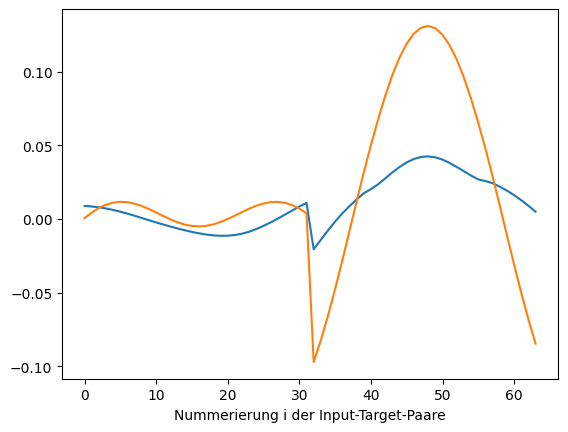

In [6]:
import matplotlib.pyplot as plt

interface_switched = []
with open('training_data/interface_1_0_1_training.csv') as csvdatei1:
    csv_reader_object1 = csv.reader(csvdatei1, delimiter=';')
    csv_to_list(csv_reader_object1, interface_switched)
    
with open('training_data/interface_0_1_1_training.csv') as csvdatei2:
    csv_reader_object2 = csv.reader(csvdatei2, delimiter=';')
    csv_to_list(csv_reader_object2, interface_switched)
    
interface_switched = torch.Tensor(interface_switched)

interface_switched_test = []
with open('training_data/interface_1_0_1_test.csv') as csvdatei3:
    csv_reader_object3 = csv.reader(csvdatei3, delimiter=';')
    csv_to_list(csv_reader_object3, interface_switched_test)
    
with open('training_data/interface_0_1_1_test.csv') as csvdatei4:
    csv_reader_object4 = csv.reader(csvdatei4, delimiter=';')
    csv_to_list(csv_reader_object4, interface_switched_test)

interface_switched_test = torch.Tensor(interface_switched_test)

g01_1_training = []
with open('training_data/interface_0_1_1_training.csv') as csvdatei5:
    csv_reader_object5 = csv.reader(csvdatei5, delimiter=';')
    csv_to_list(csv_reader_object5, g01_1_training)
    
g01_1_training = torch.Tensor(g01_1_training)

g01_1_test = []
with open('training_data/interface_0_1_1_test.csv') as csvdatei6:
    csv_reader_object6 = csv.reader(csvdatei6, delimiter=';')
    csv_to_list(csv_reader_object6, g01_1_test)
    
g01_1_test = torch.Tensor(g01_1_test)


n1 = 0
n2 = target_training.size()[0]
n3 = target_test.size()[0]

x1 = [i for i in range(n2)]
y11 = [target_training.tolist()[i][n1] for i in range(n2)]
y12 = [(net(inp_training) - target_training).tolist()[i][n1] for i in range(n2)]
#y13 = [(interface_switched - target).tolist()[i][n1] for i in range(n2)]
y13 = [(interface_training - target_training).tolist()[i][n1] for i in range(n2)]
y14 = [(g01_1_training - target_training).tolist()[i][n1] for i in range(n2)]

x2 = [i for i in range(n3)]
y21 = [target_test.tolist()[i][n1] for i in range(n3)]
y22 = [(net(inp_test) - target_test).tolist()[i][n1] for i in range(n3)]
#y23 = [(interface_switched_test - target_test).tolist()[i][n1] for i in range(n3)]
y23 = [(interface_test - target_test).tolist()[i][n1] for i in range(n3)]
y24 = [(g01_1_test - target_test).tolist()[i][n1] for i in range(n3)]
#print(x)


#plt.plot(x1, y12)
#plt.plot(x1, y14)
#plt.plot(x1, y11)

plt.plot(x2, y22)
plt.plot(x2, y24)
#plt.plot(x2, y21)

plt.xlabel("Nummerierung i der Input-Target-Paare")

In [8]:
interface = []
solution = []

with open('KirasFM-NN/interface_1_0_1.csv') as csvdatei1:
    csv_reader_object1 = csv.reader(csvdatei1, delimiter=';')
    csv_to_list(csv_reader_object1, interface)        
        
with open('KirasFM-NN/solution_1_1.csv') as csvdatei2:
    csv_reader_object2 = csv.reader(csvdatei2, delimiter=';')
    csv_to_list(csv_reader_object2, solution)
    
interface = torch.Tensor(interface)
solution = torch.Tensor(solution)
inp = torch.cat((interface, solution), 1)
print(inp.size())

out_list = net(inp).tolist()

with open('KirasFM-NN/interface_0_1_nn.csv', 'w') as interface_0_1_nn:
    writer = csv.writer(interface_0_1_nn, delimiter=';', escapechar=' ', quoting=csv.QUOTE_NONE)
    
    for i in range(len(out_list)):
        row = []
        for j in range(4):
            row += [(out_list[i][2*j],out_list[i][2*j+1]),'(0,0)']
        row += ' '
        writer.writerow(row)

torch.Size([16, 16])
